Tests OpenCv, VTK, ITK et Slicer 3d

In [14]:
# Imports de bibliothèques

import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import cv2
import dicom
import dicom_numpy
import os
import radiomics
from skimage import io
import SimpleITK as sitk
import collections

In [17]:
# Création du path data
path = "C:/Users/mathi_000/jupyter/Projet/data/"

Création d'un dossier de fichiers dicom

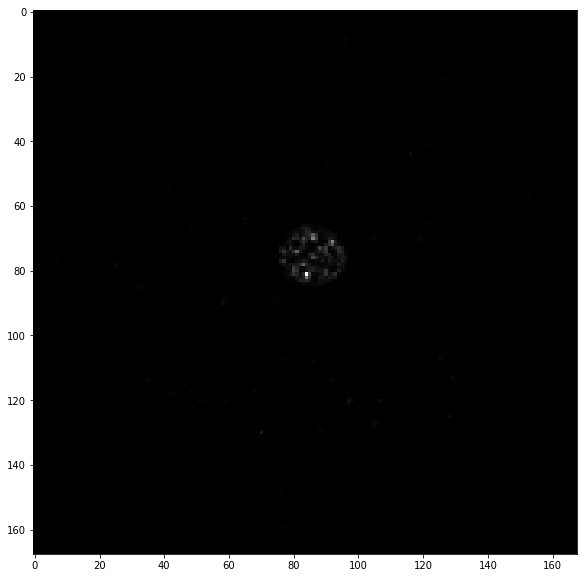

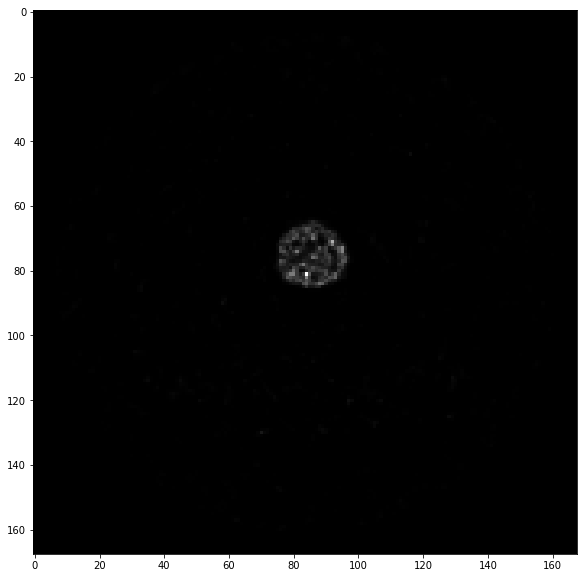

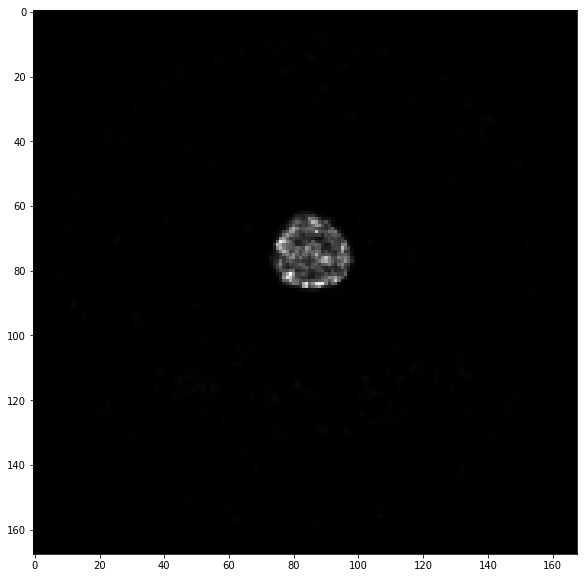

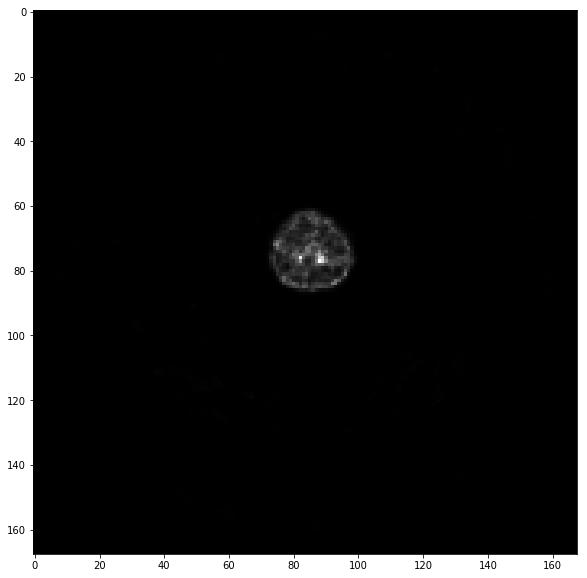

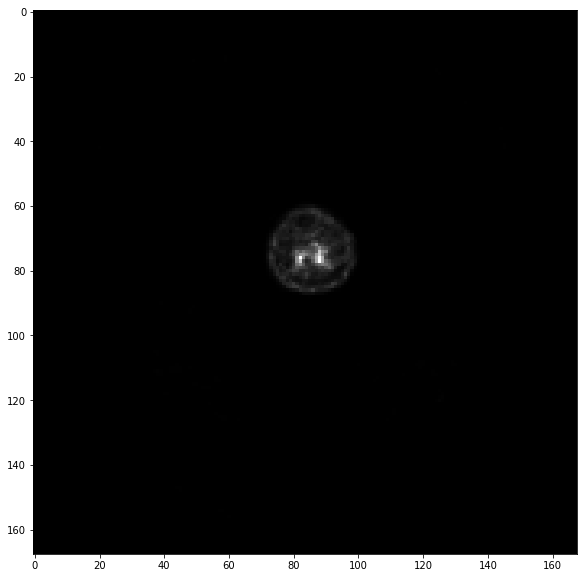

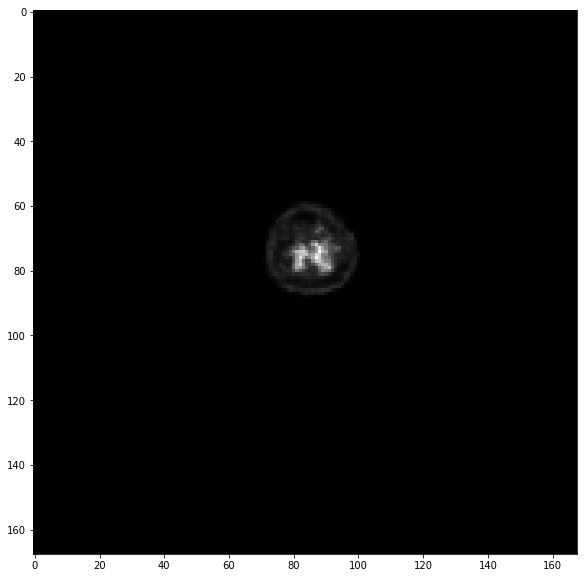

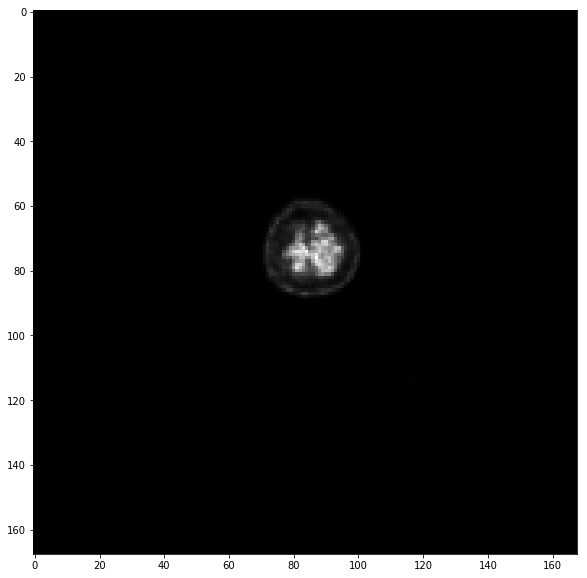

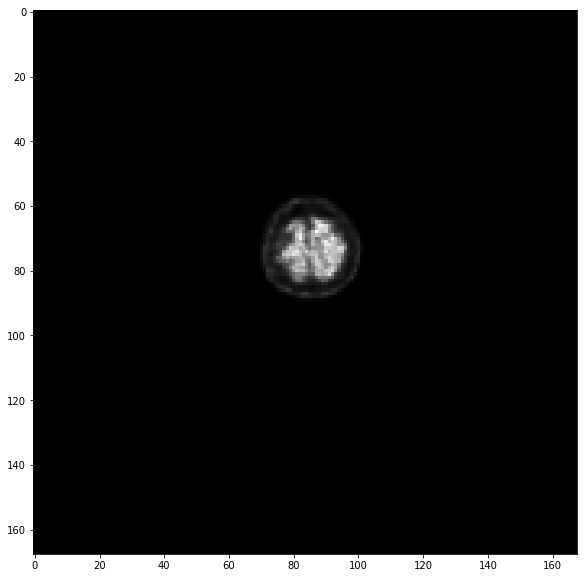

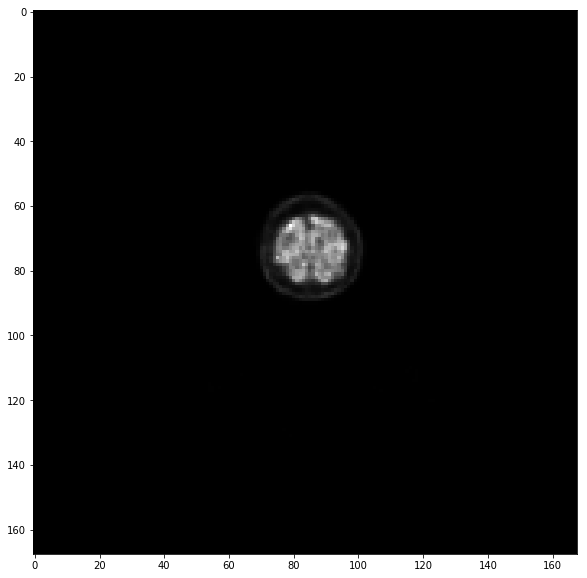

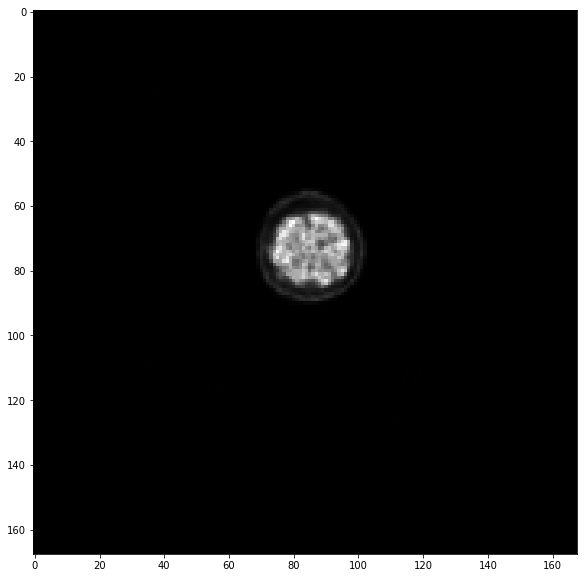

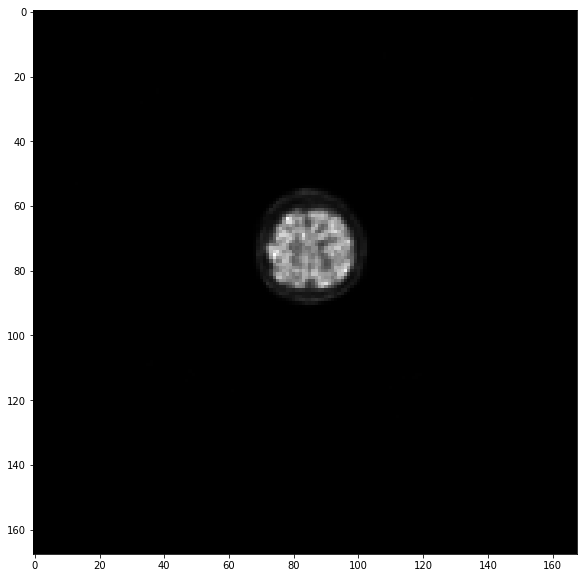

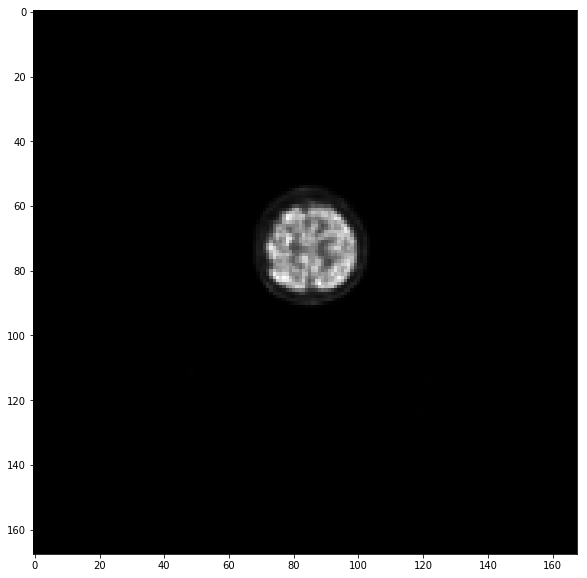

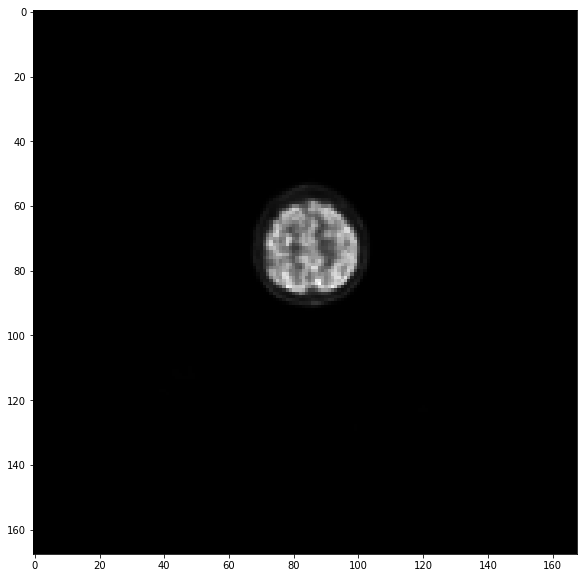

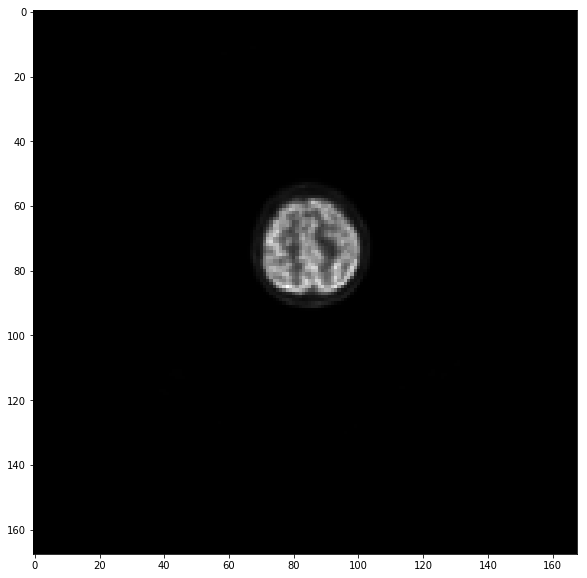

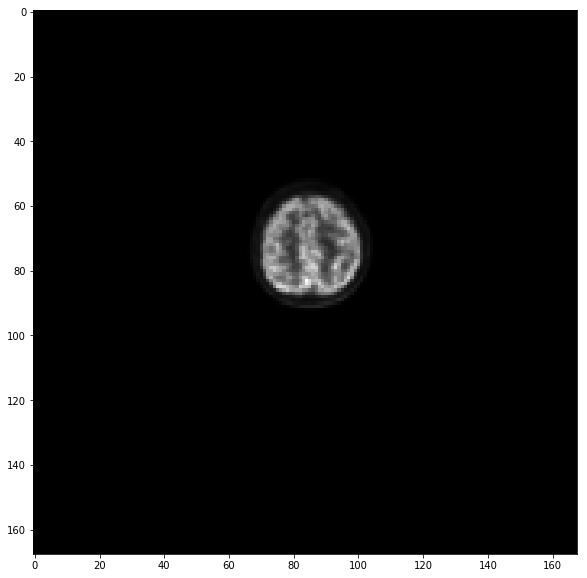

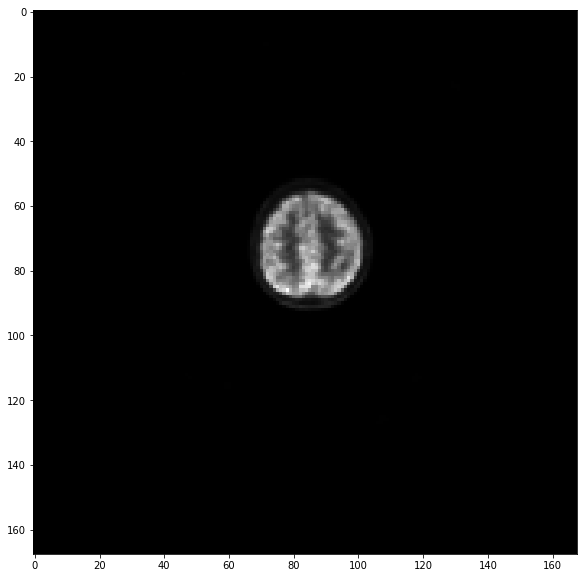

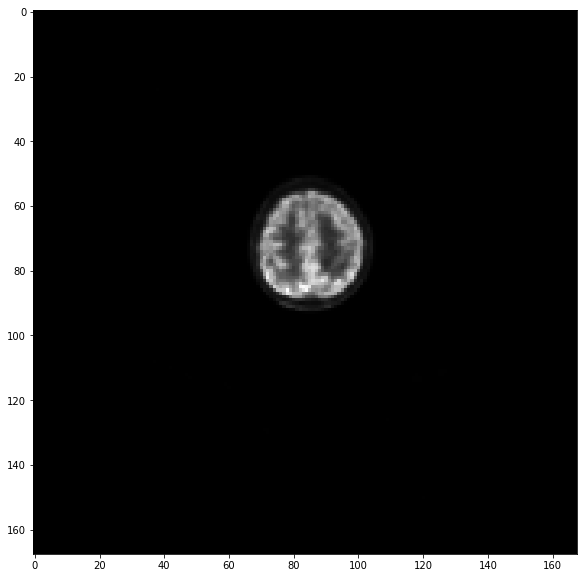

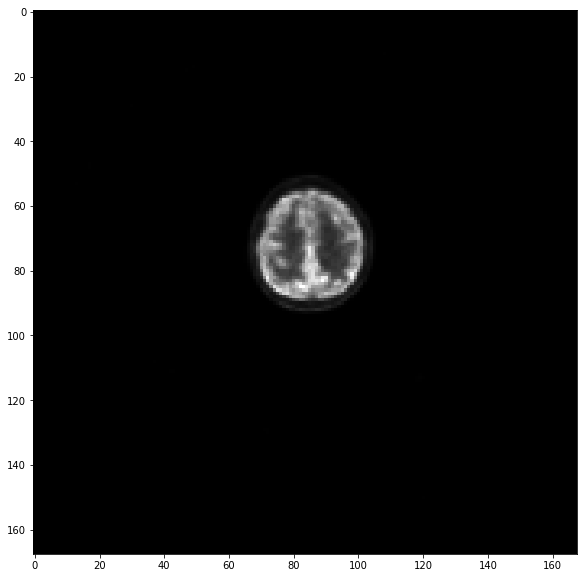

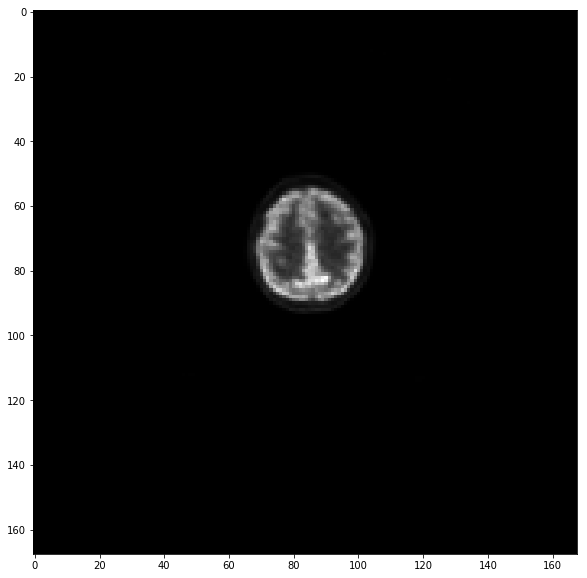

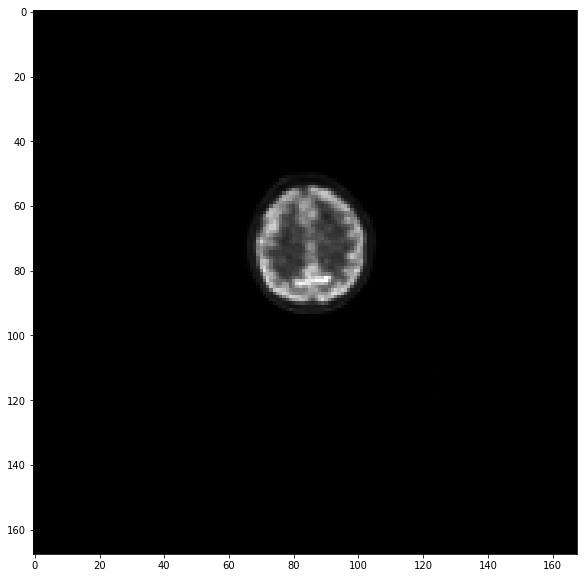

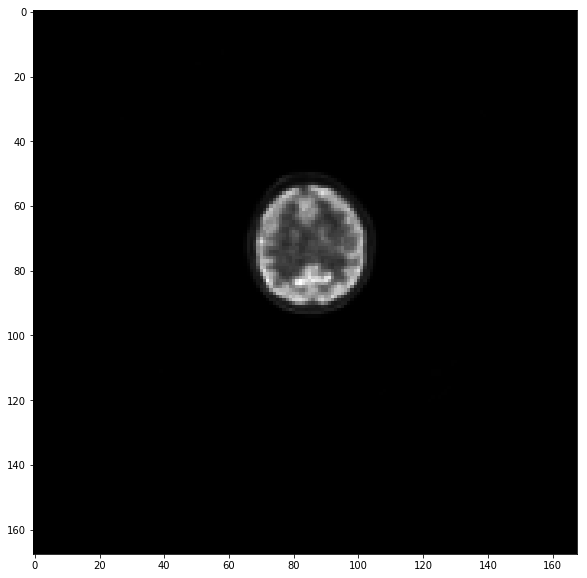

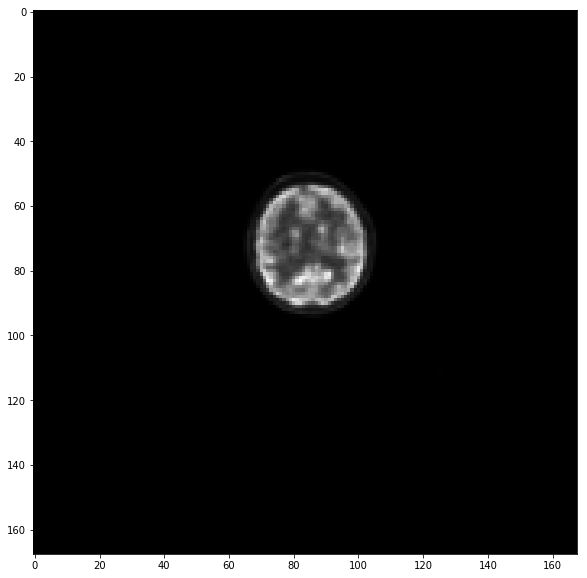

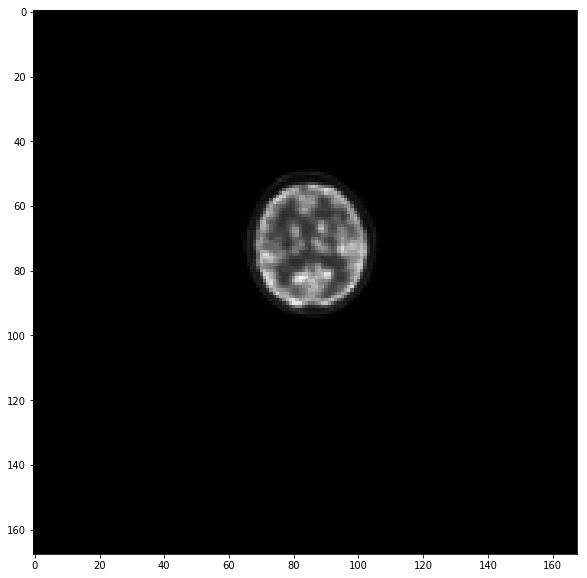

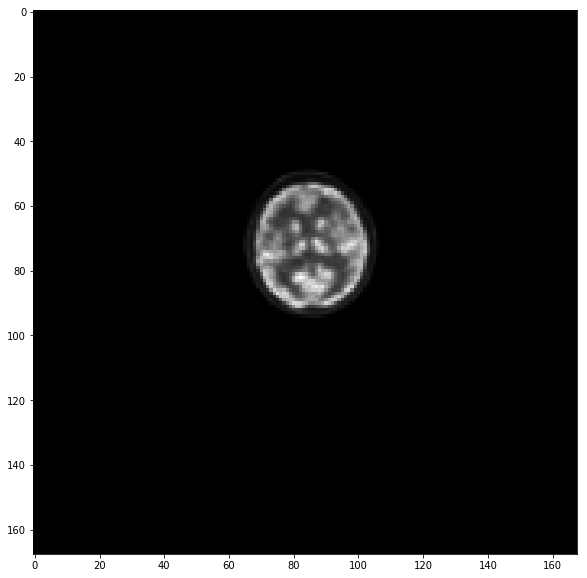

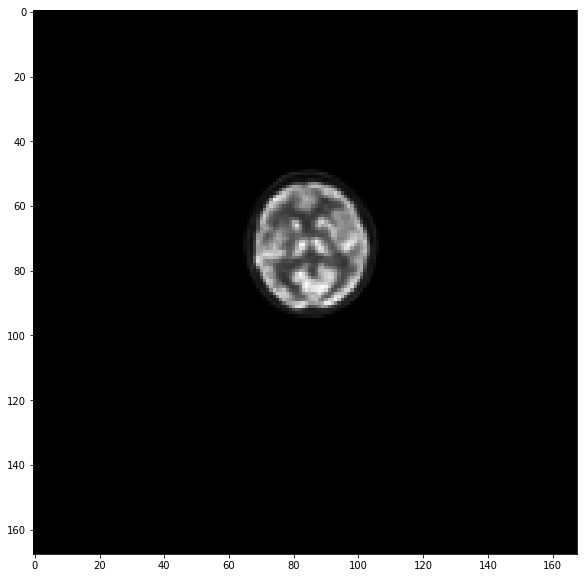

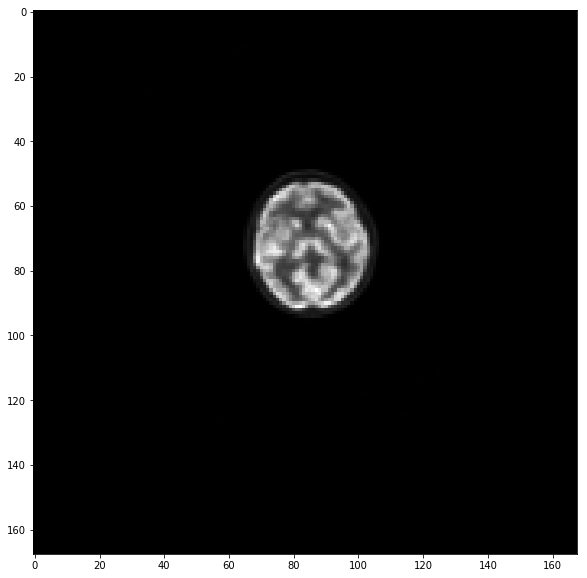

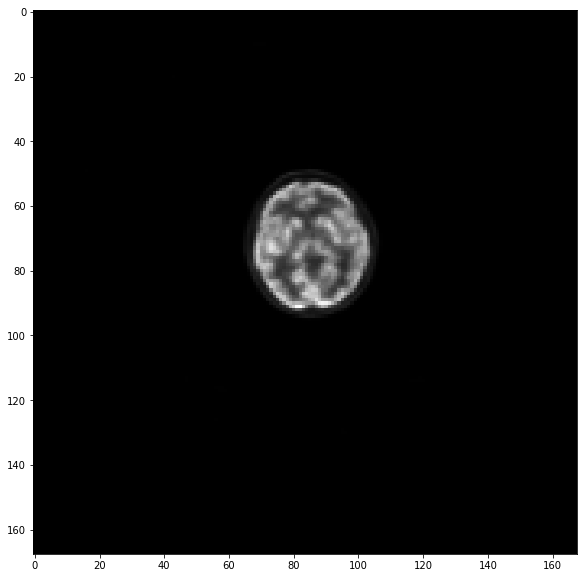

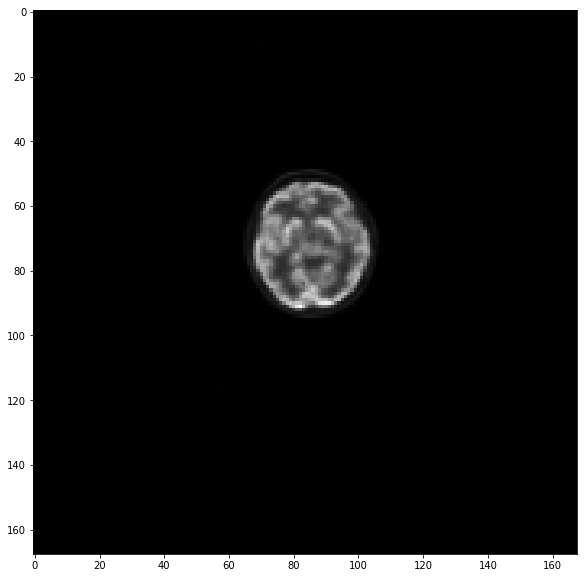

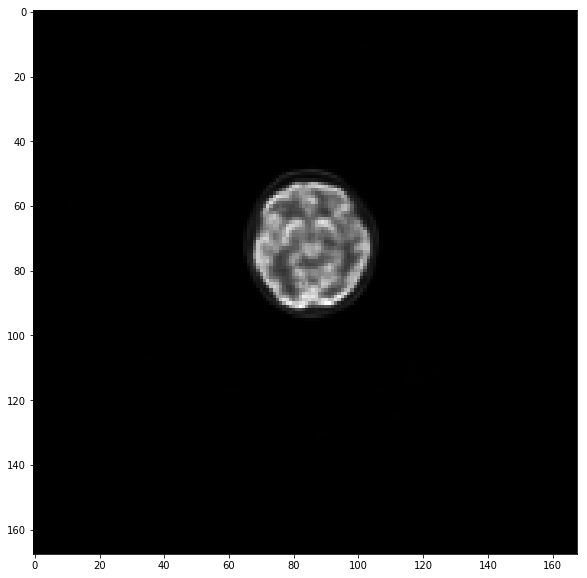

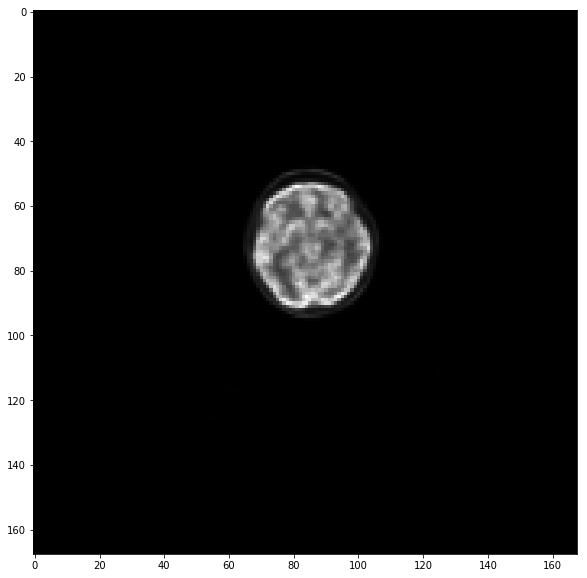

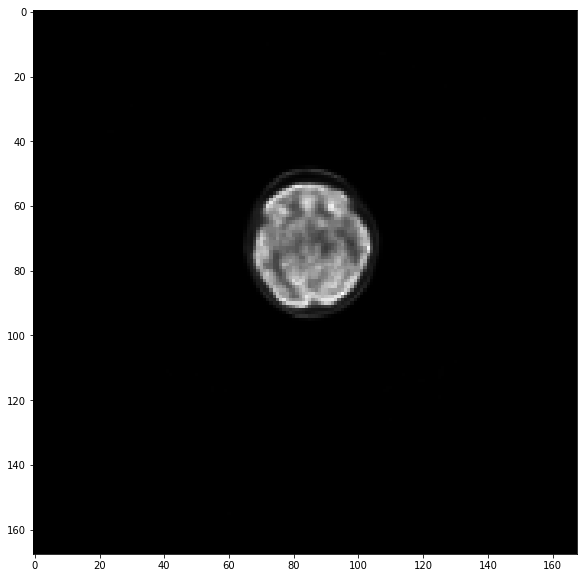

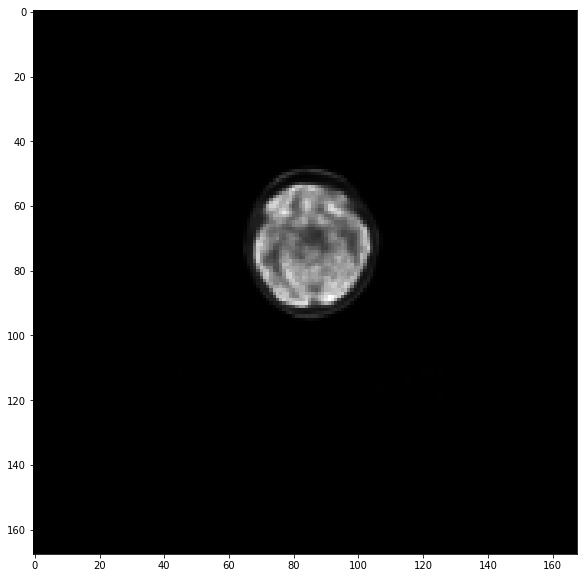

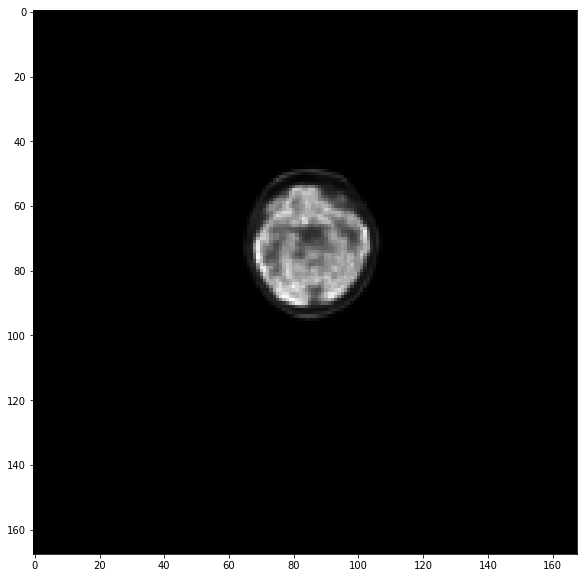

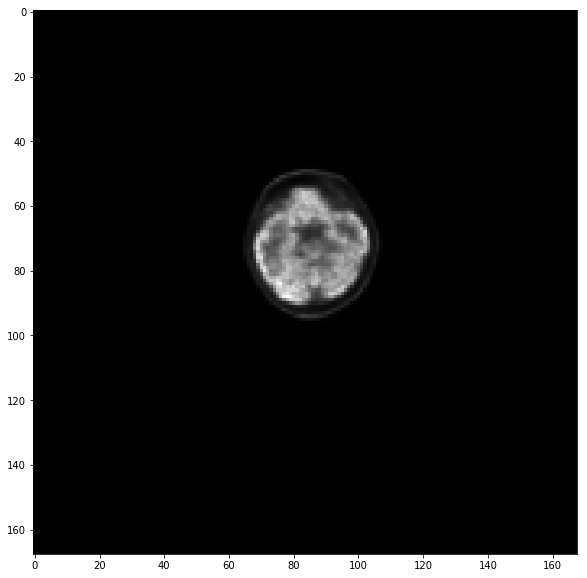

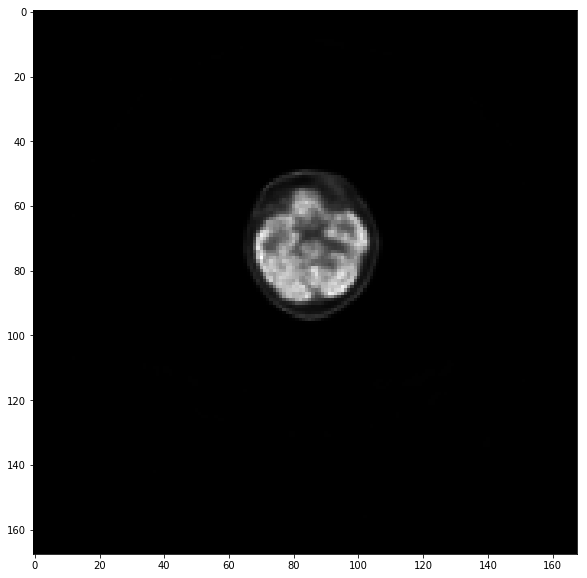

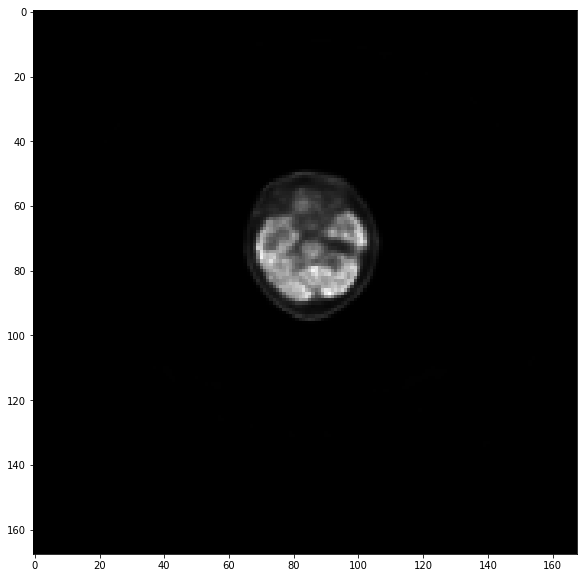

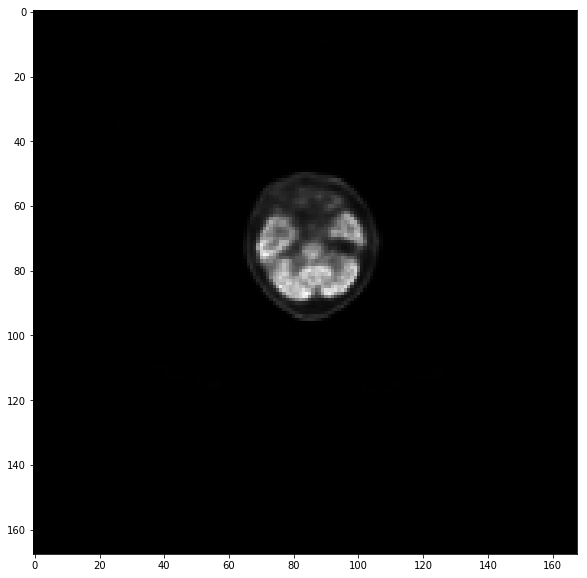

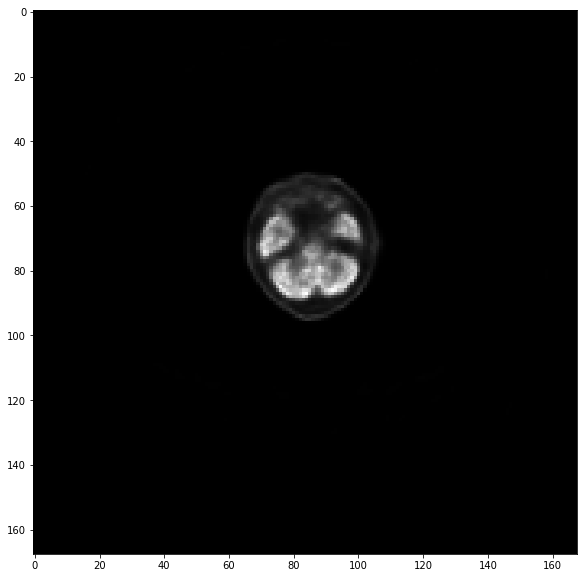

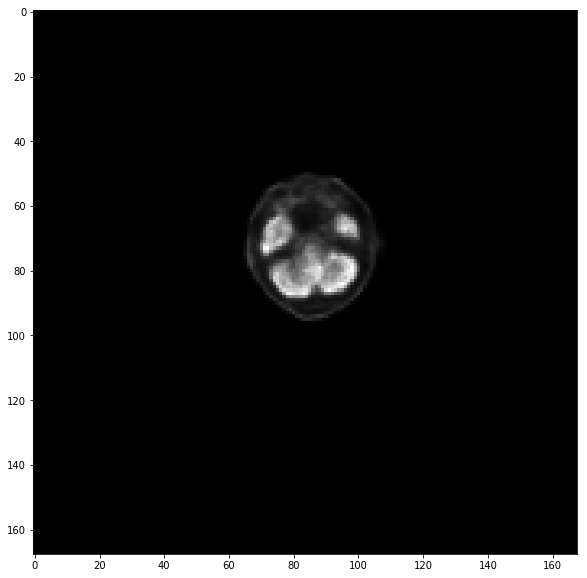

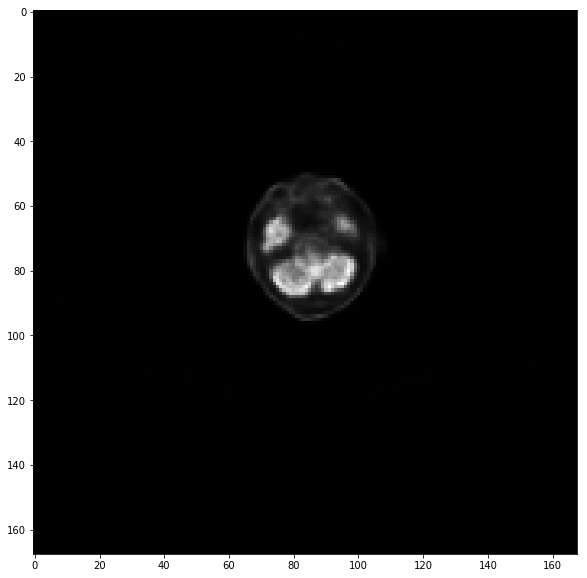

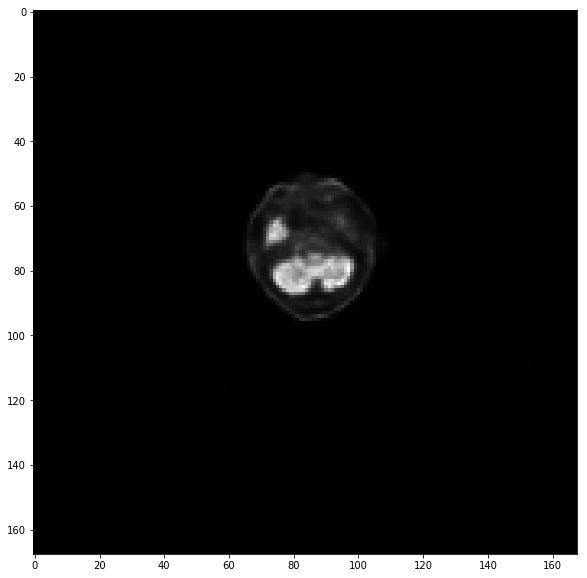

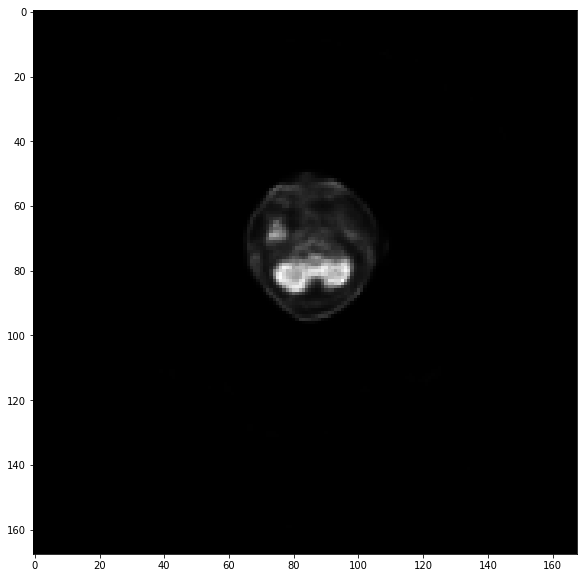

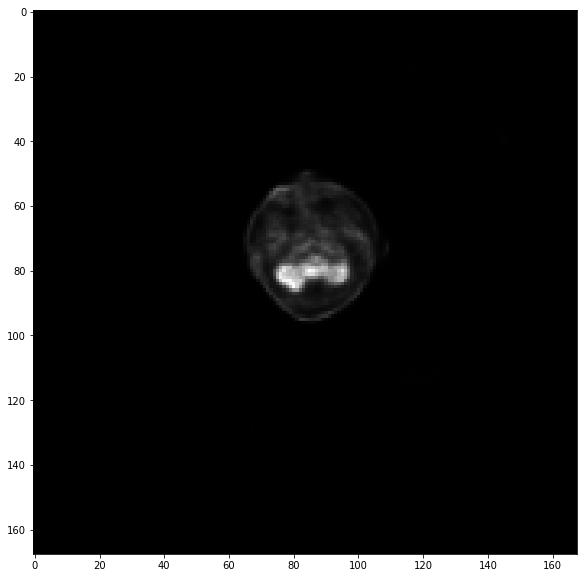

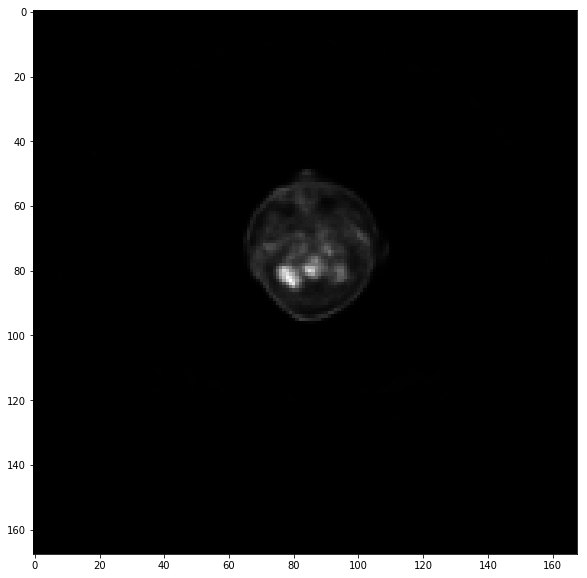

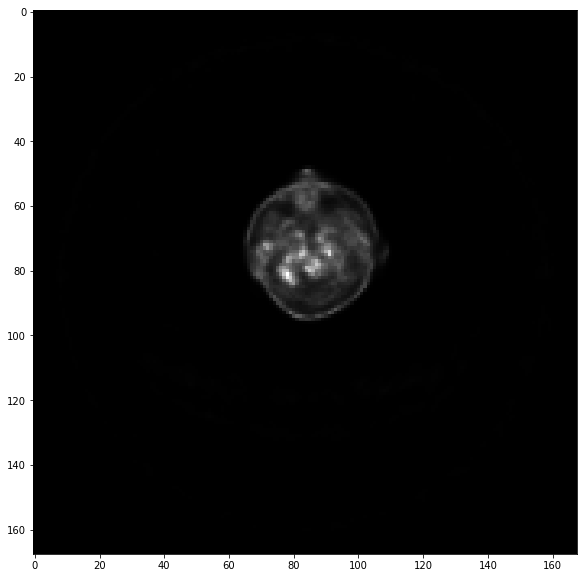

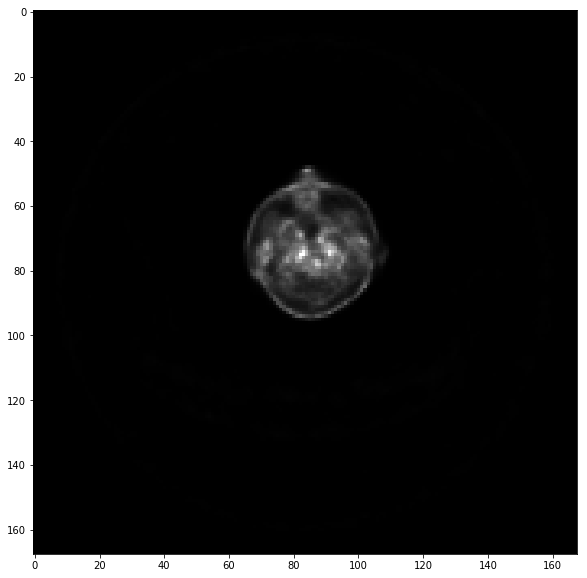

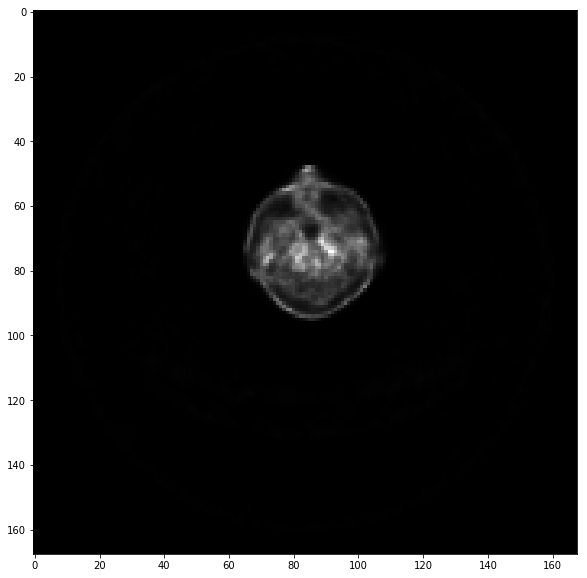

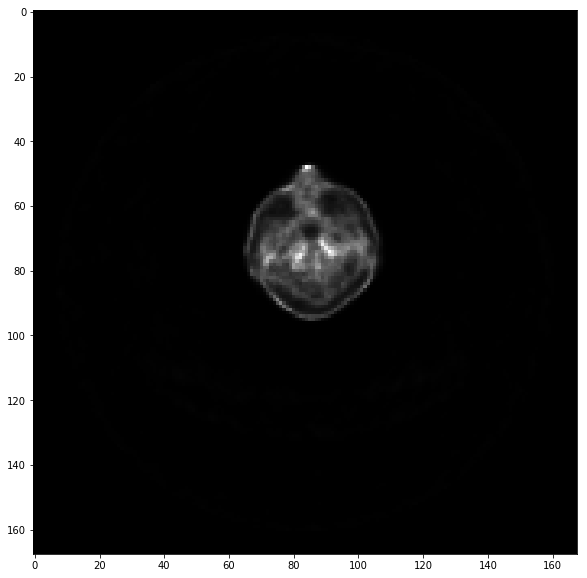

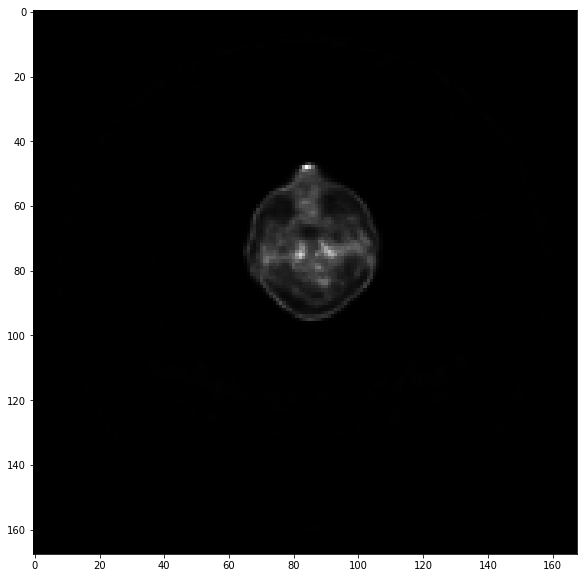

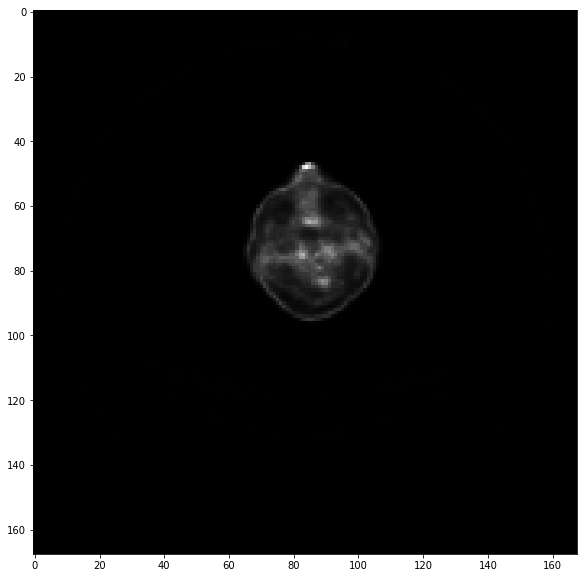

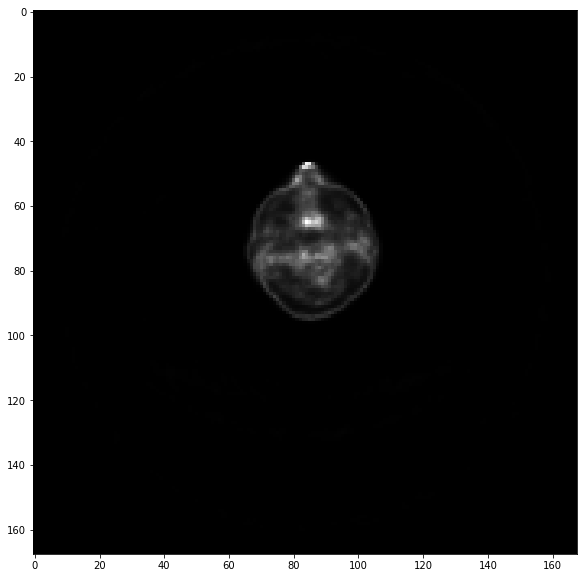

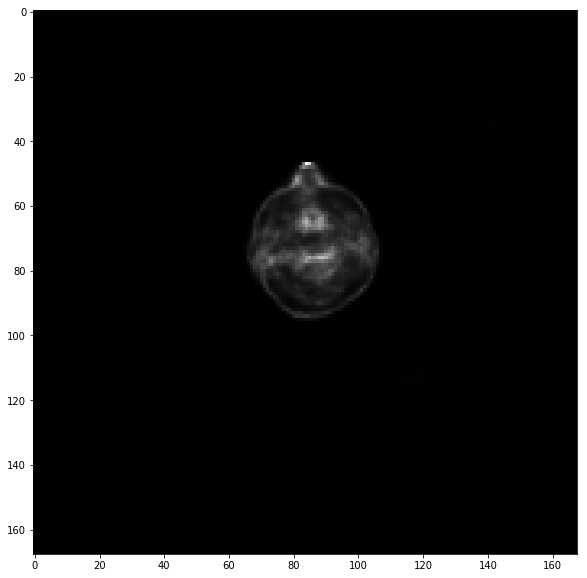

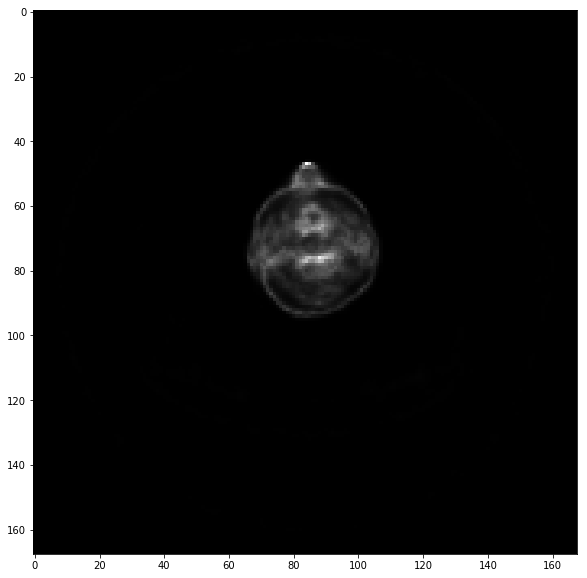

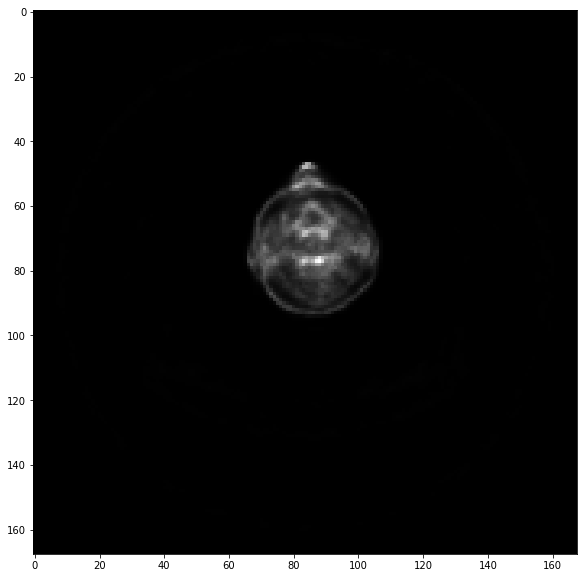

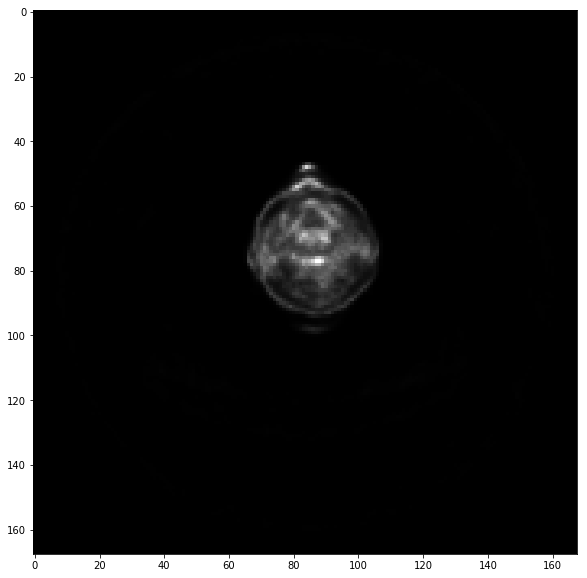

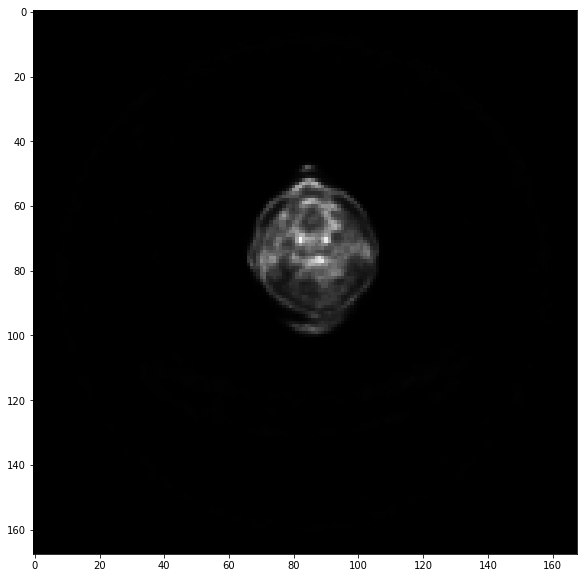

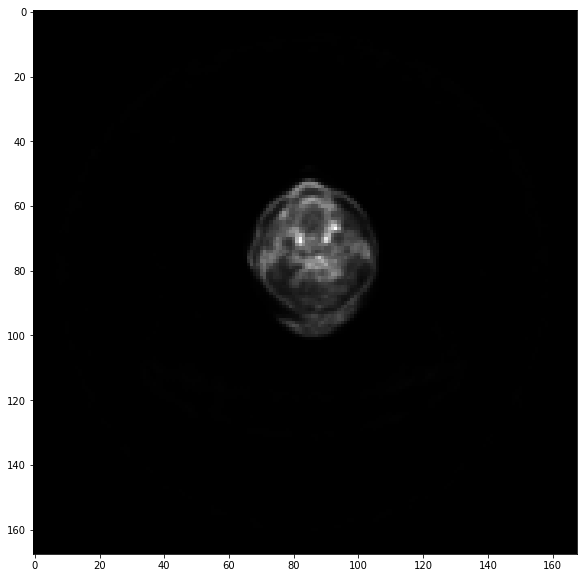

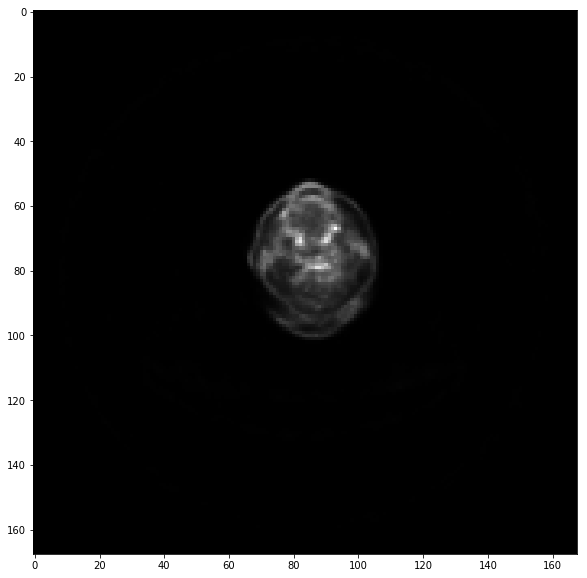

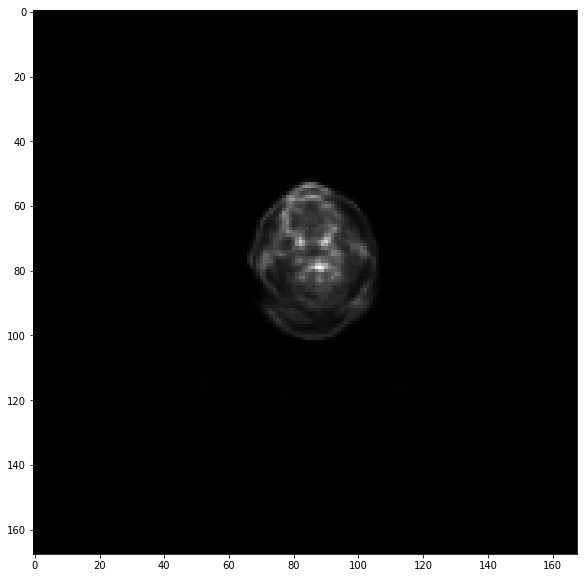

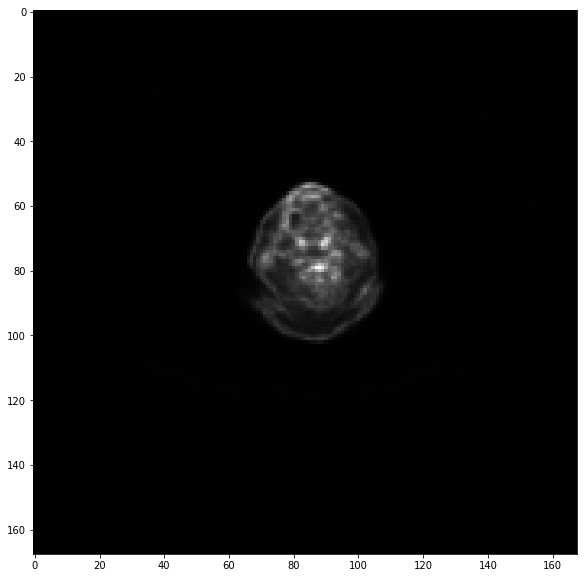

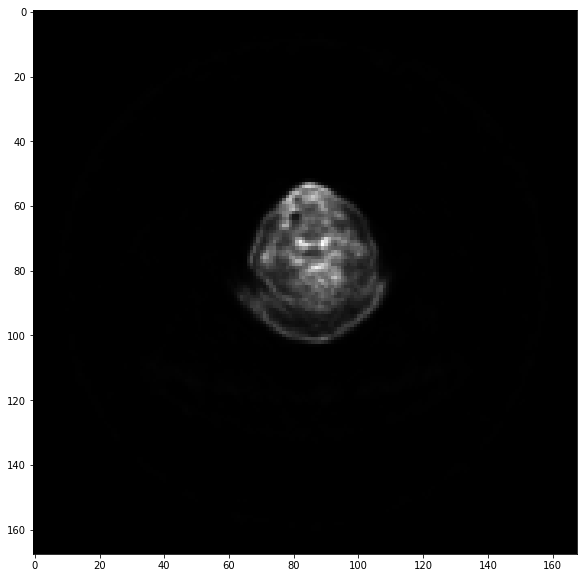

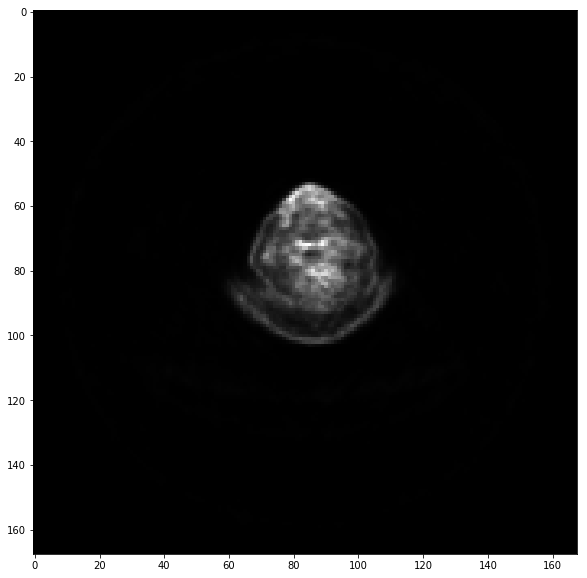

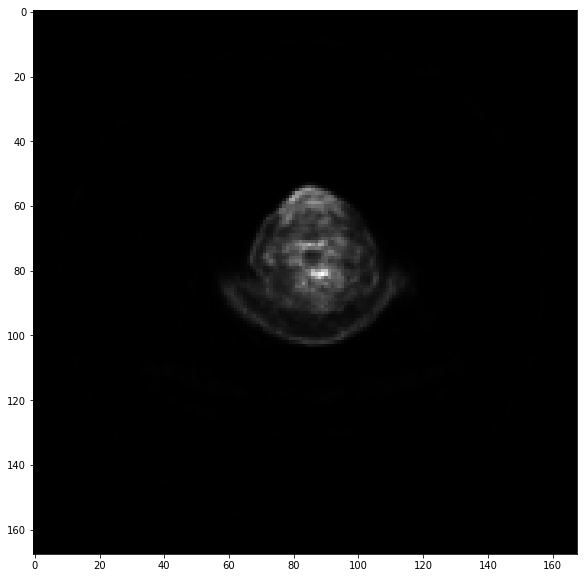

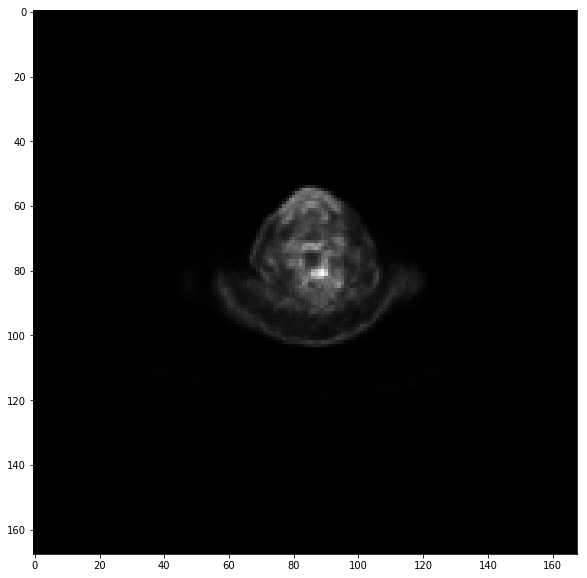

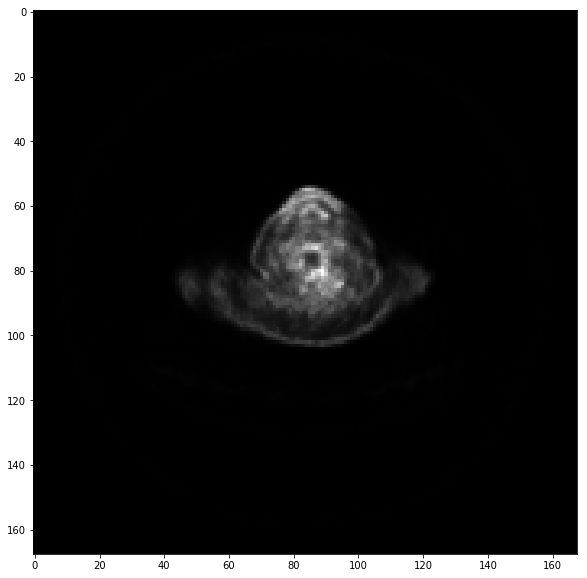

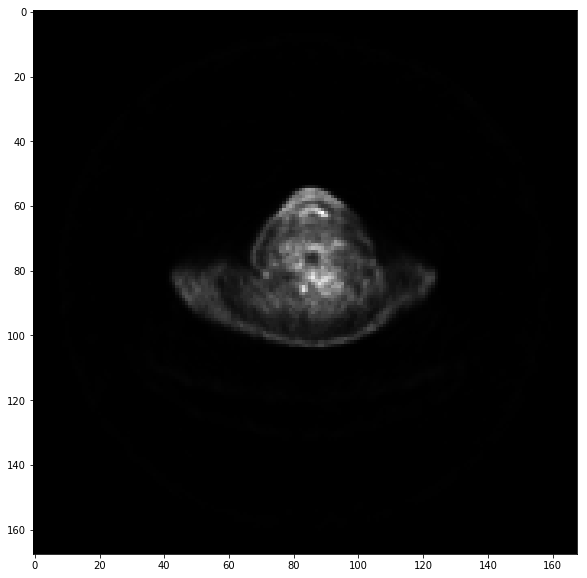

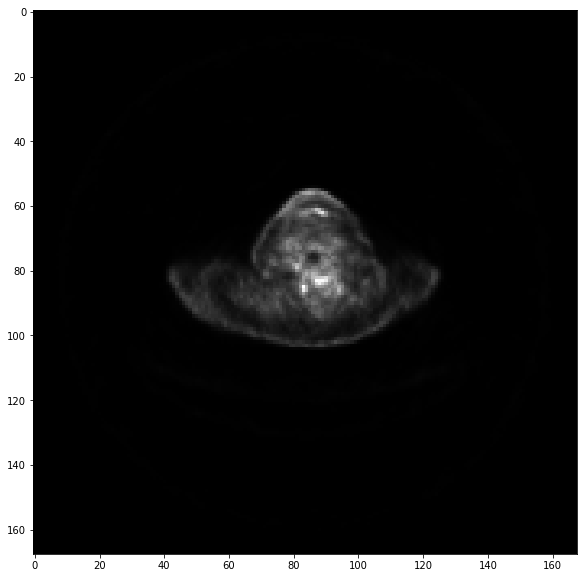

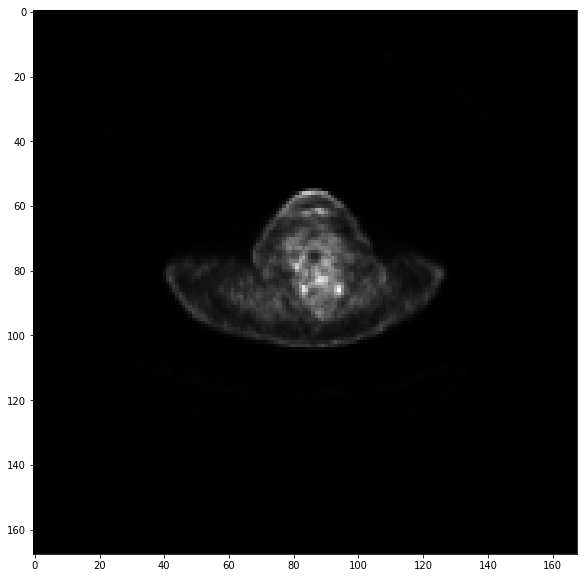

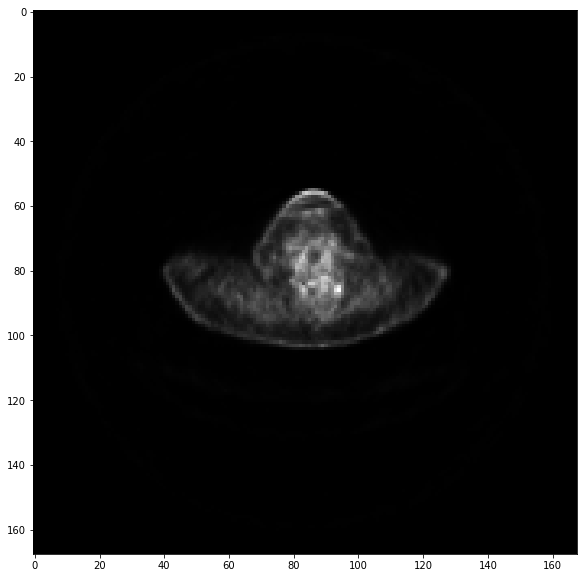

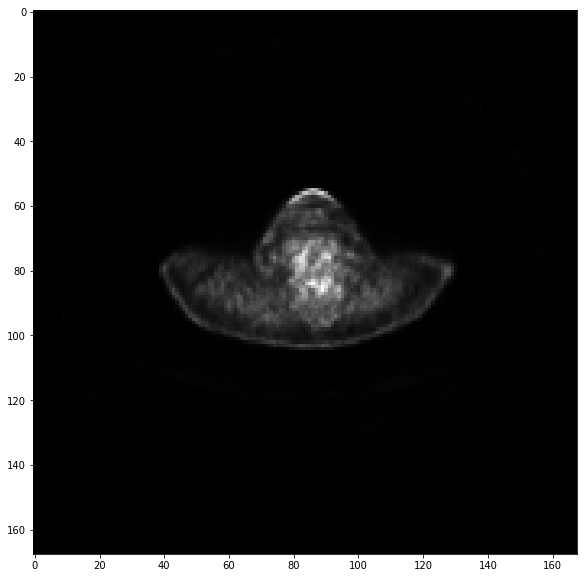

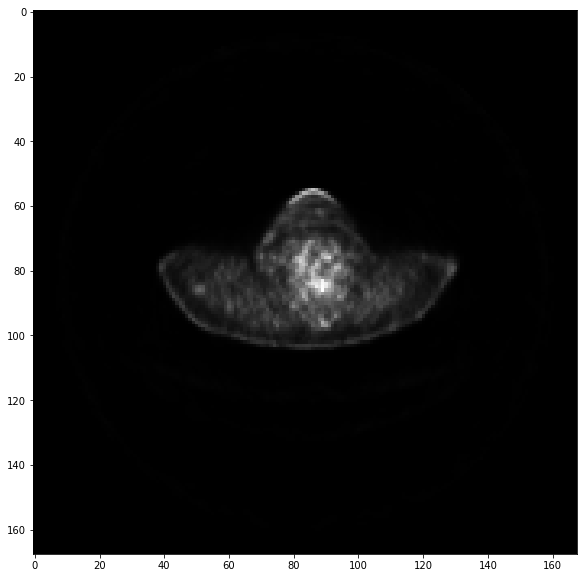

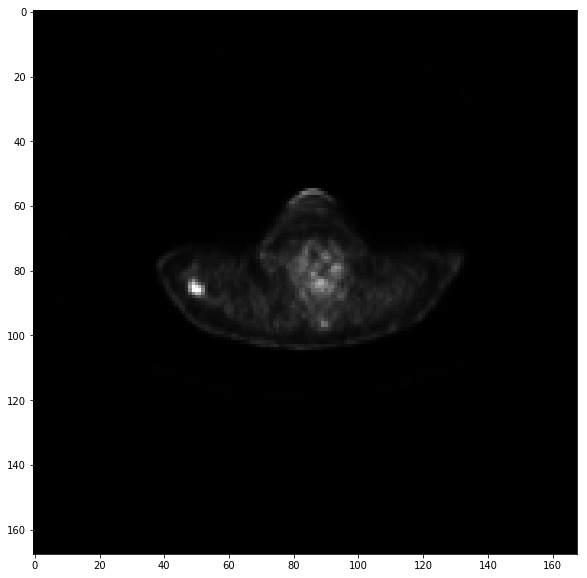

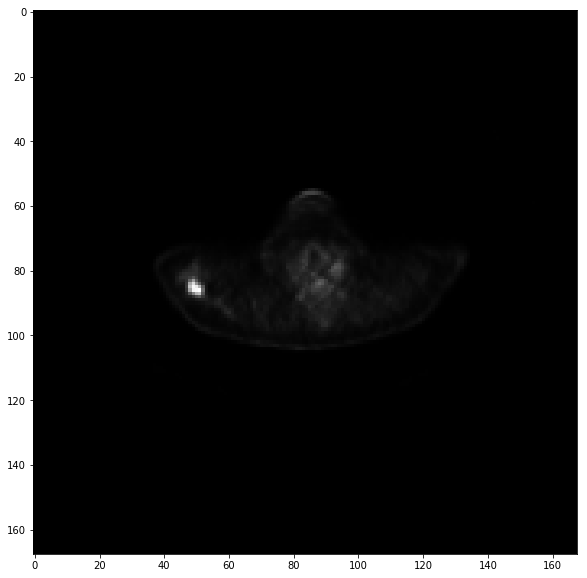

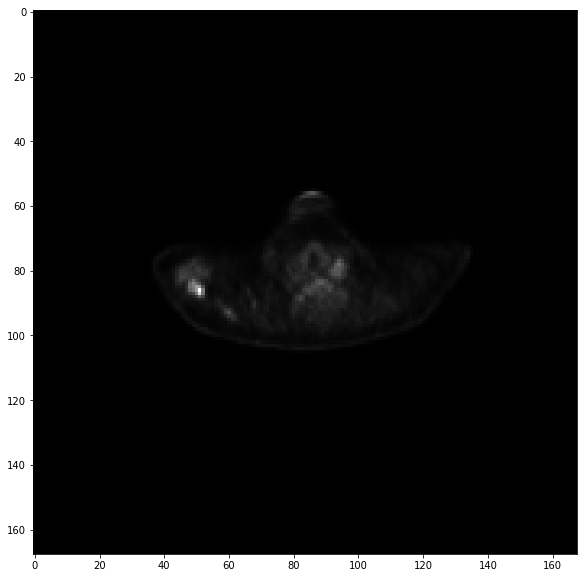

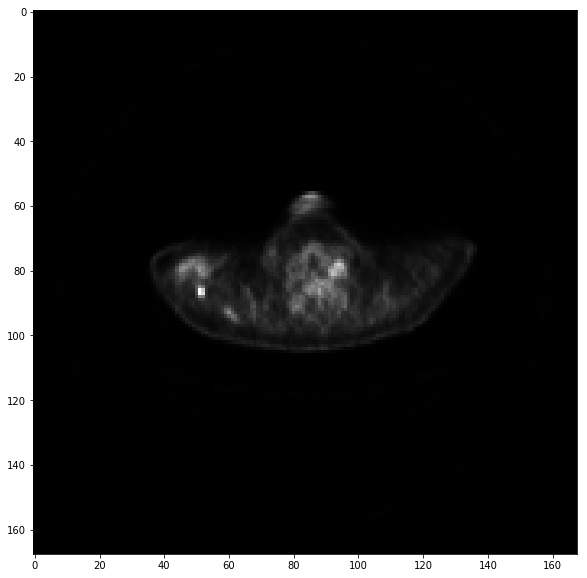

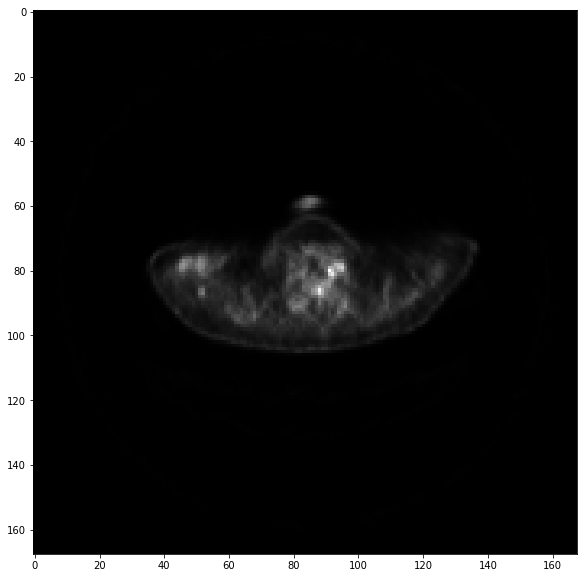

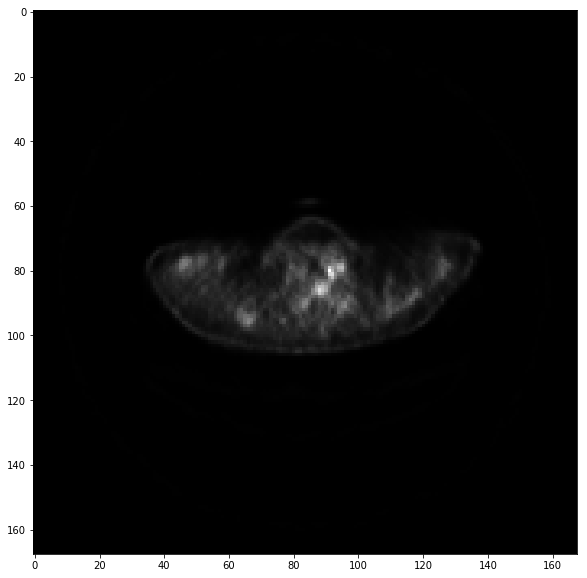

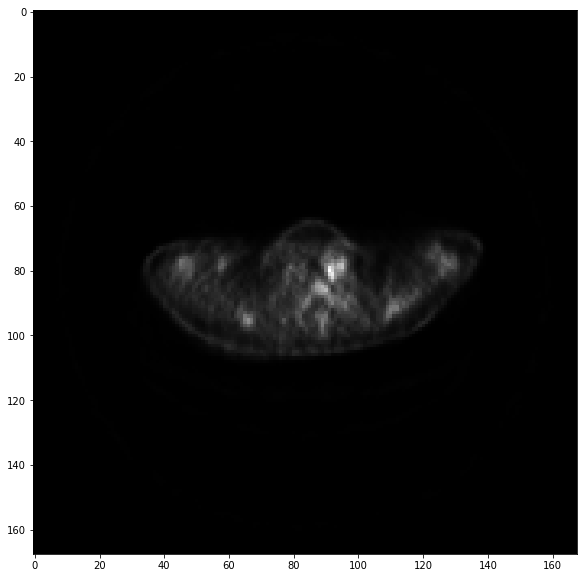

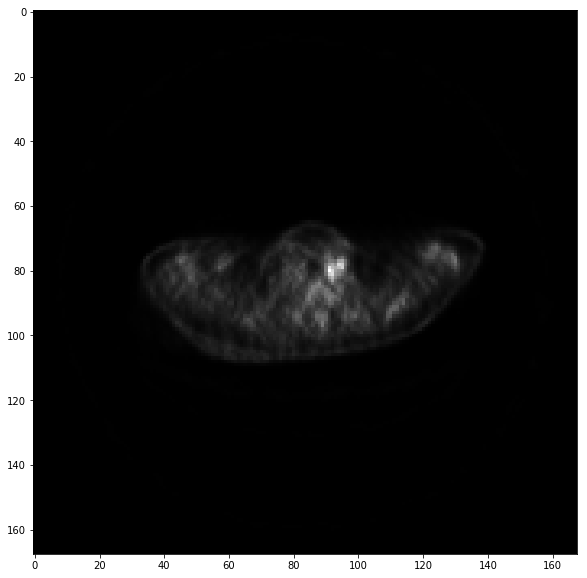

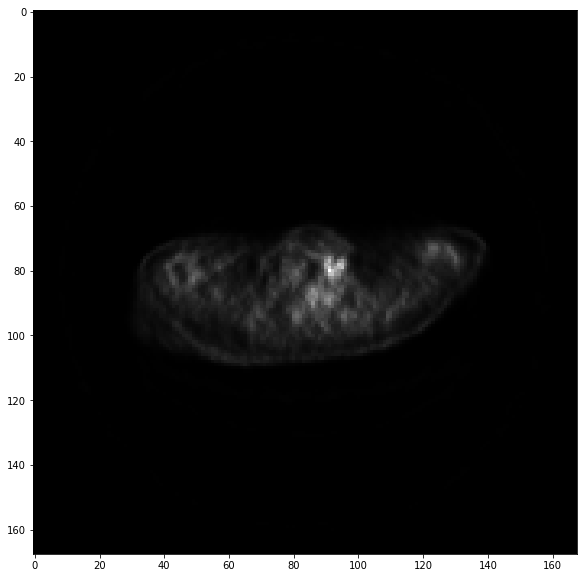

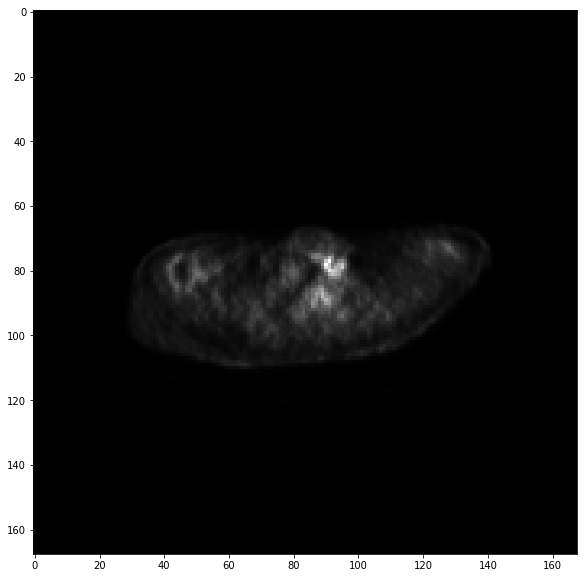

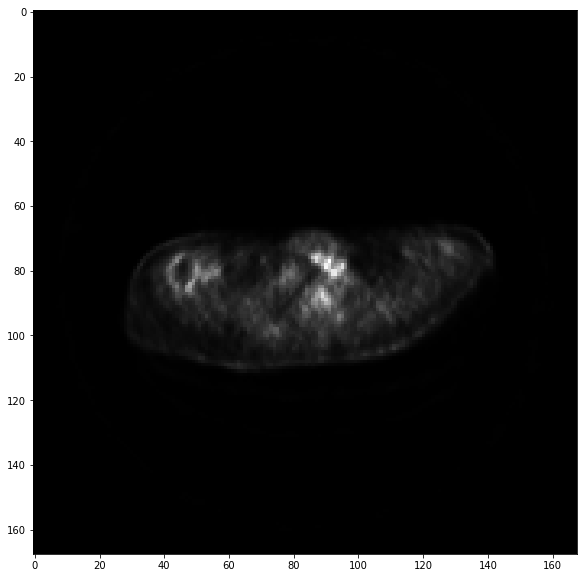

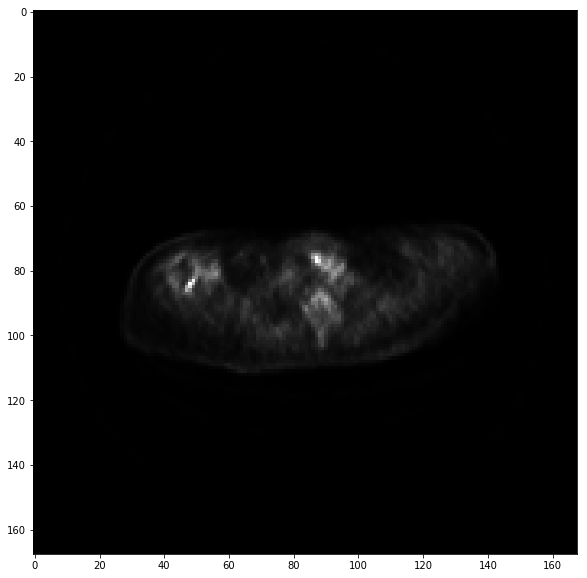

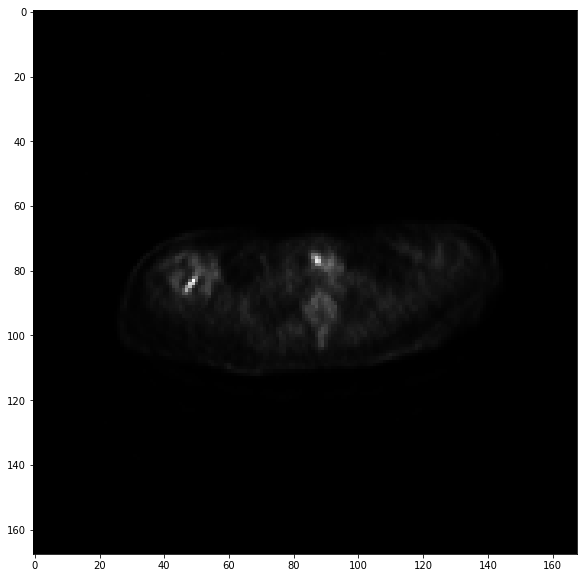

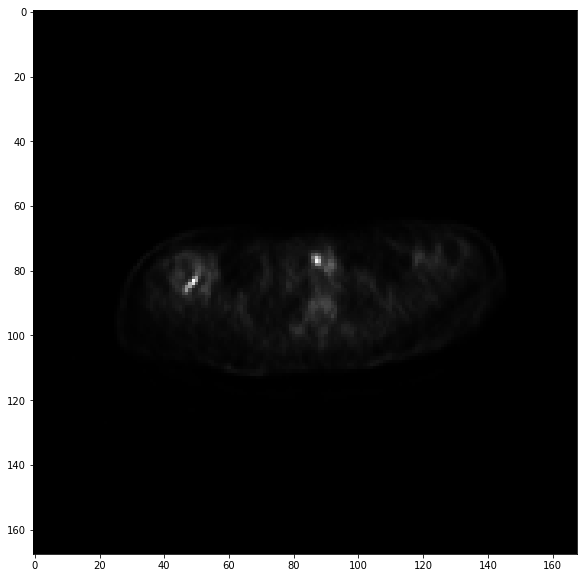

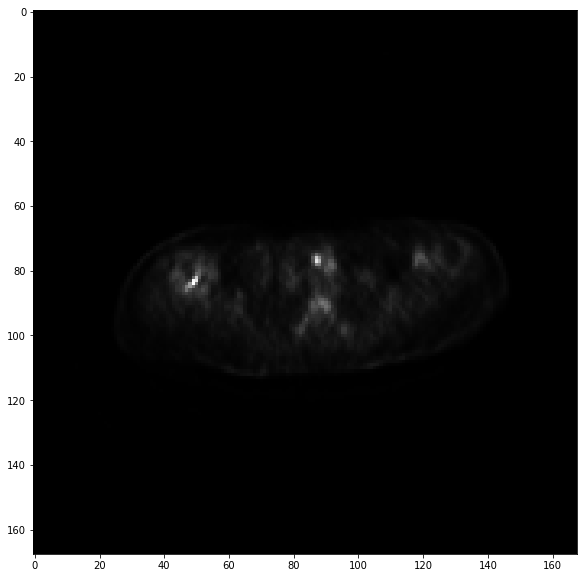

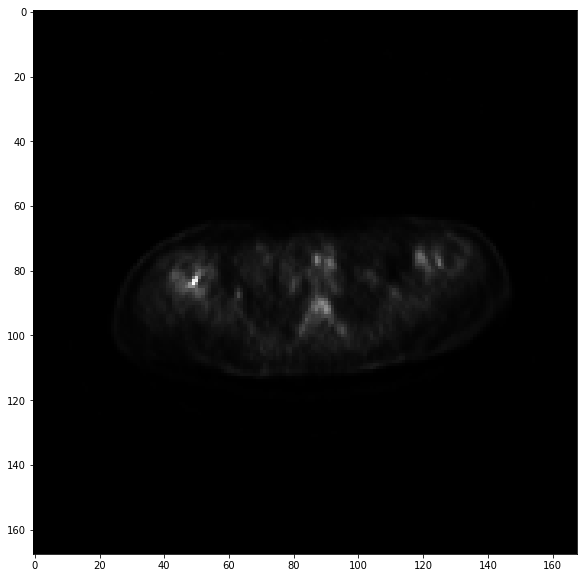

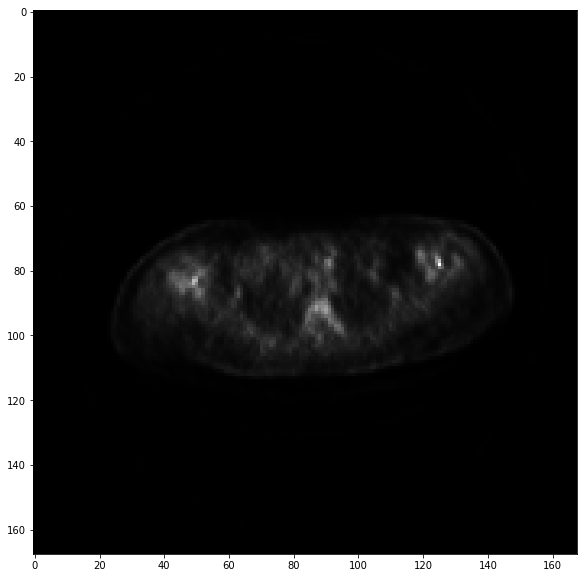

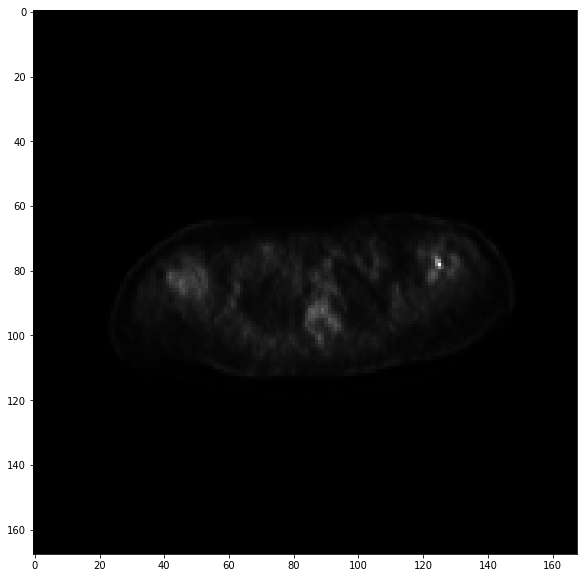

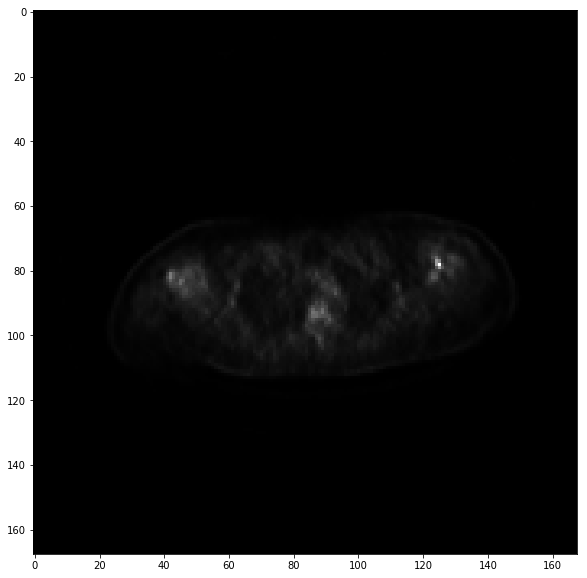

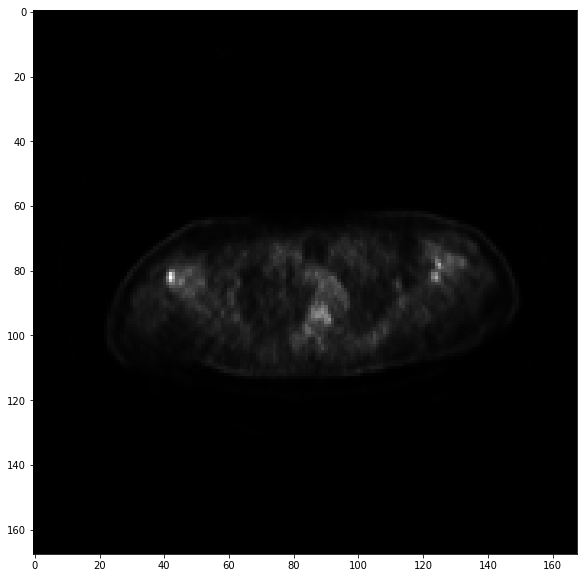

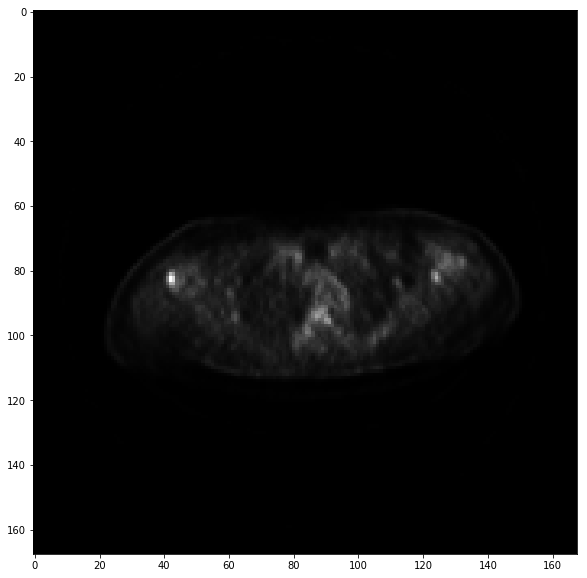

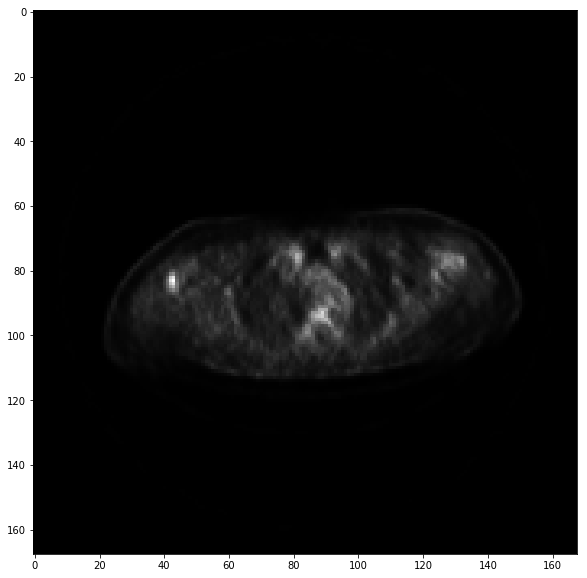

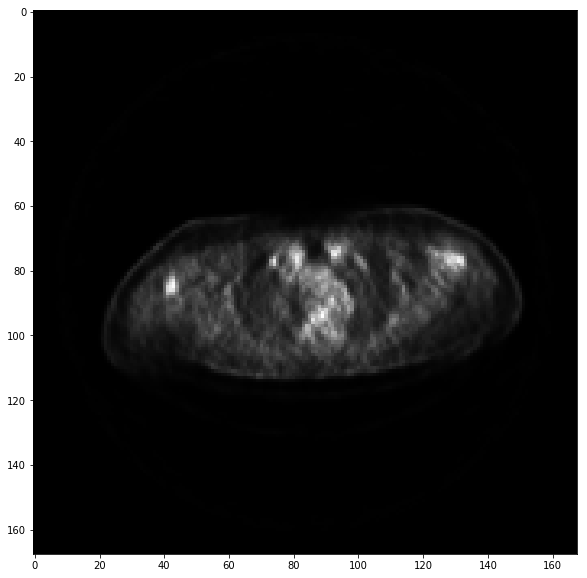

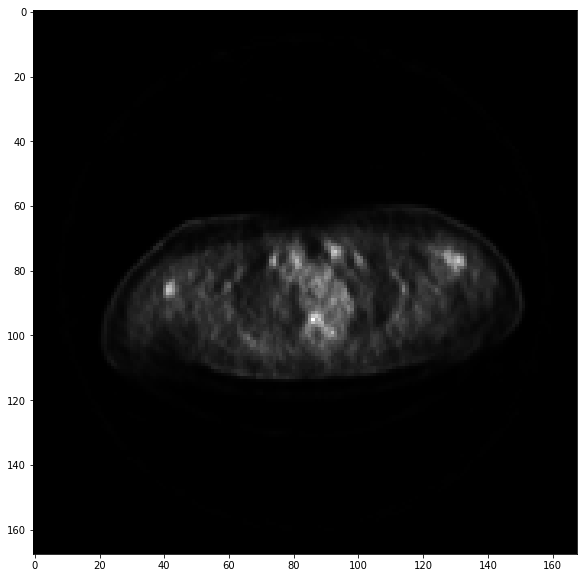

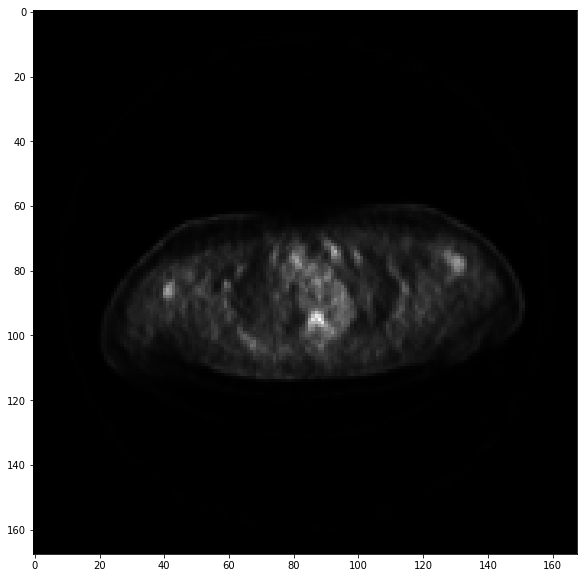

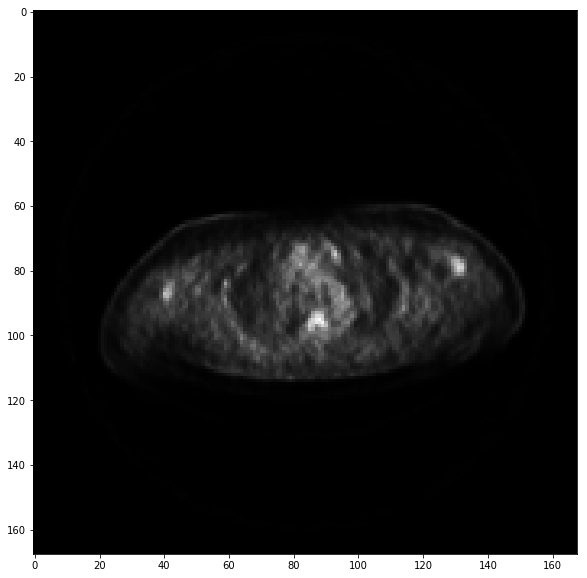

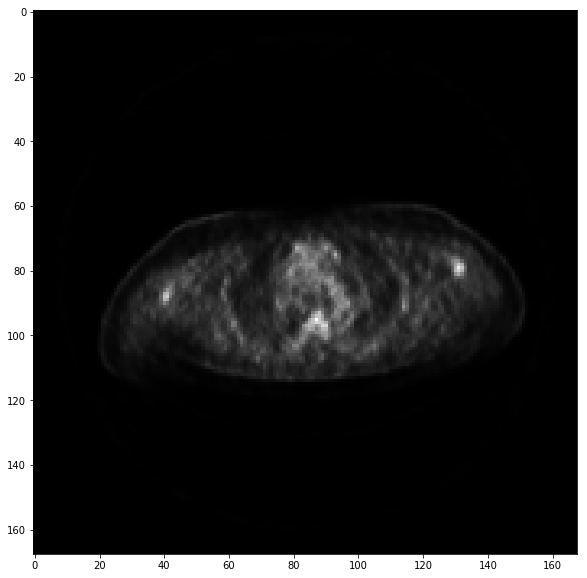

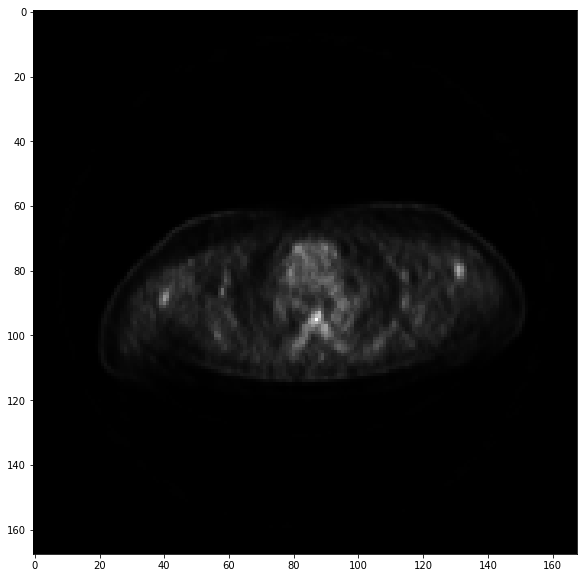

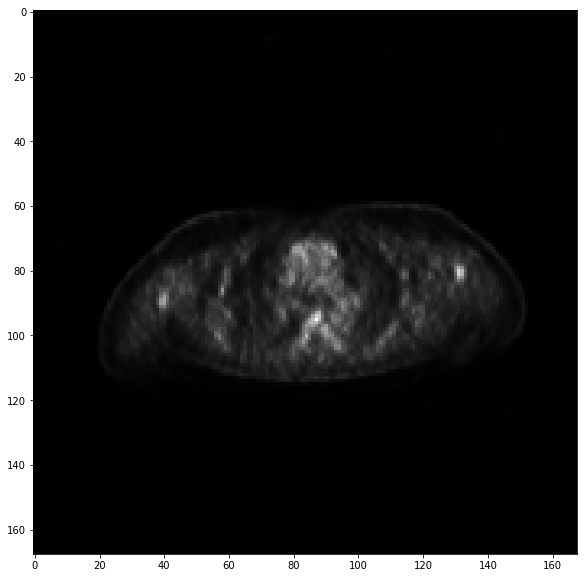

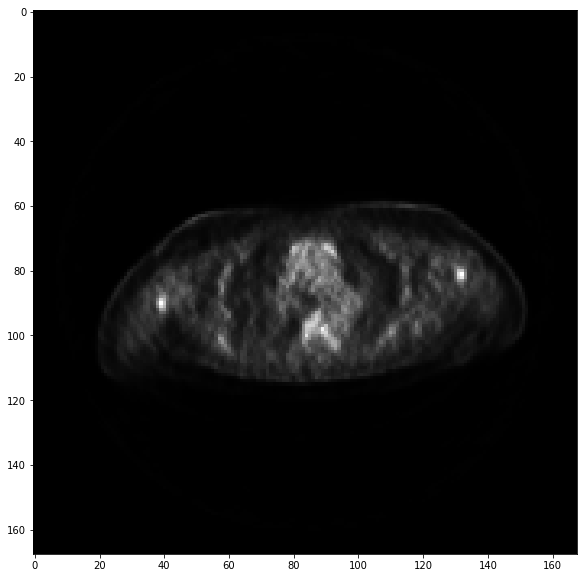

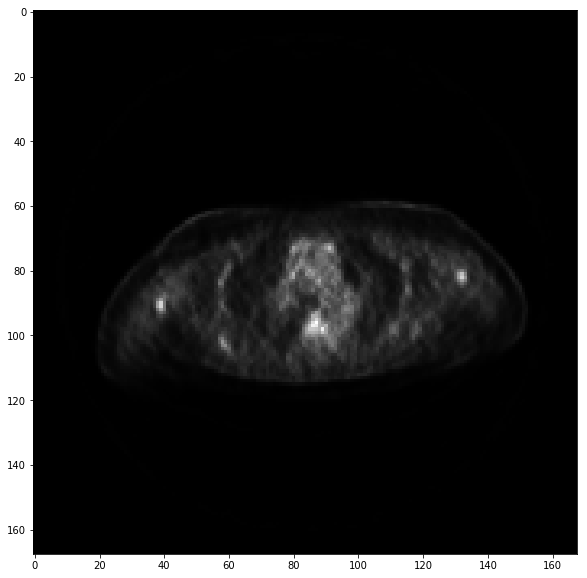

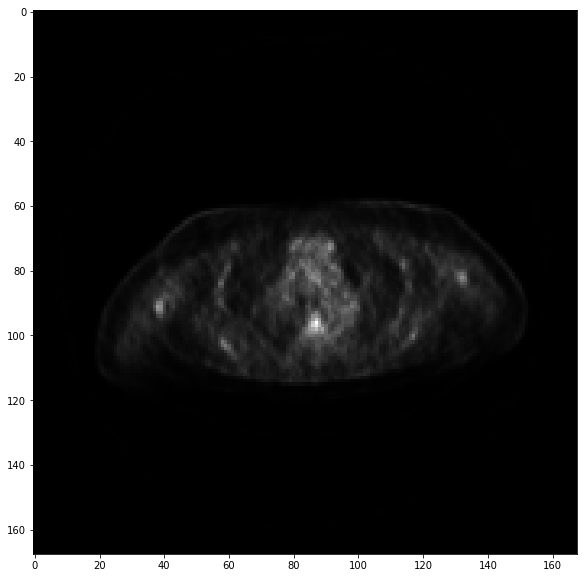

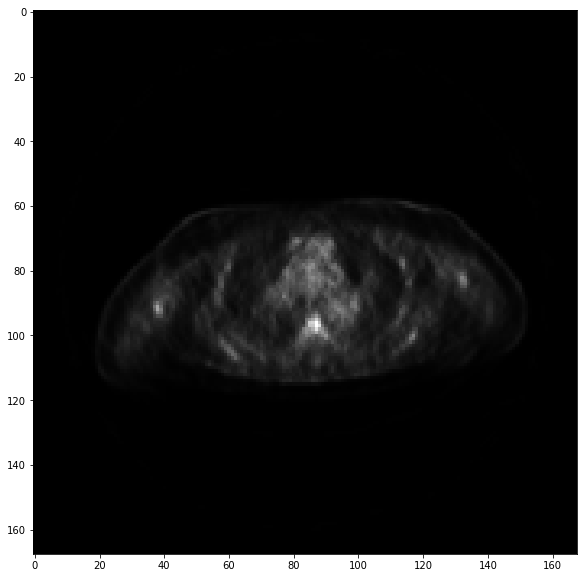

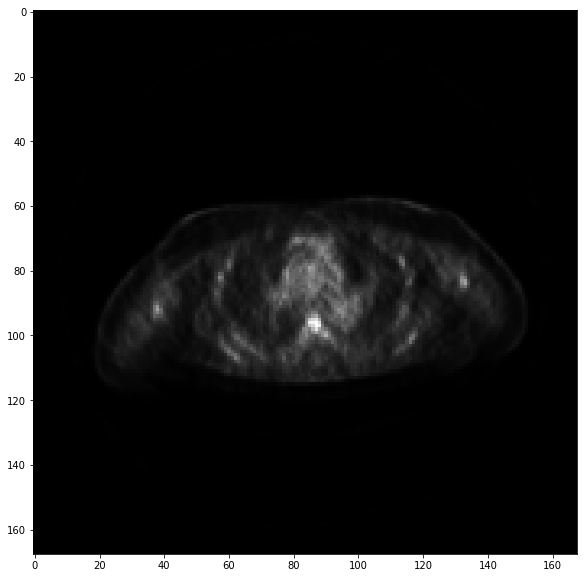

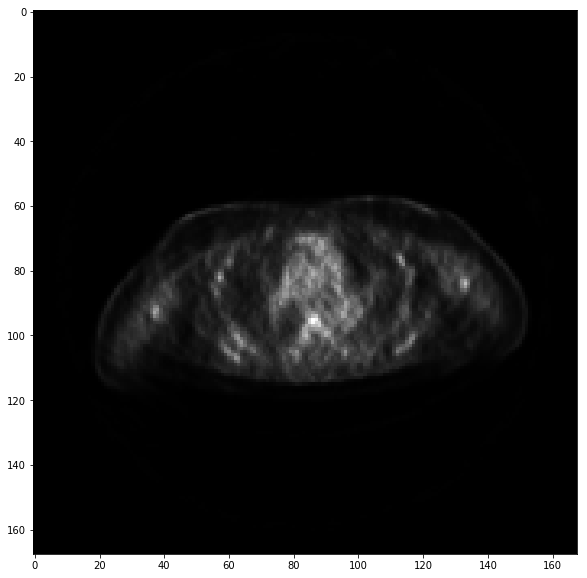

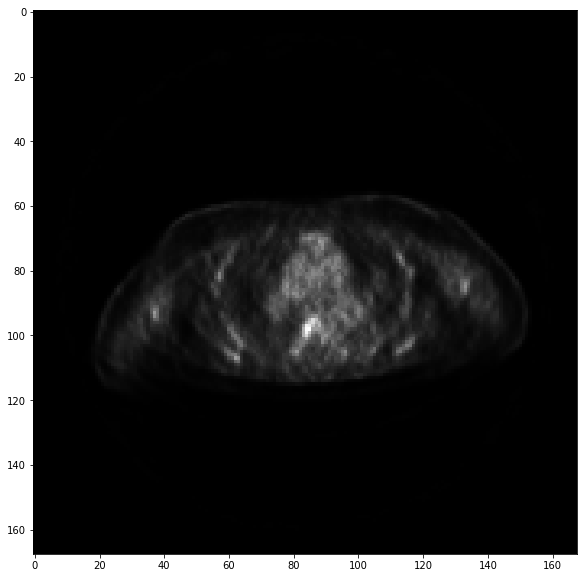

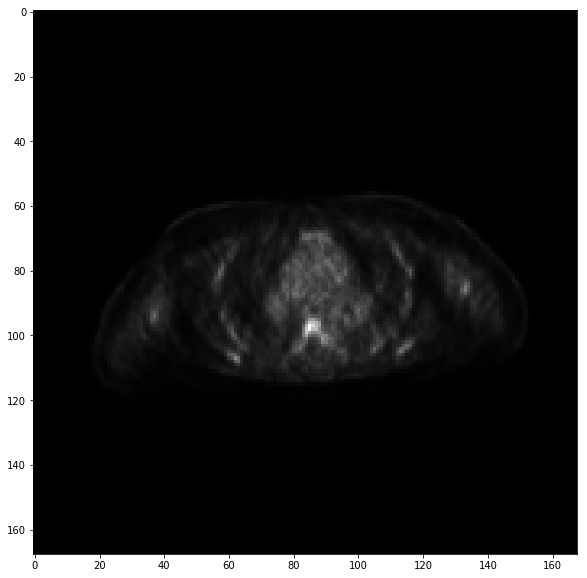

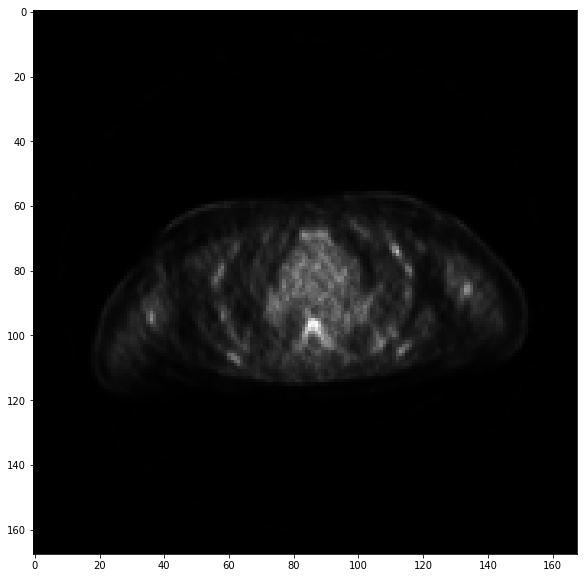

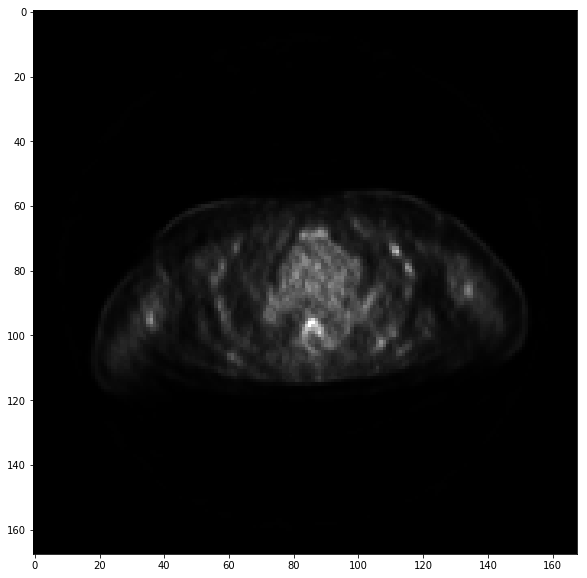

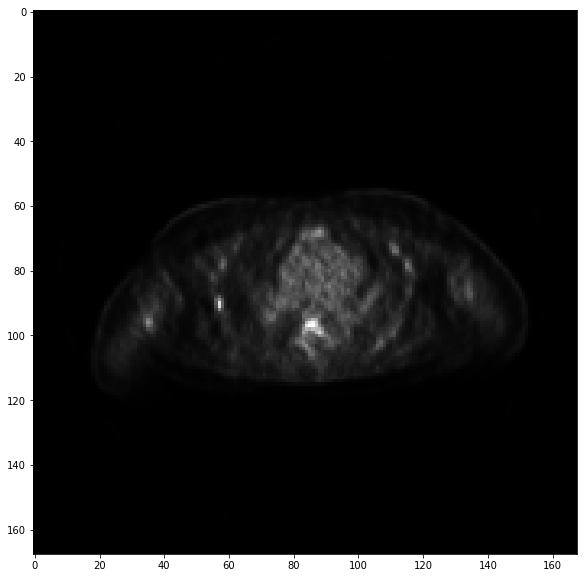

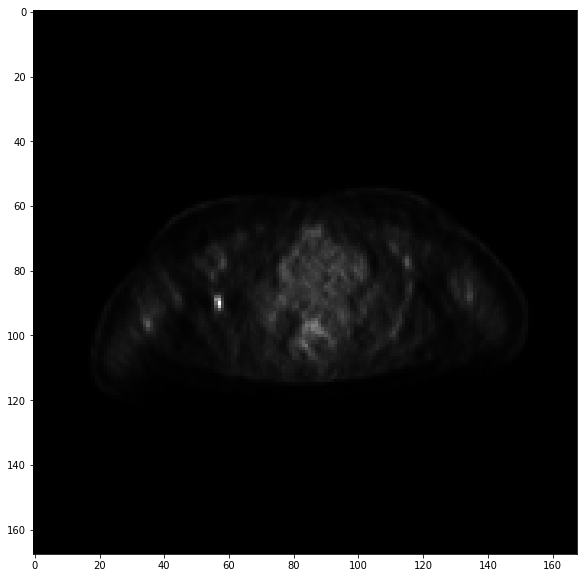

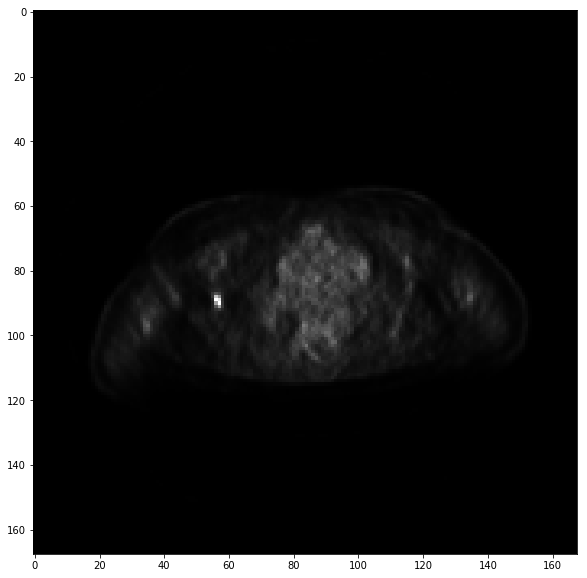

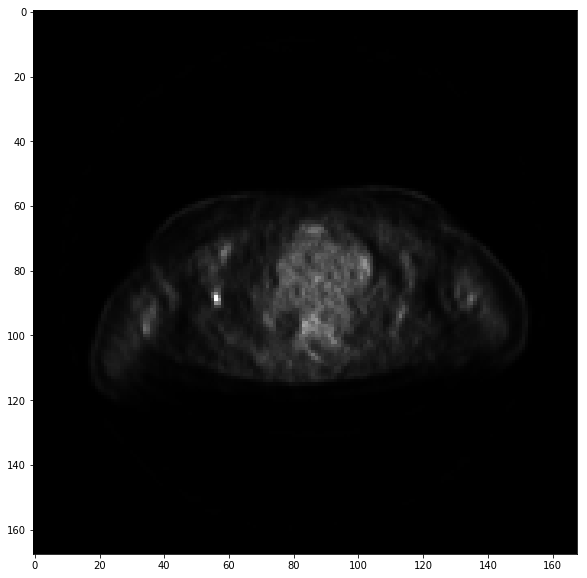

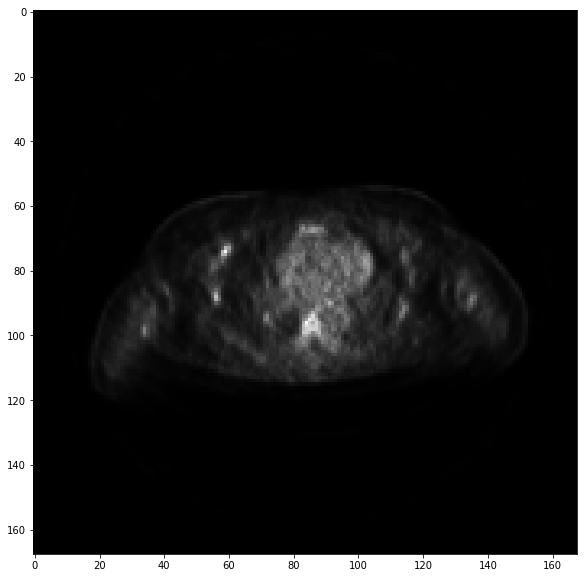

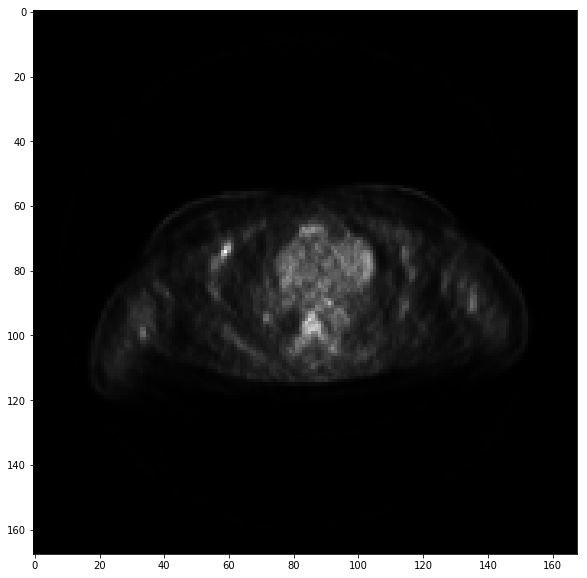

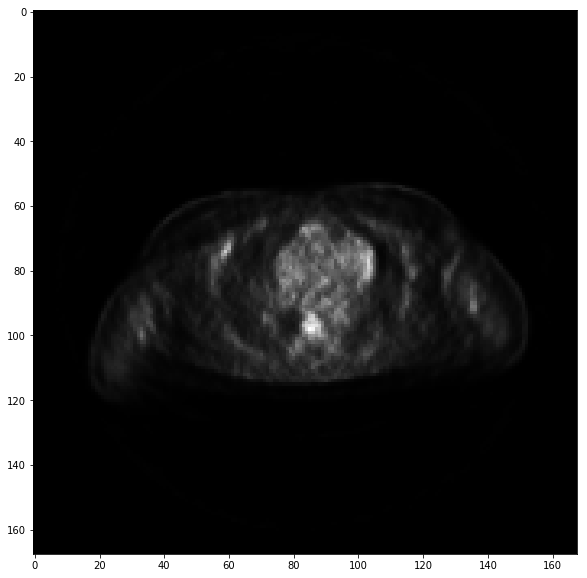

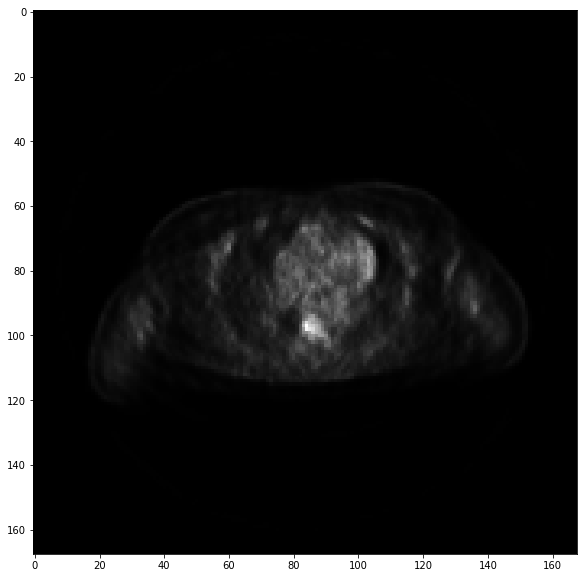

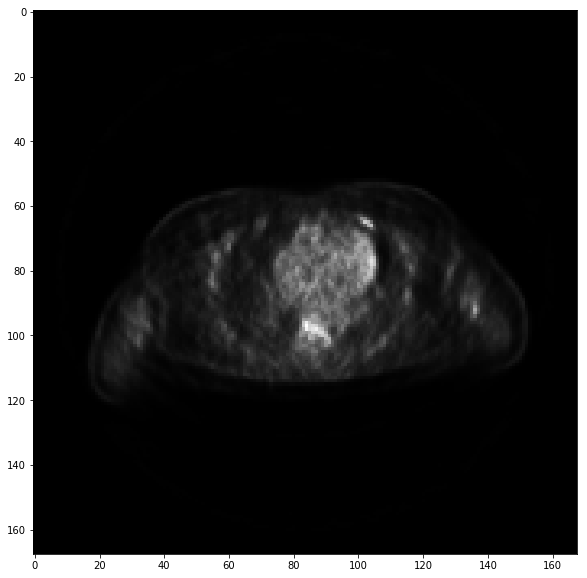

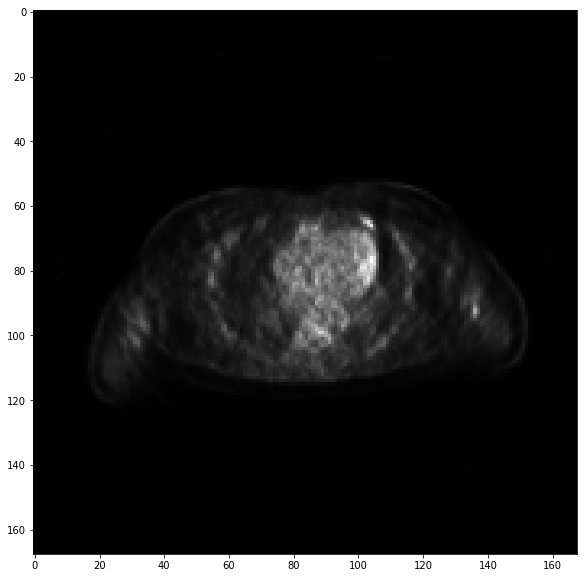

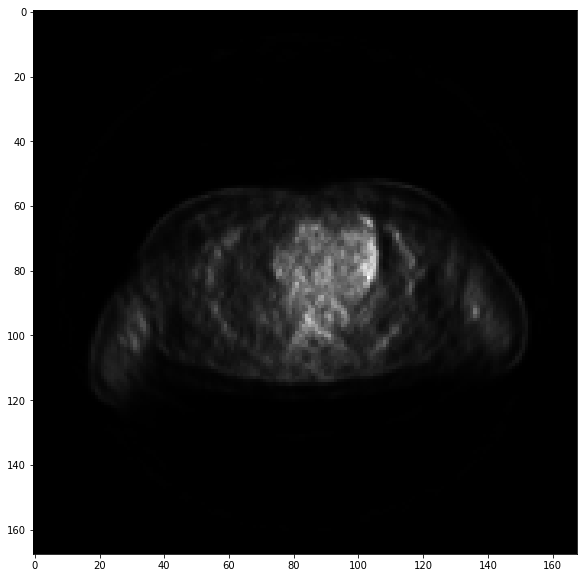

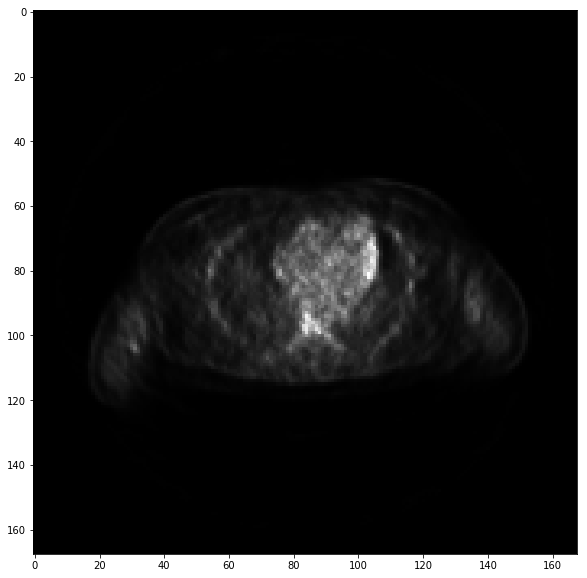

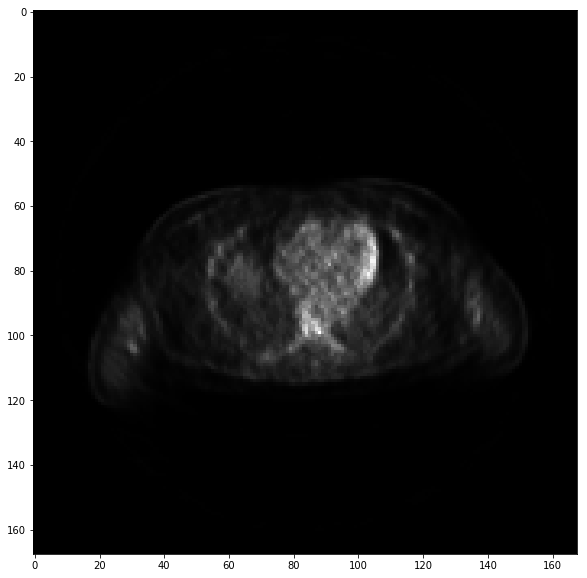

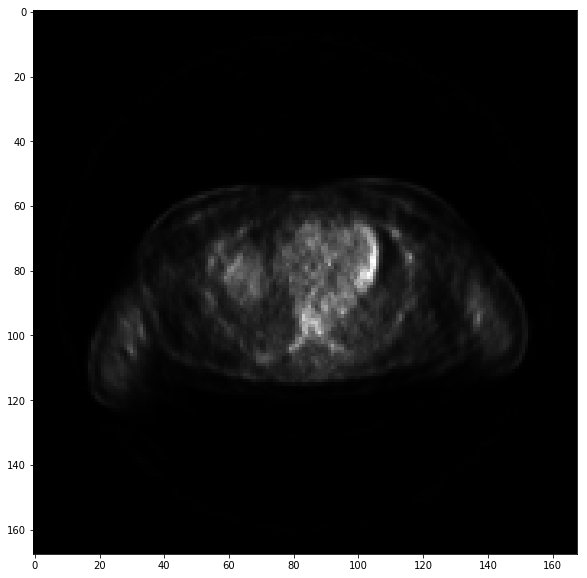

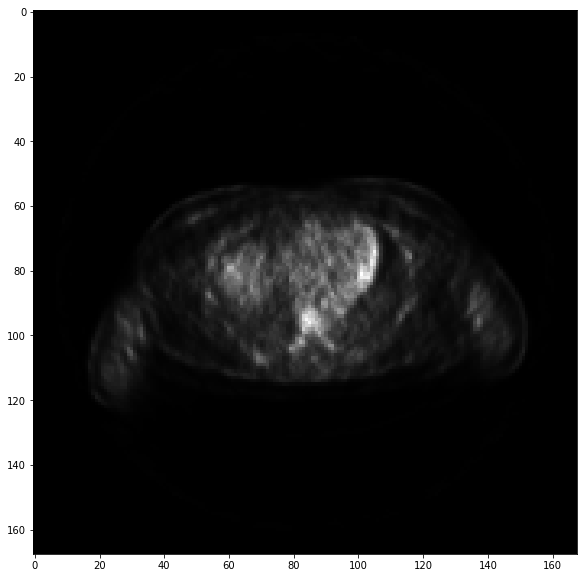

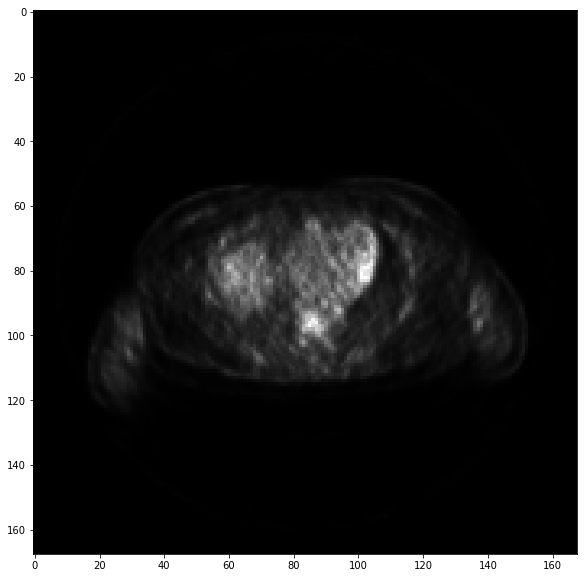

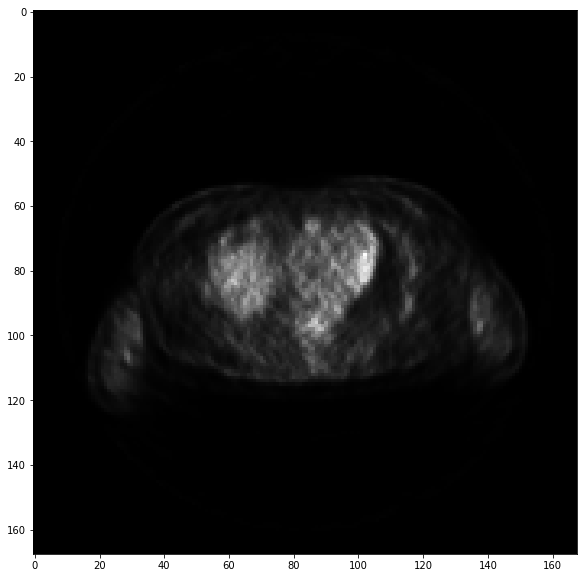

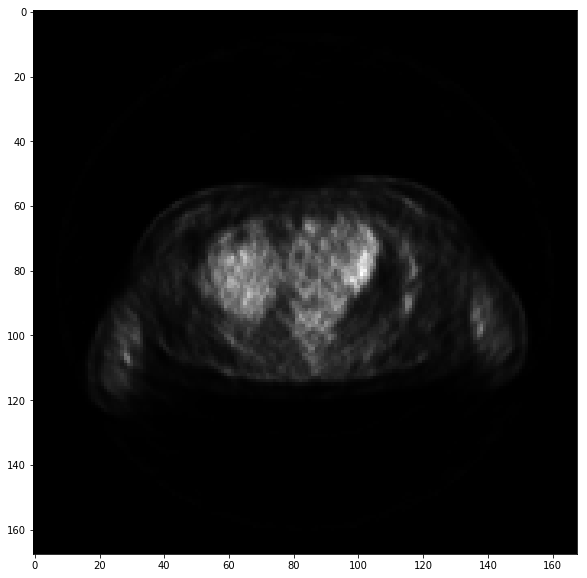

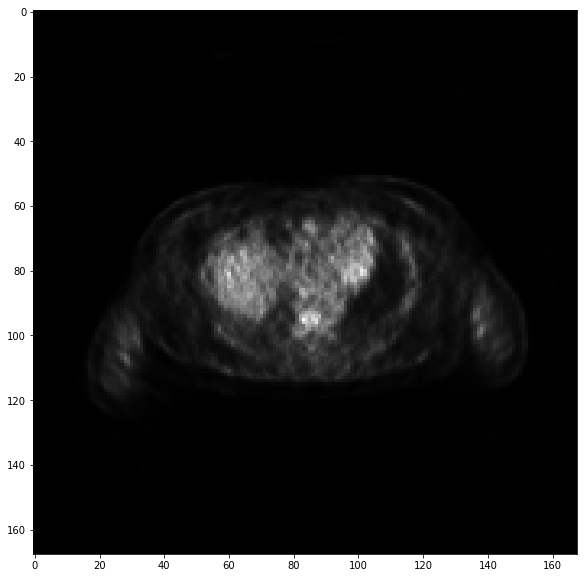

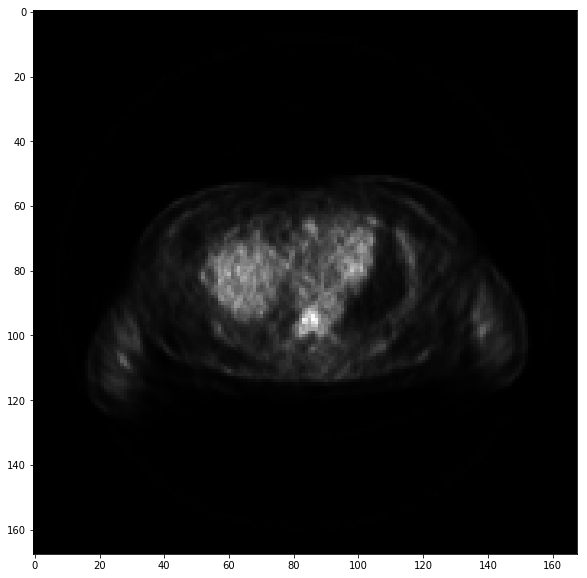

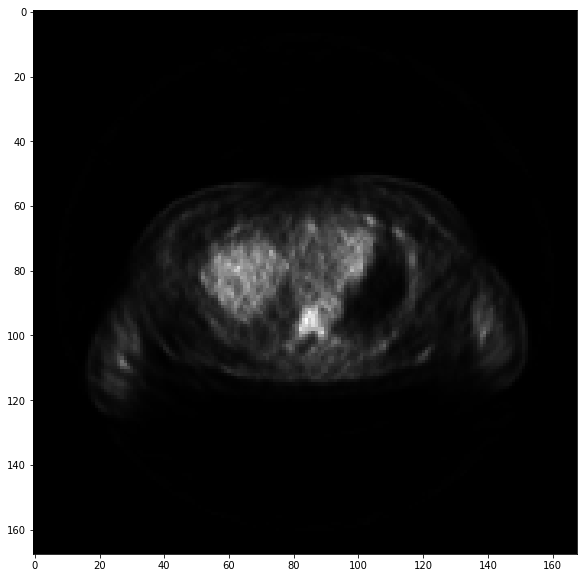

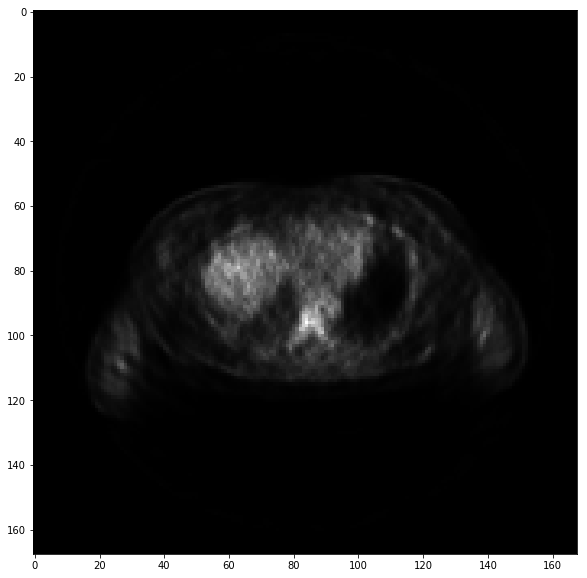

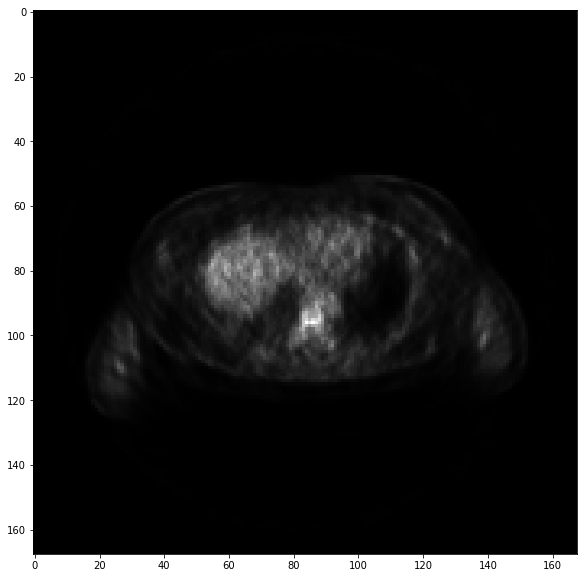

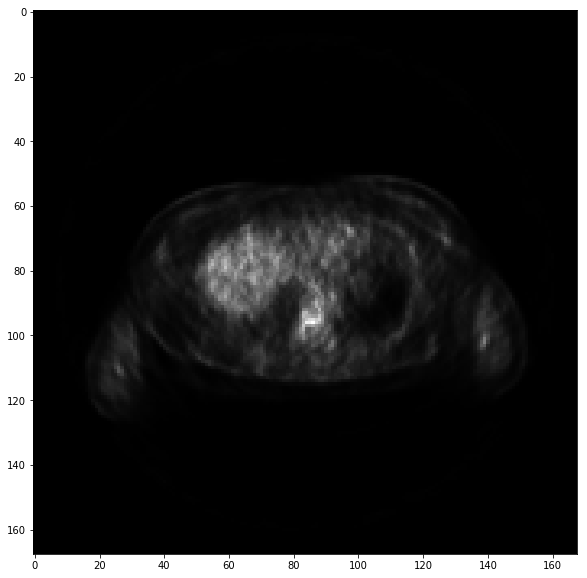

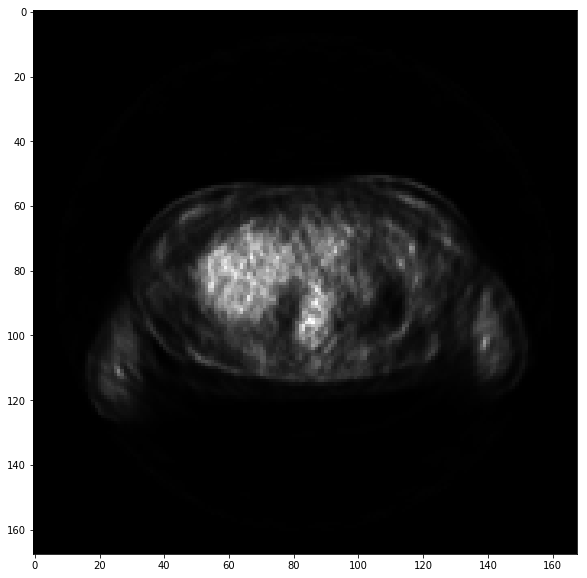

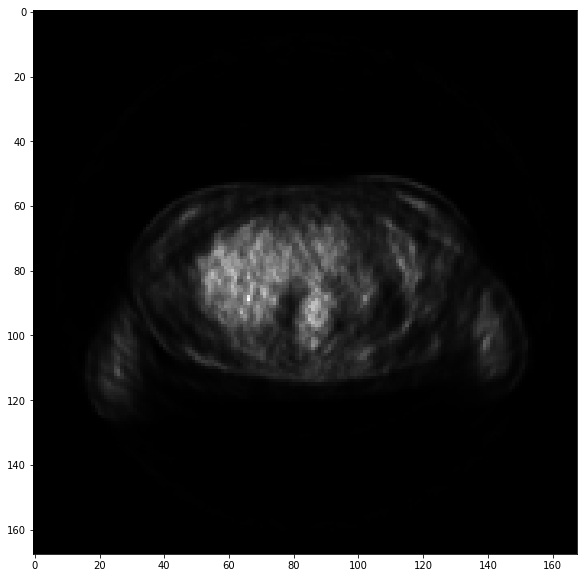

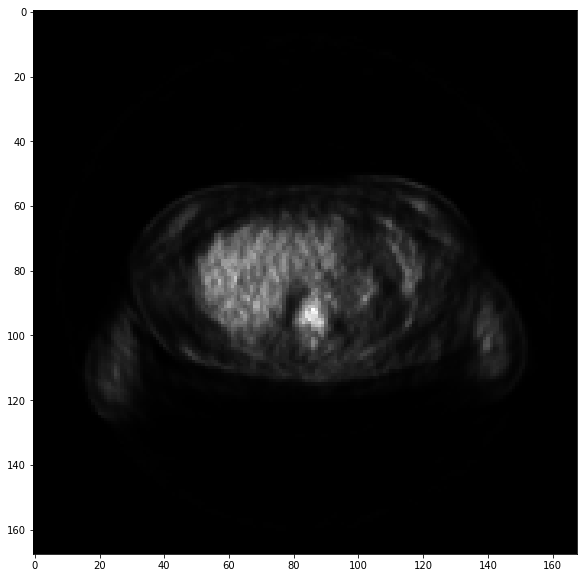

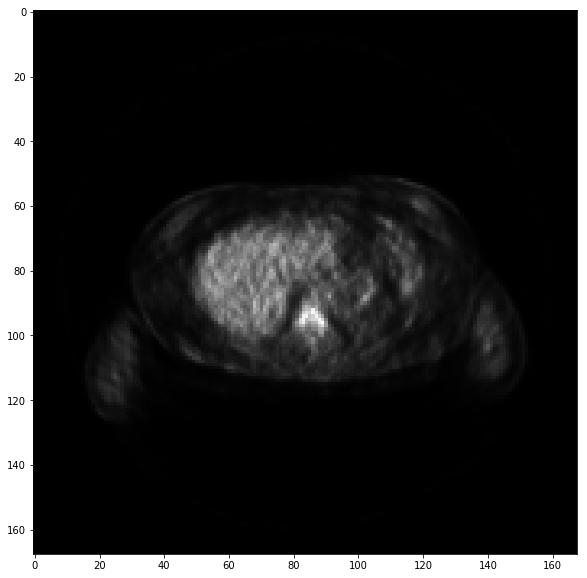

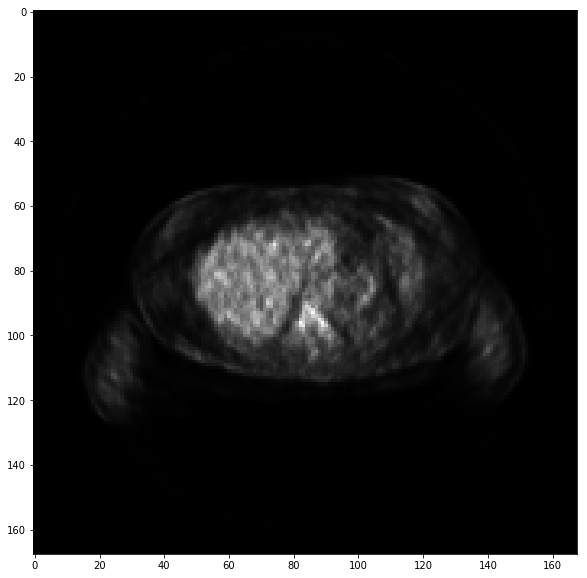

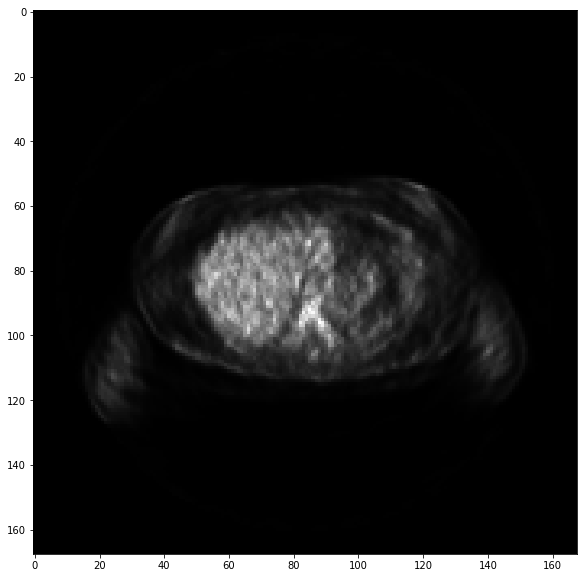

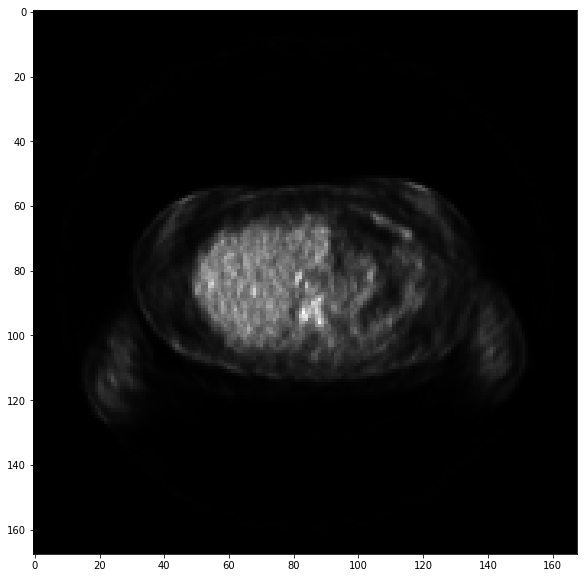

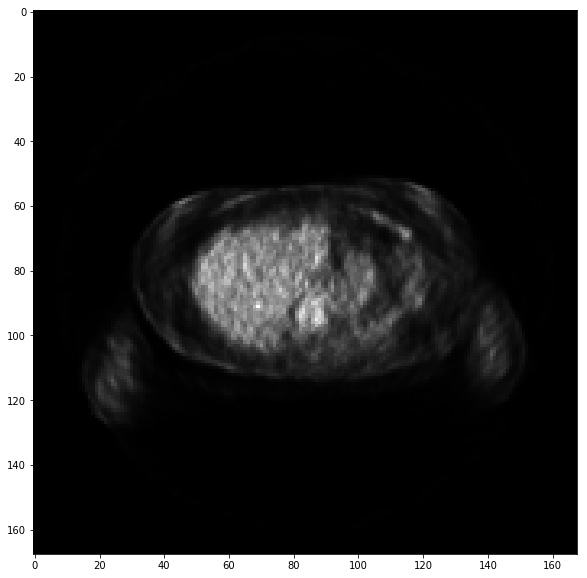

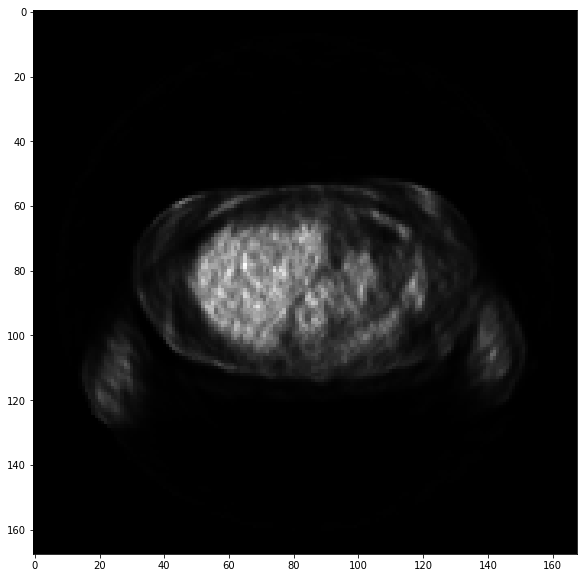

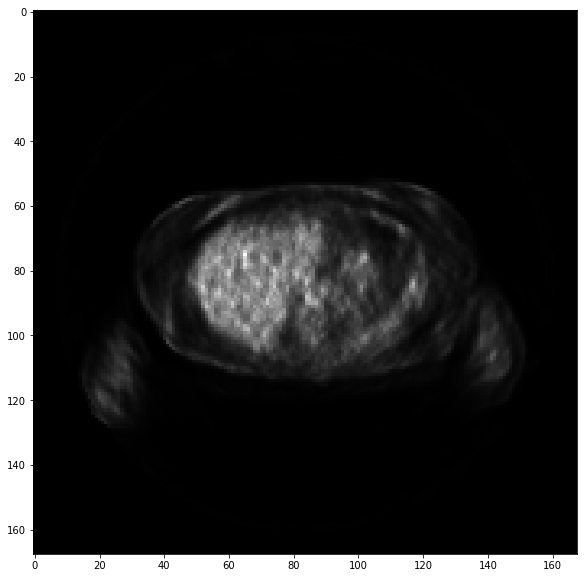

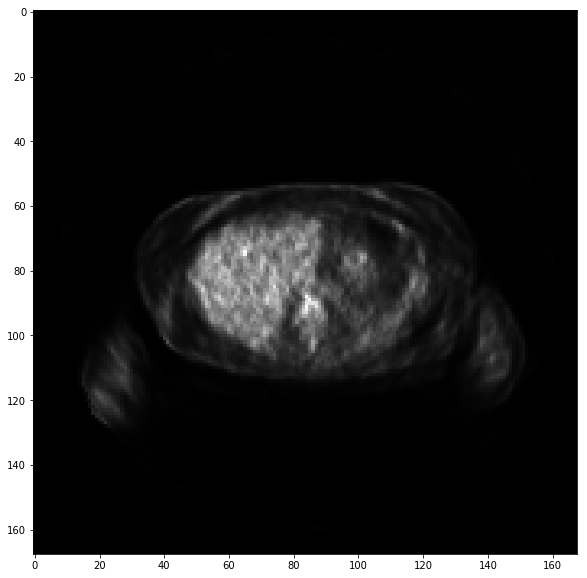

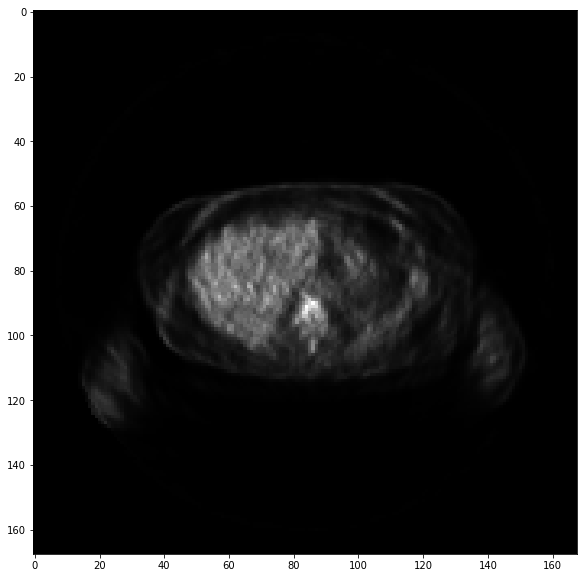

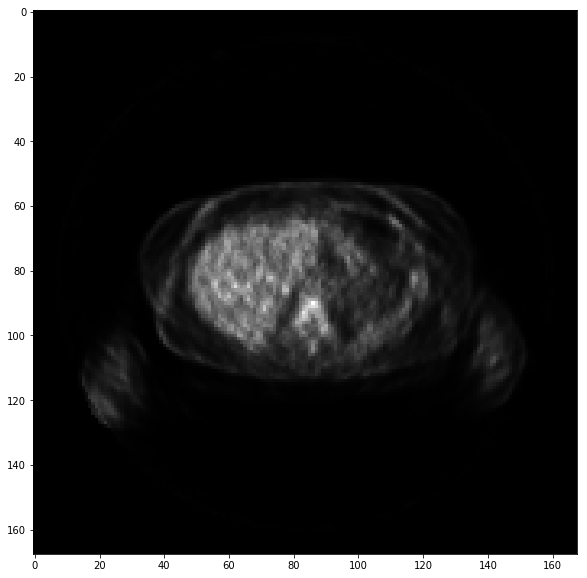

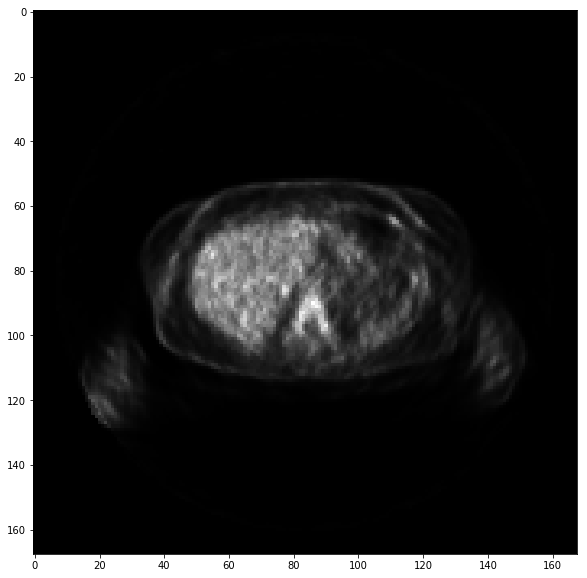

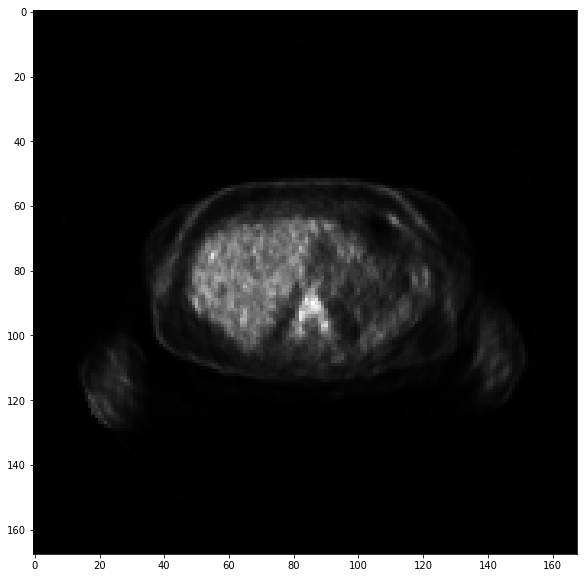

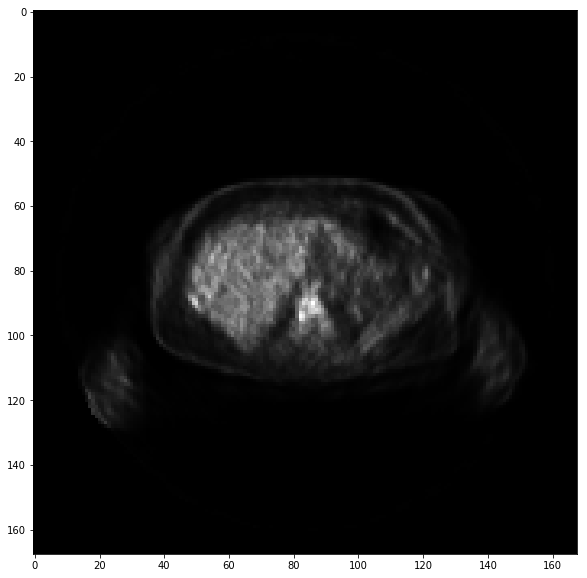

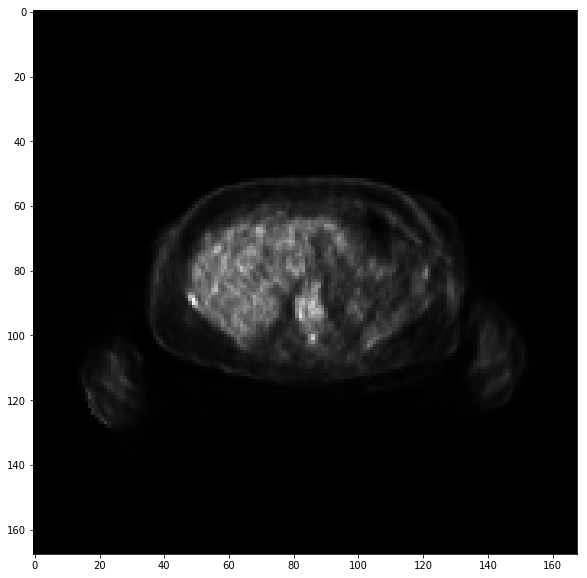

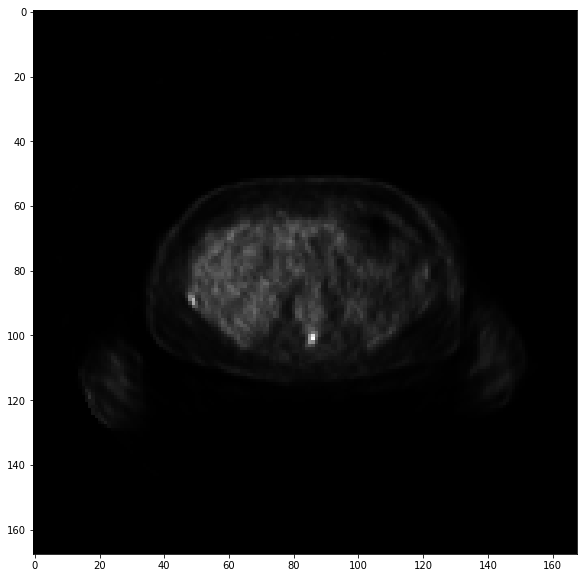

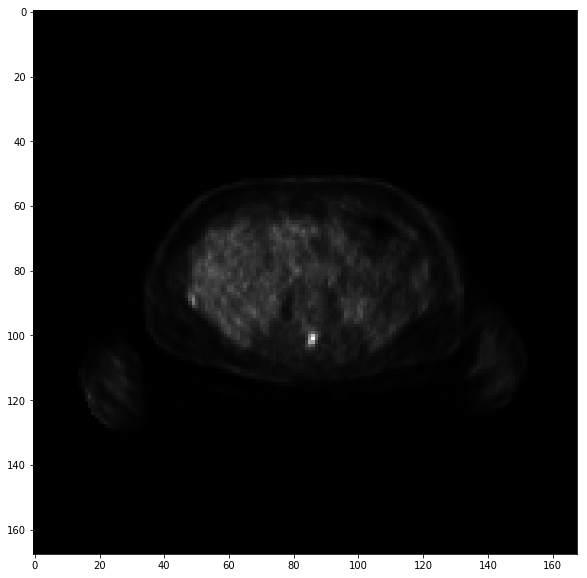

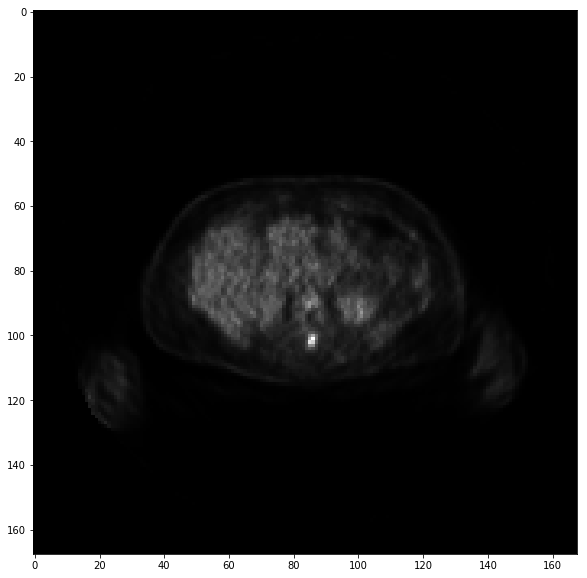

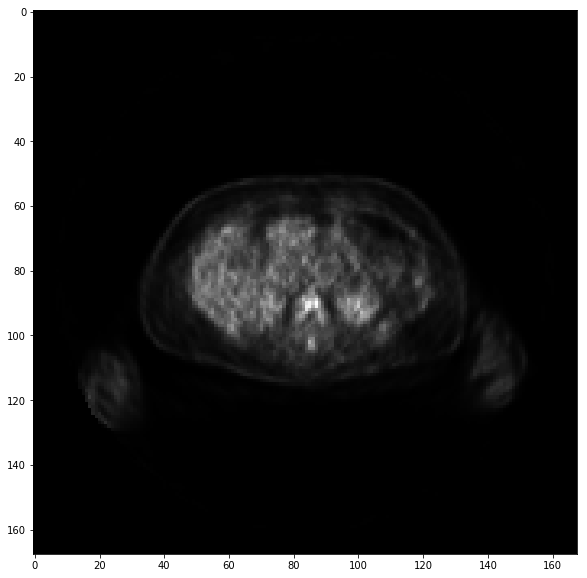

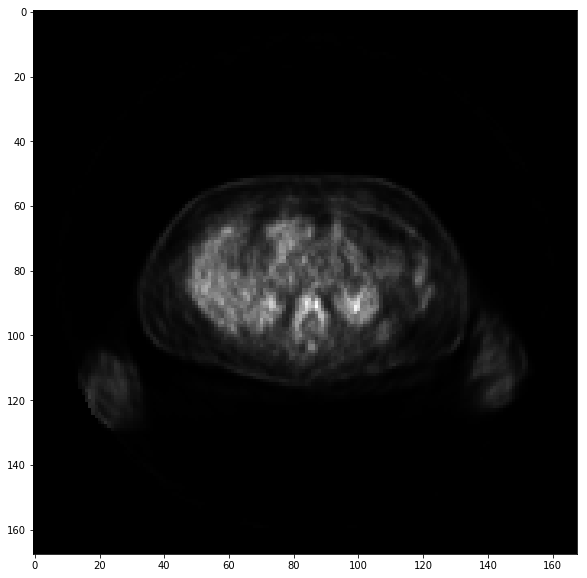

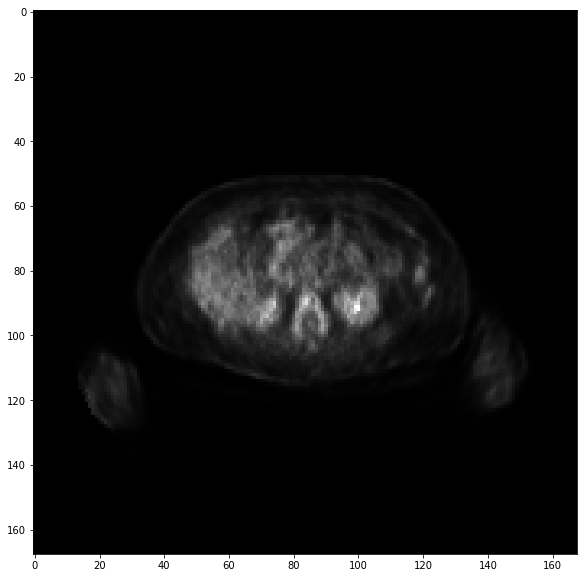

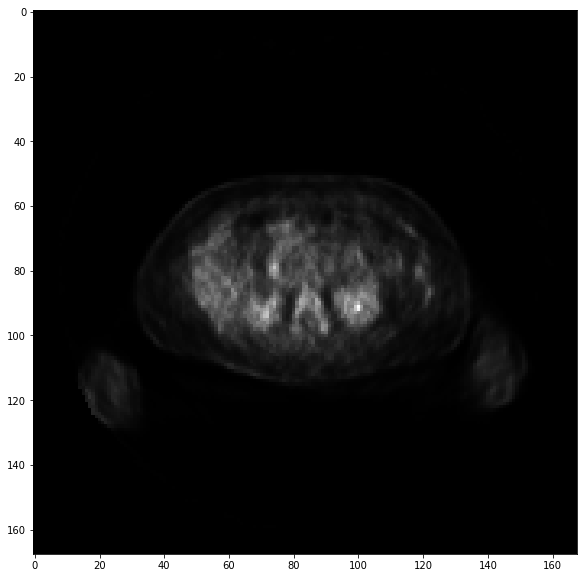

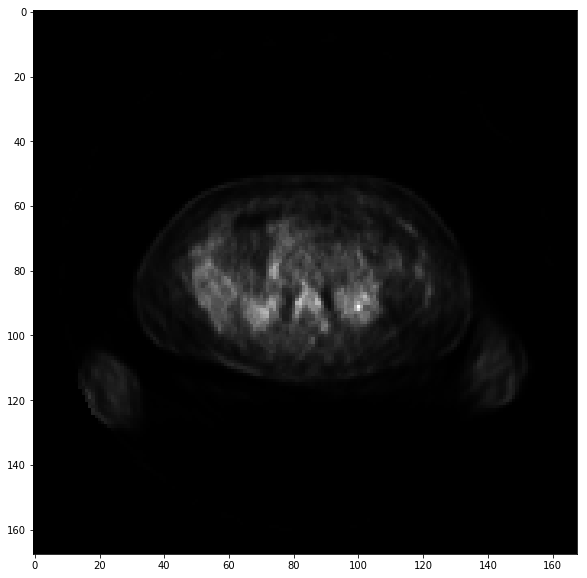

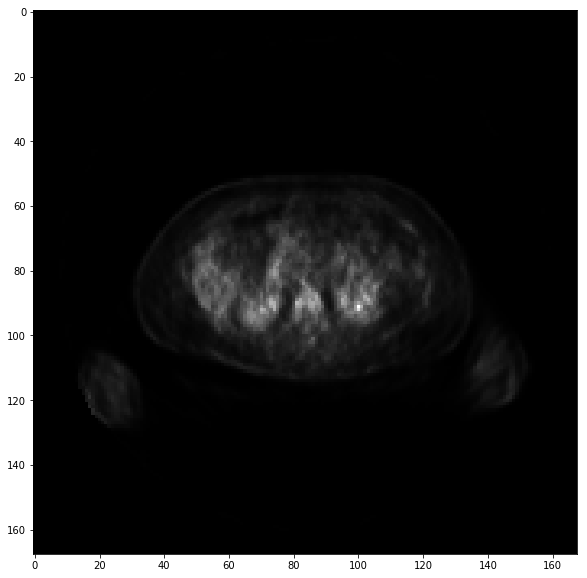

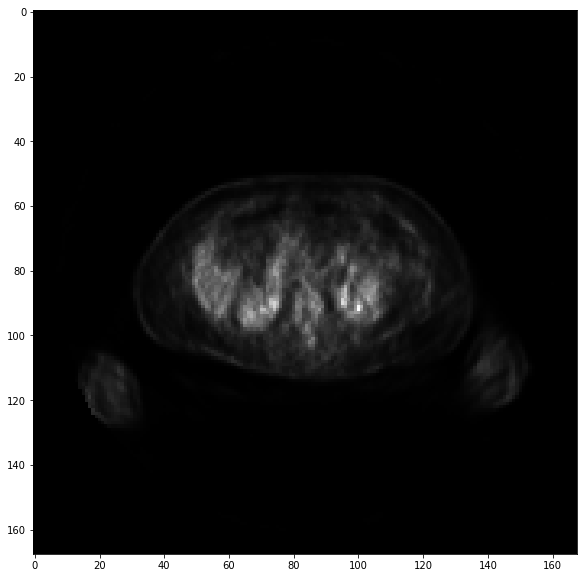

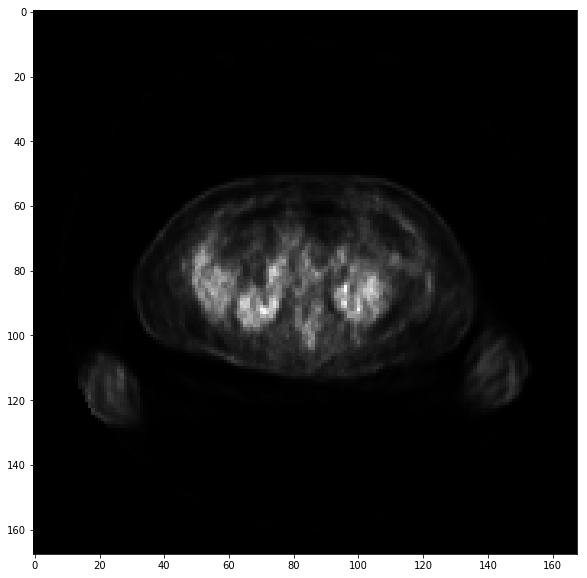

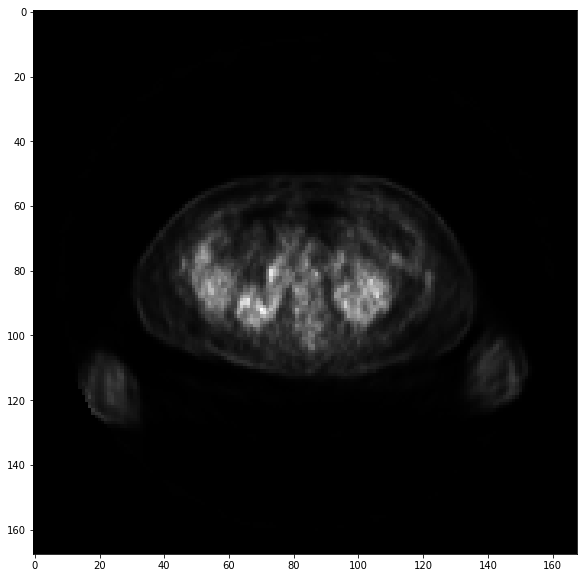

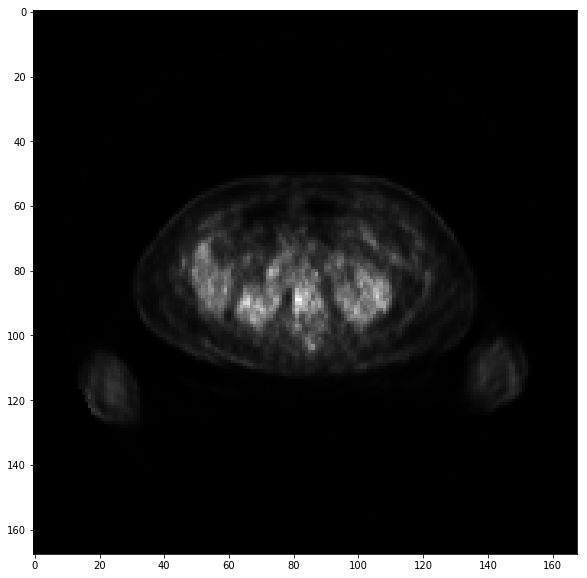

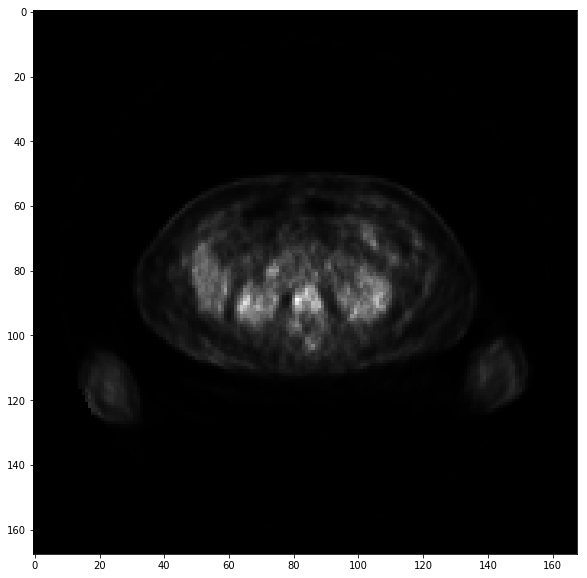

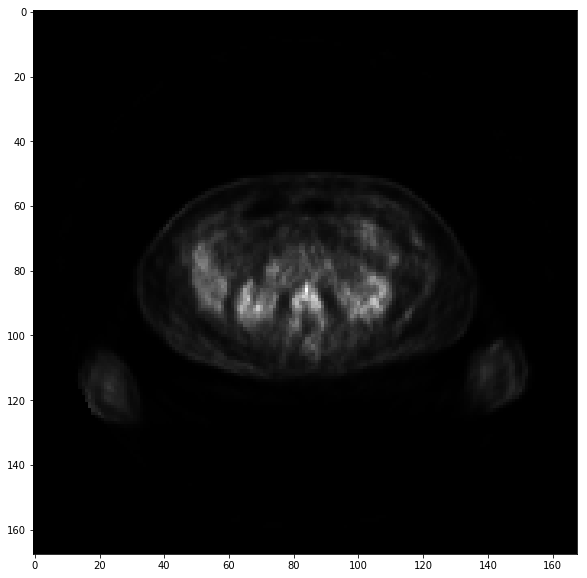

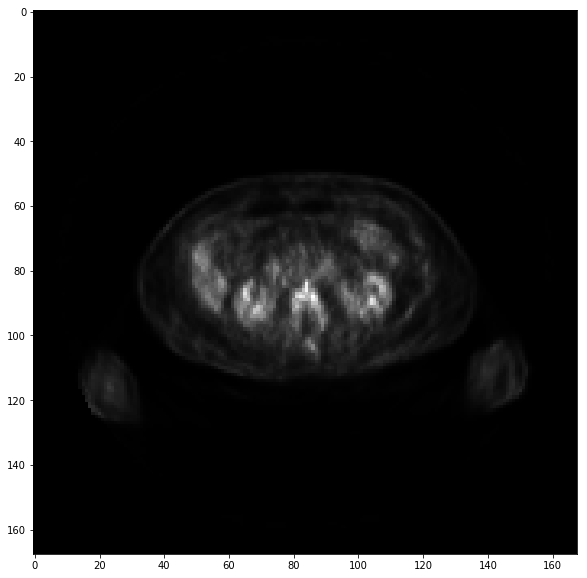

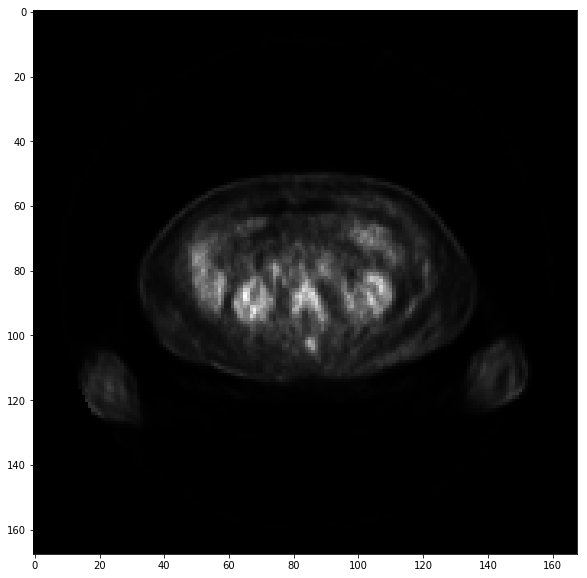

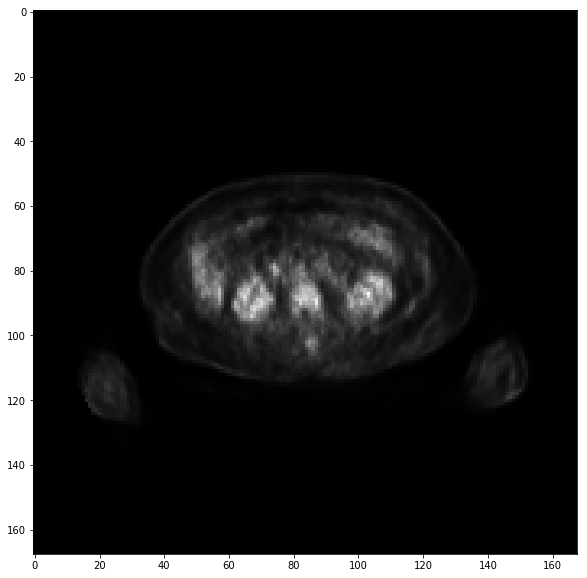

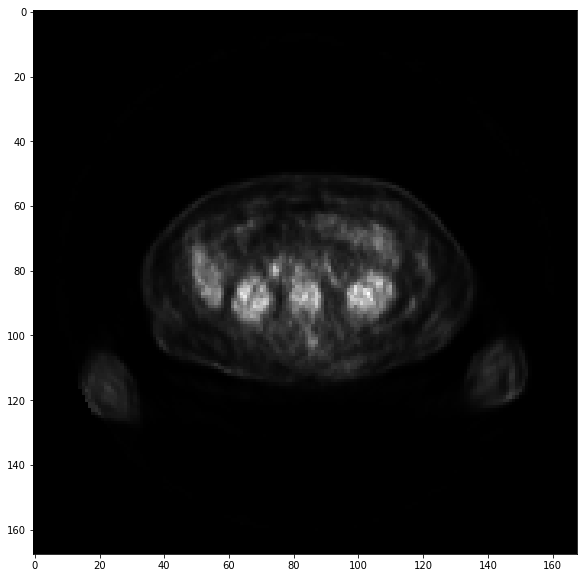

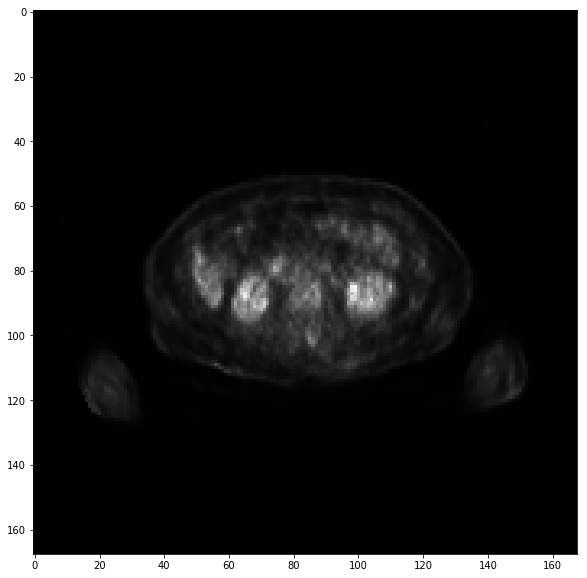

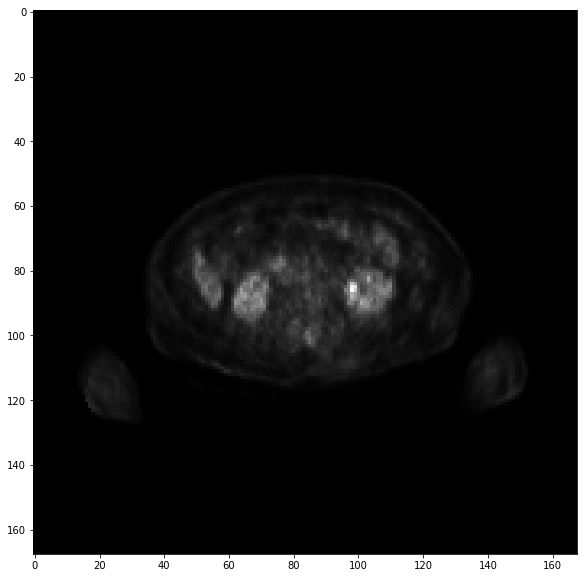

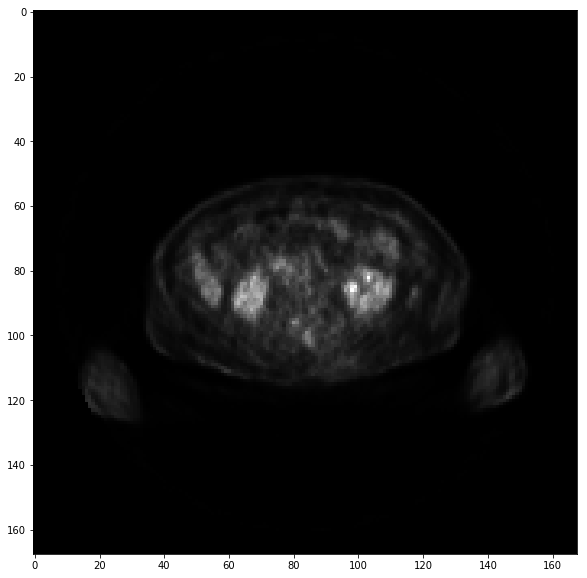

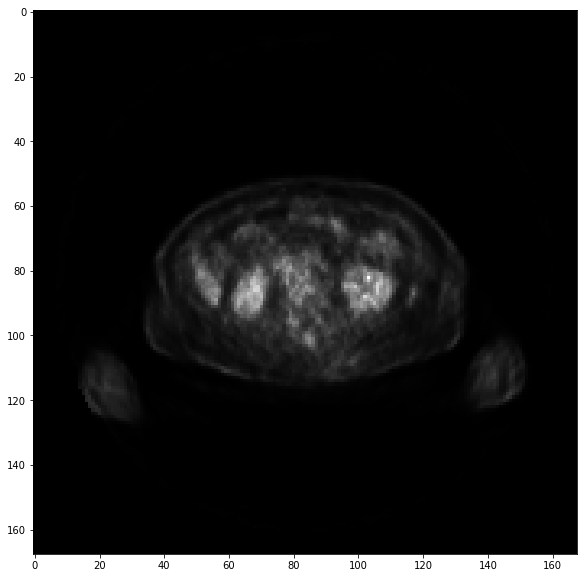

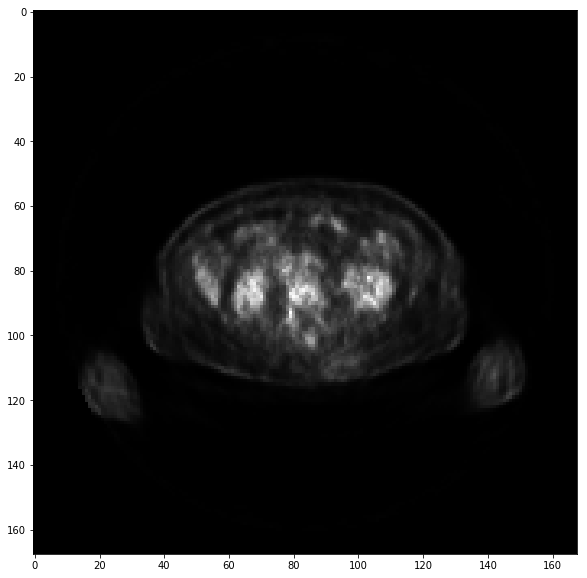

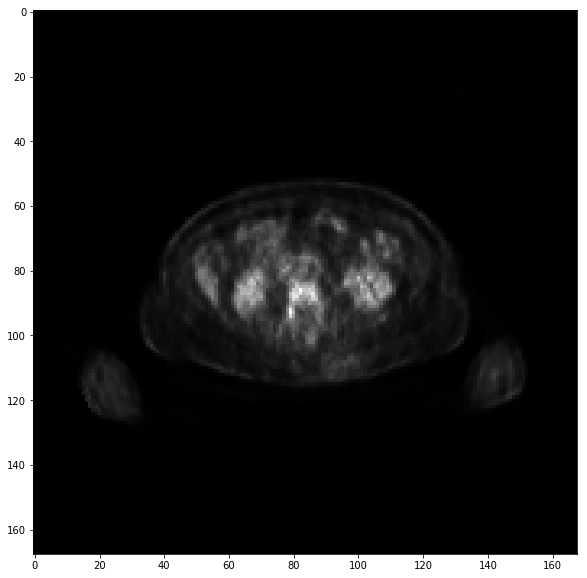

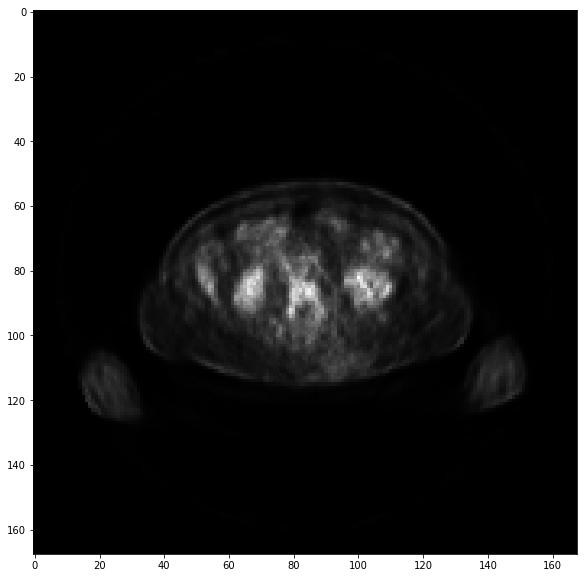

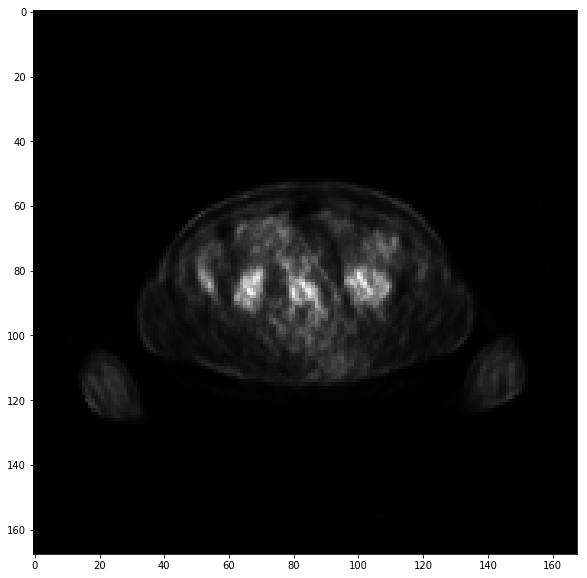

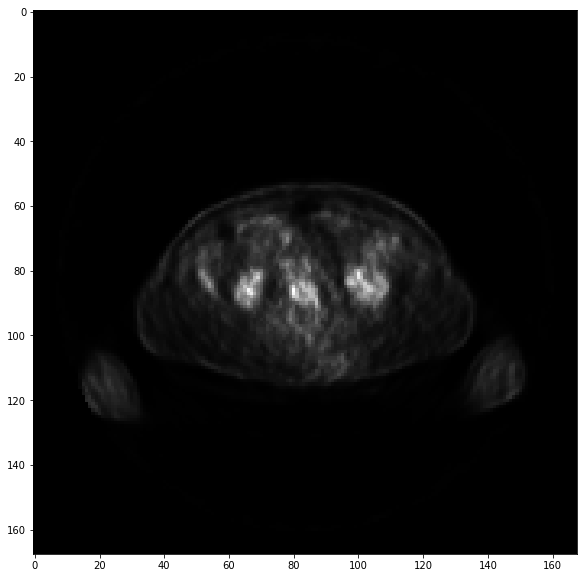

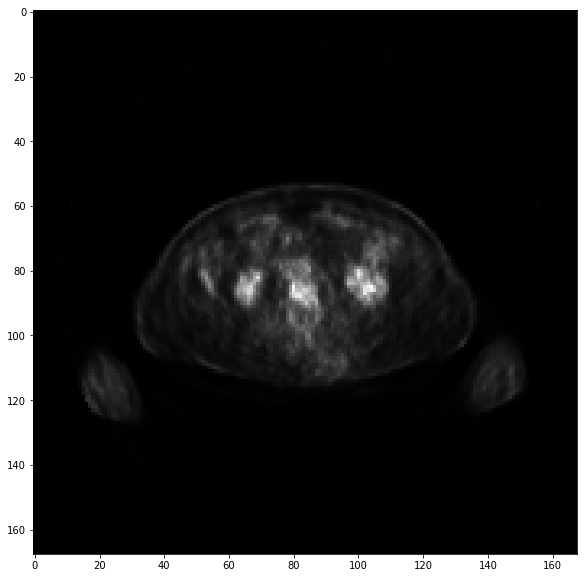

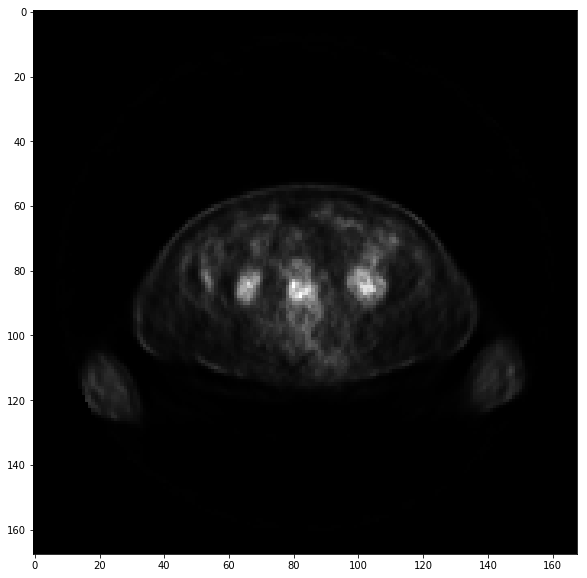

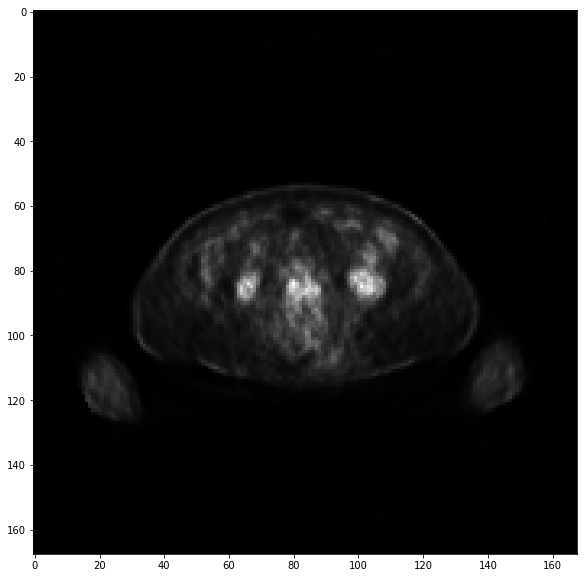

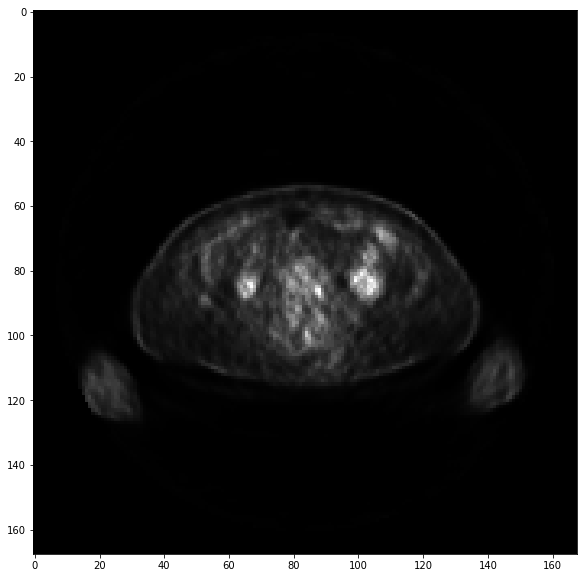

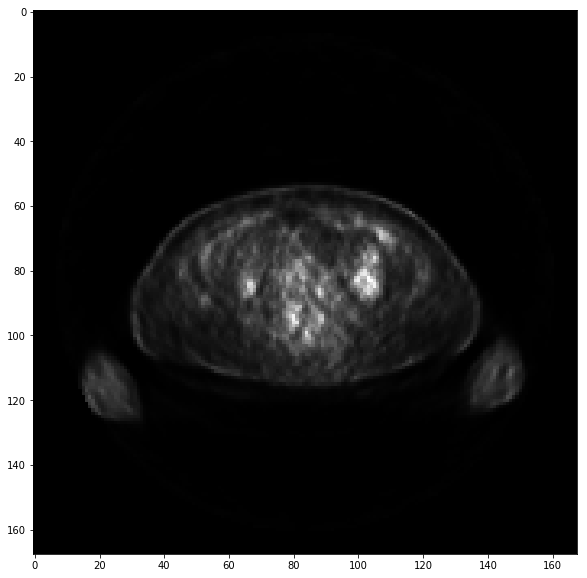

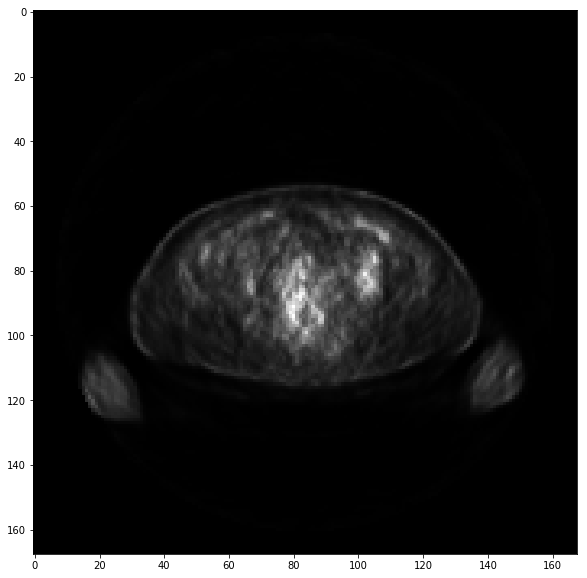

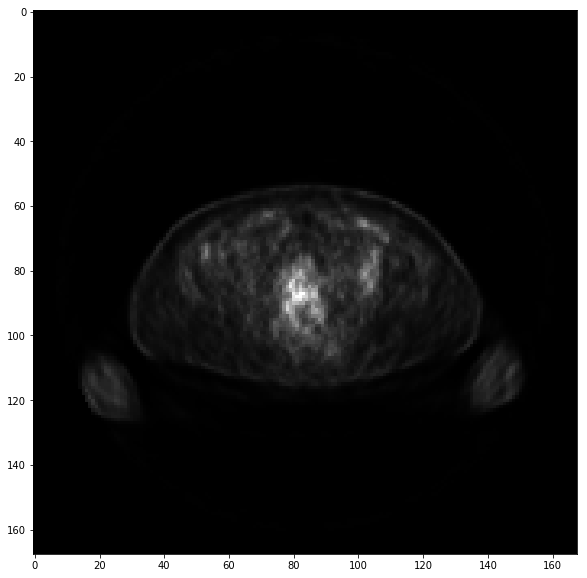

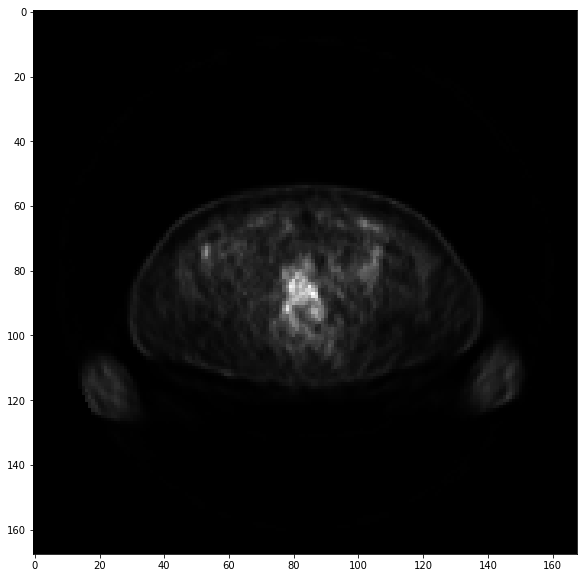

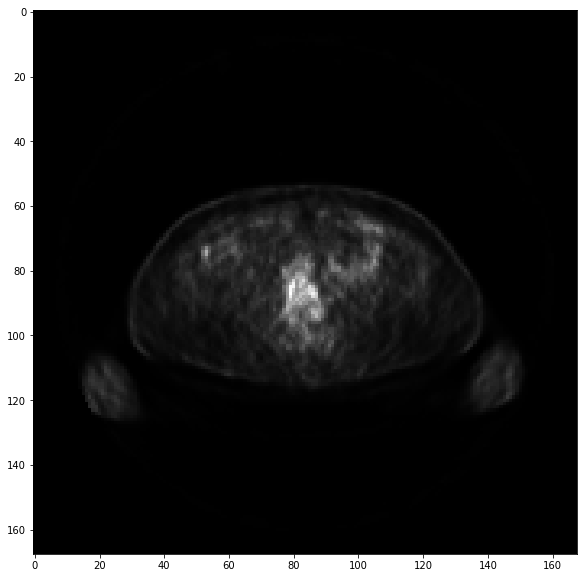

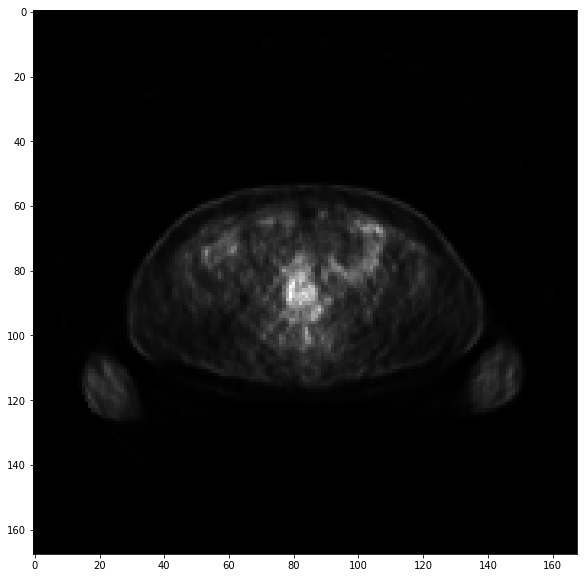

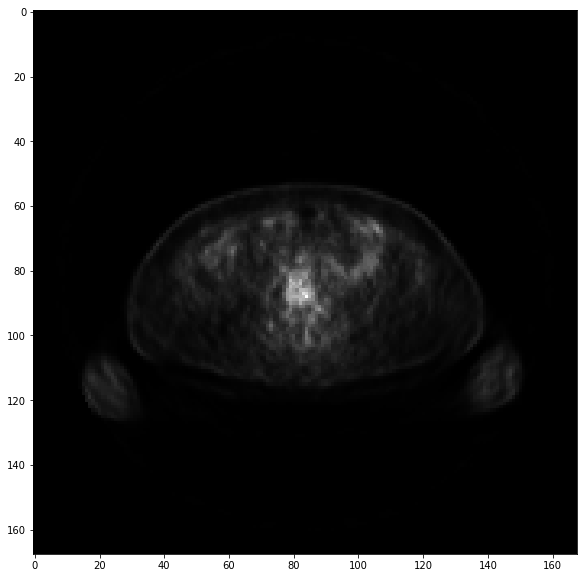

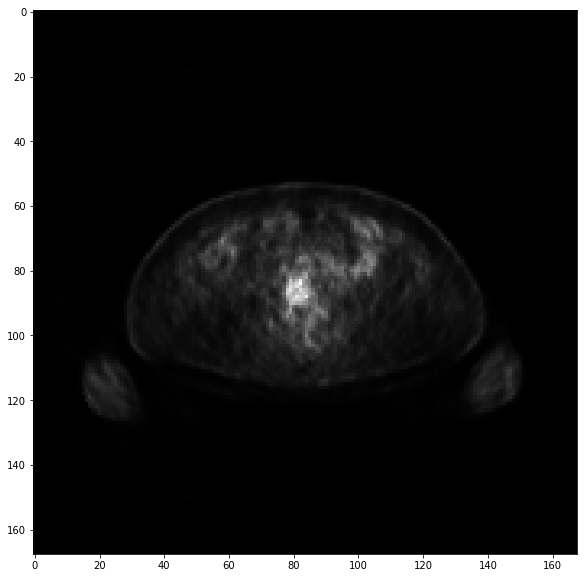

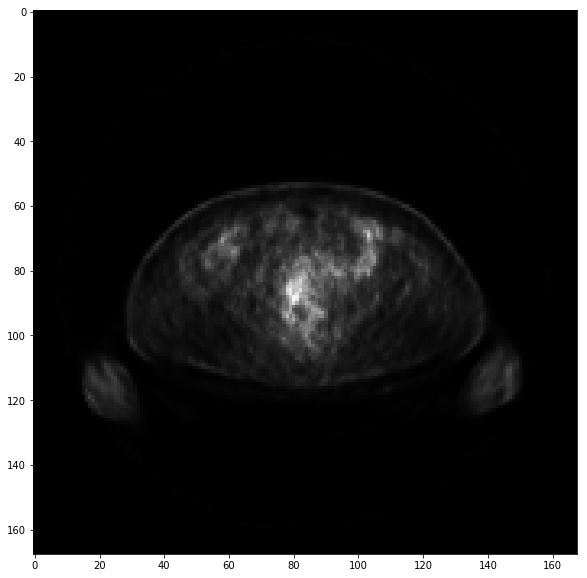

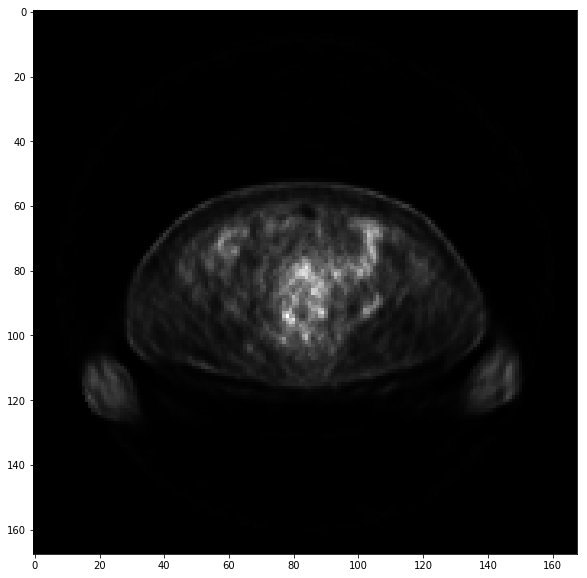

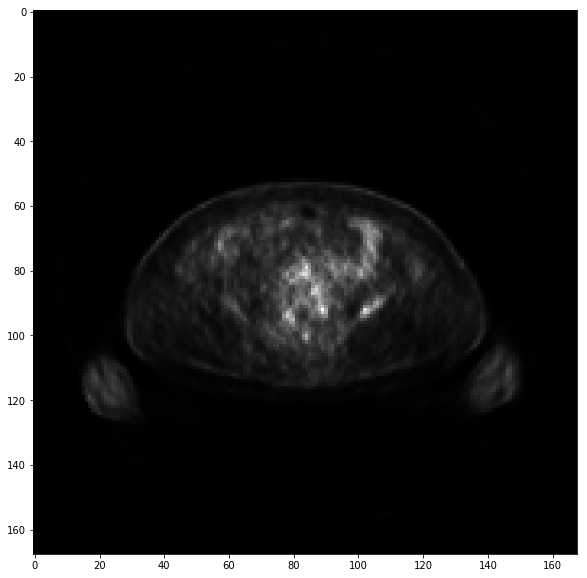

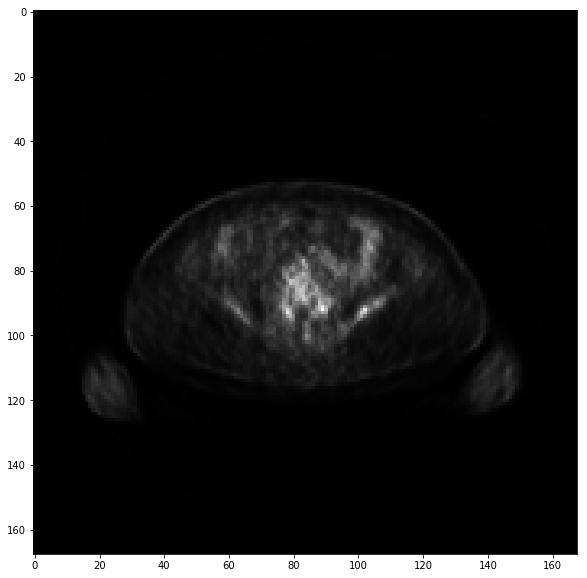

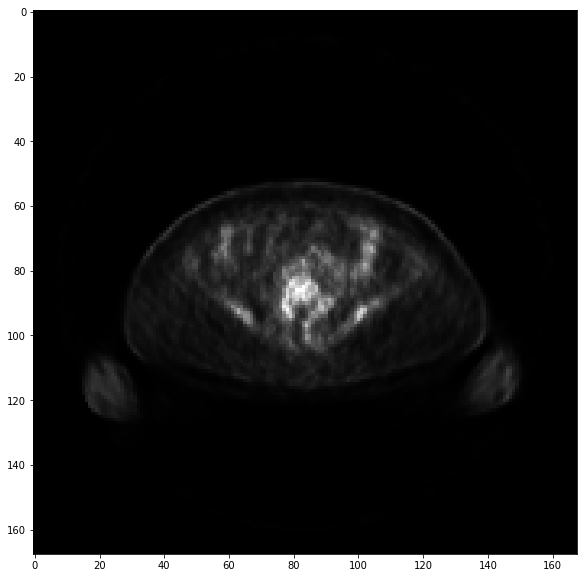

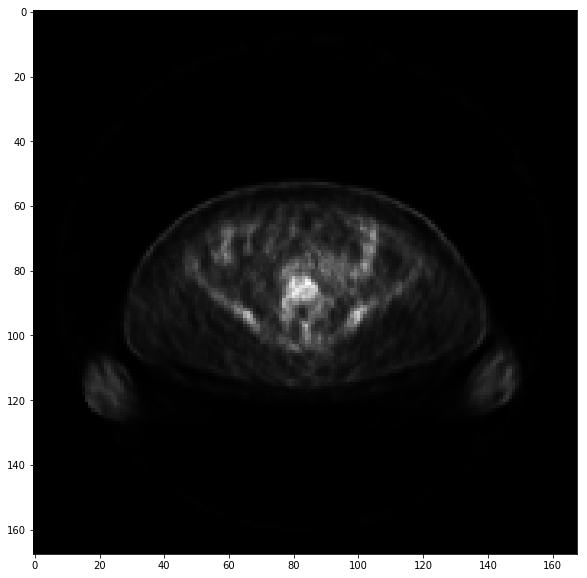

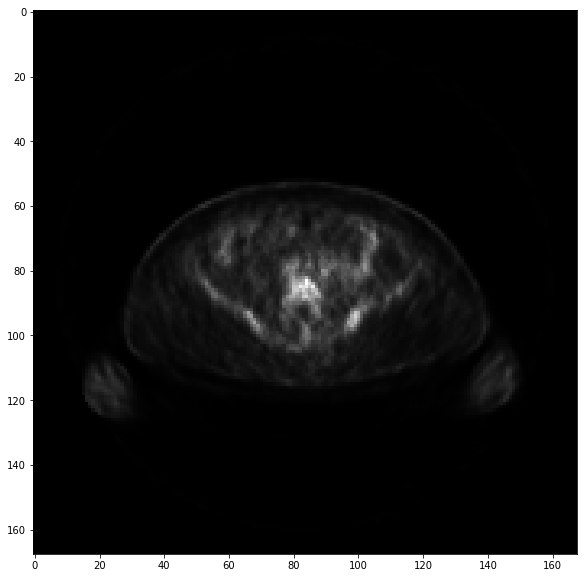

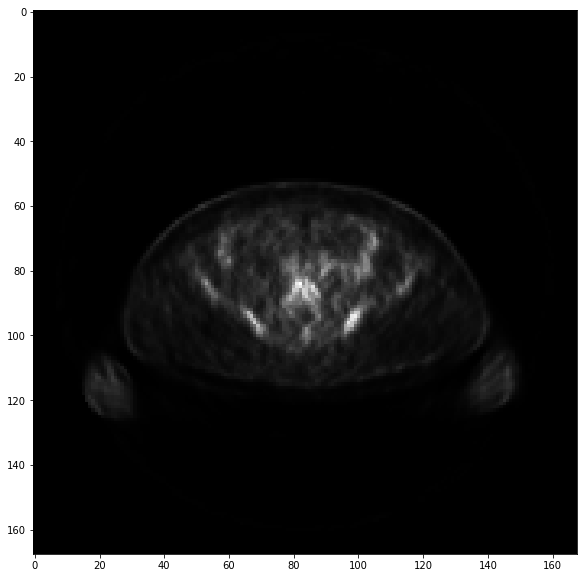

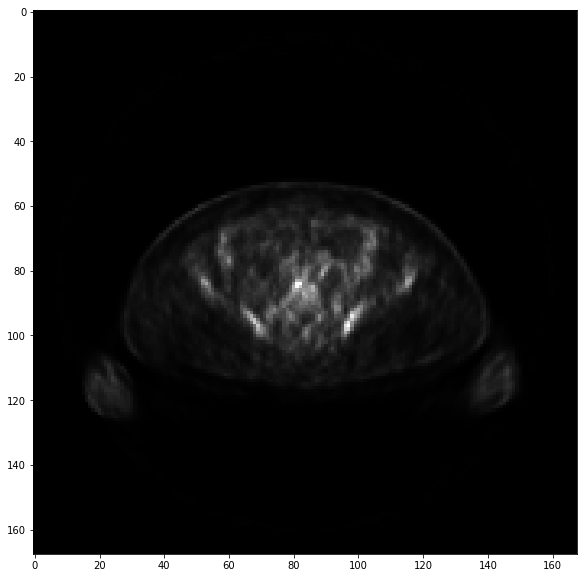

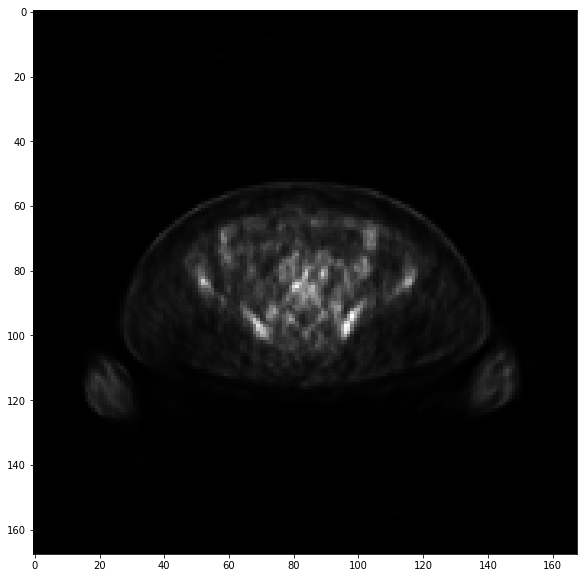

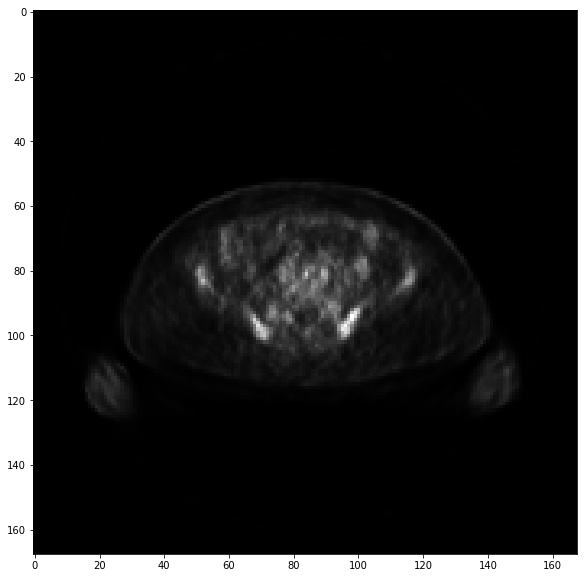

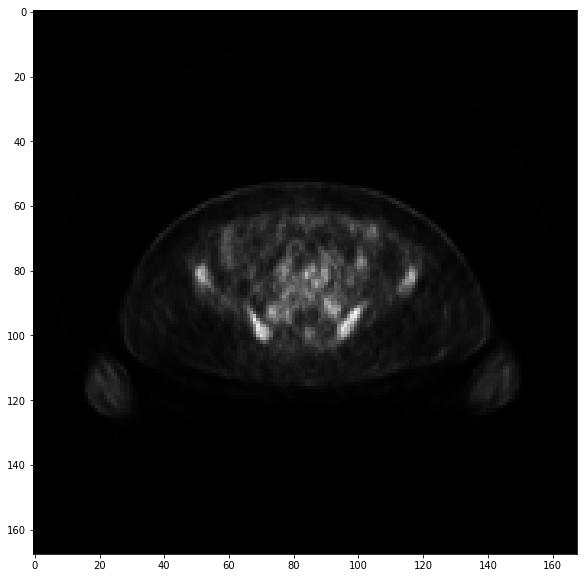

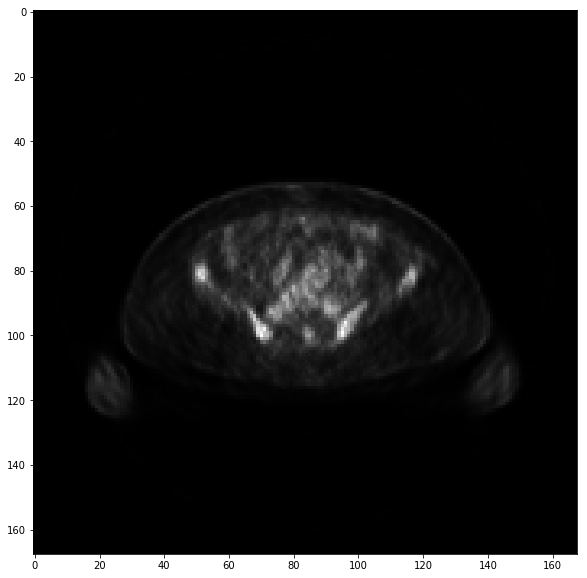

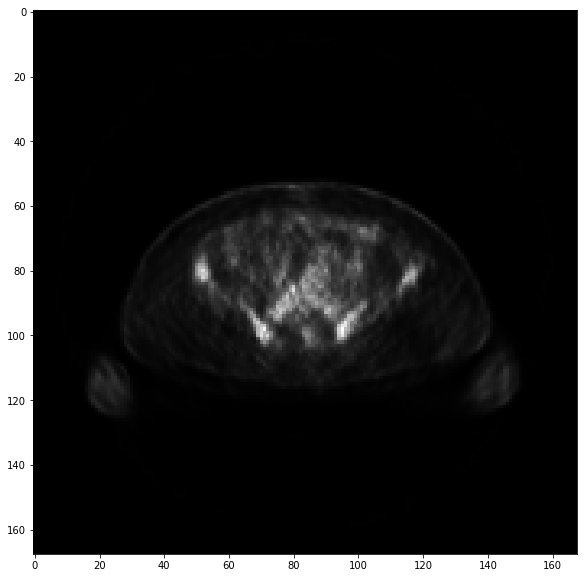

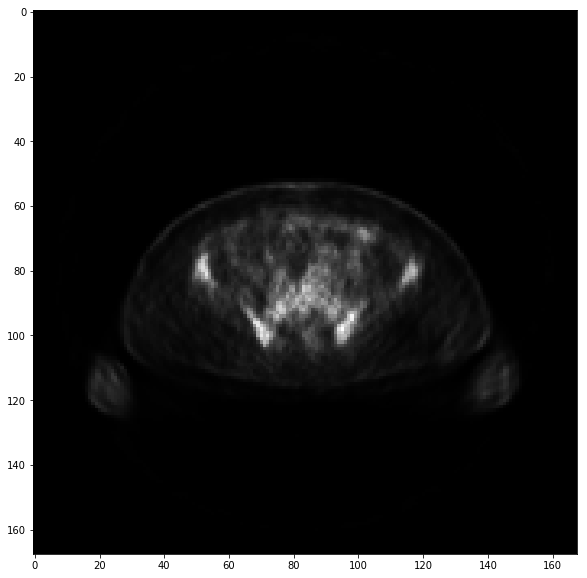

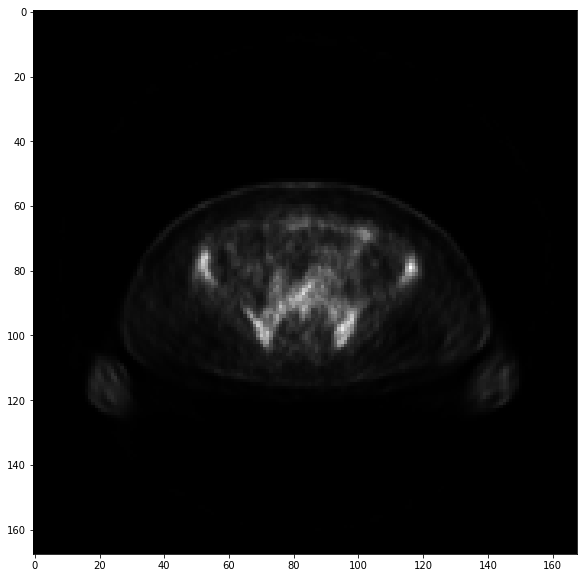

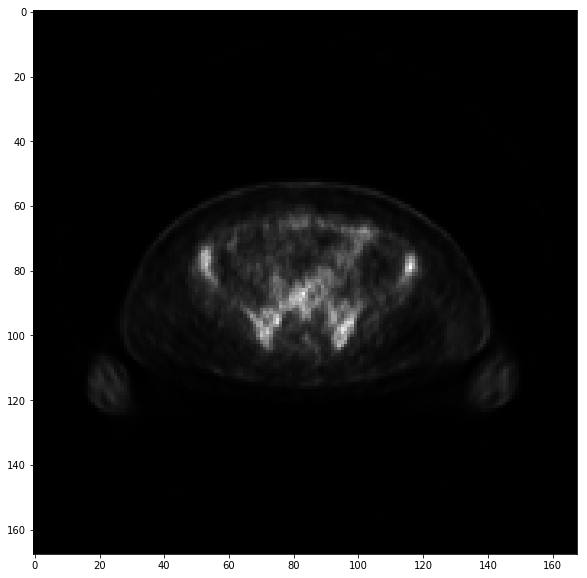

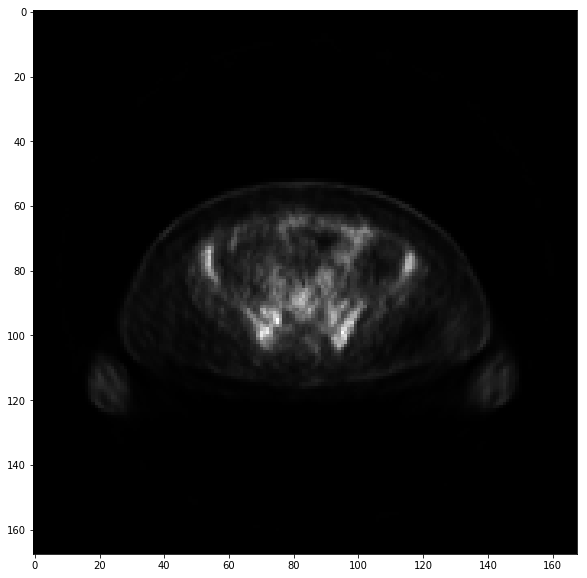

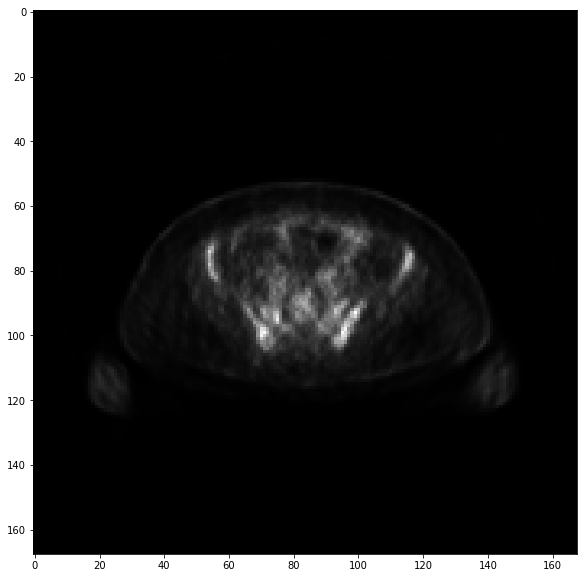

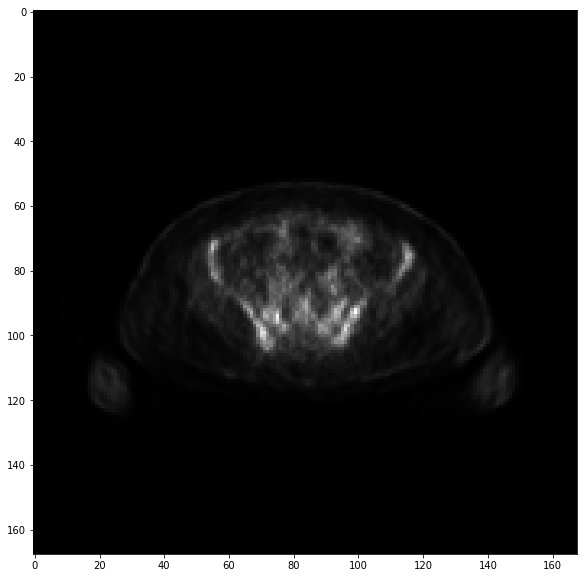

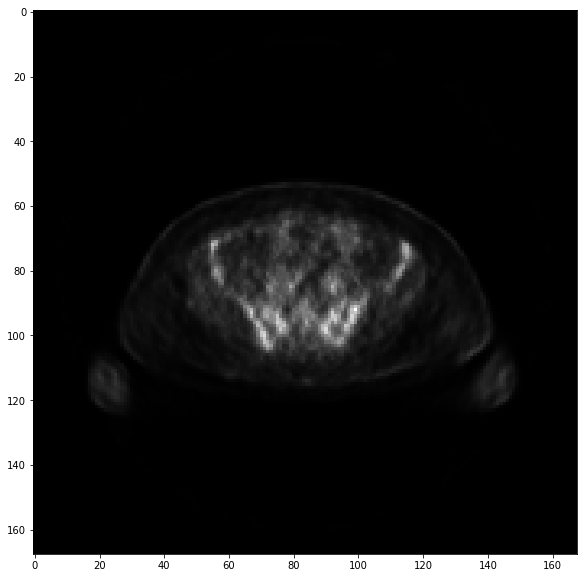

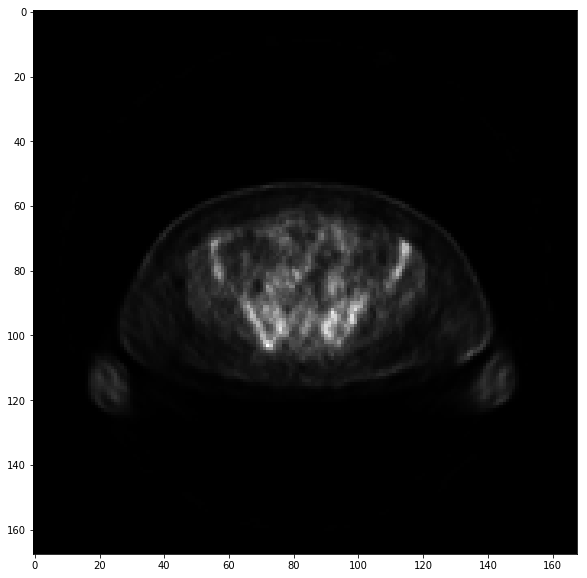

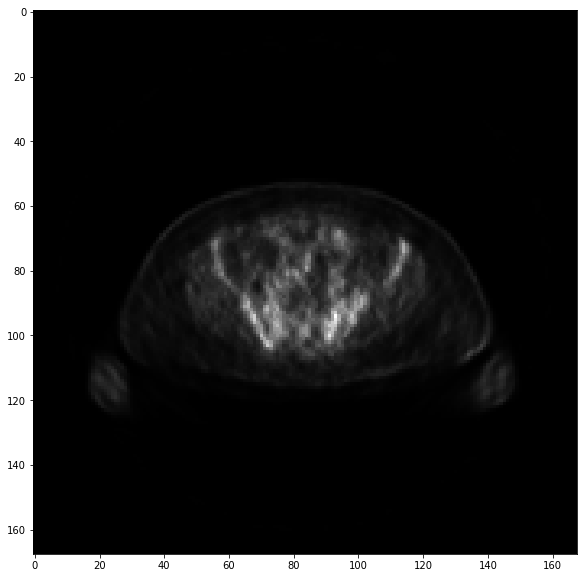

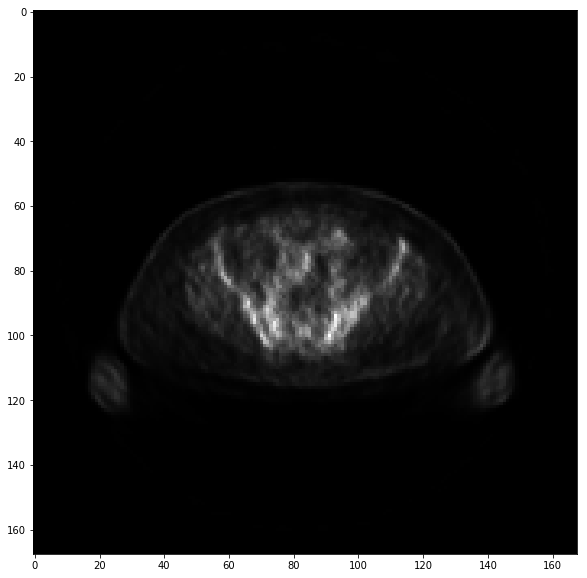

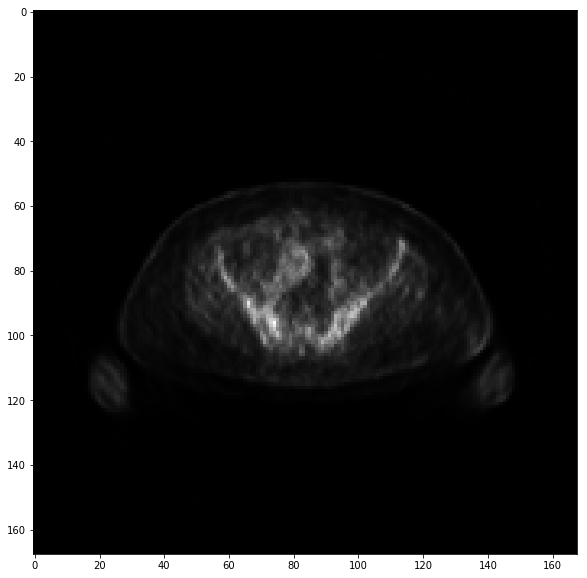

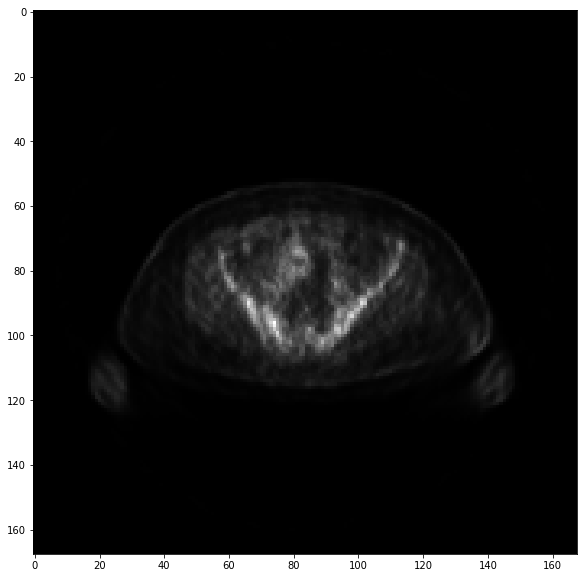

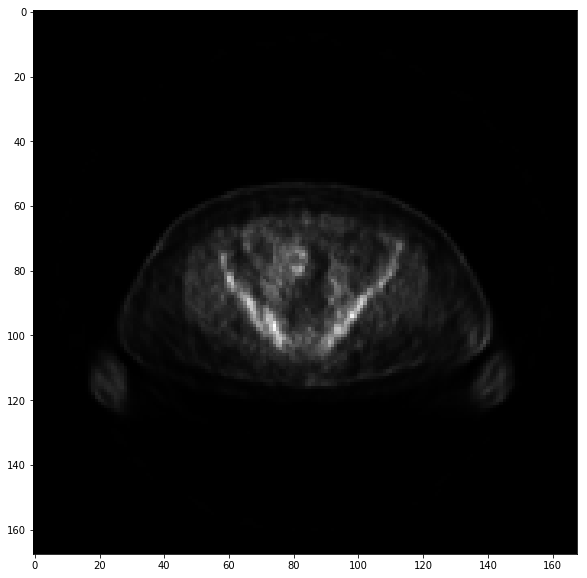

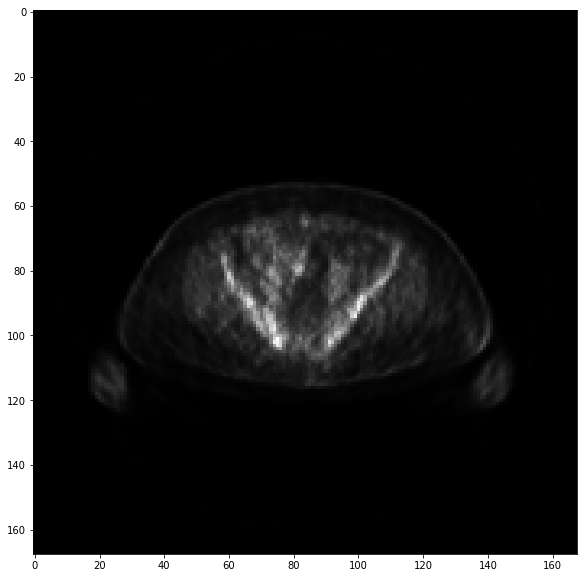

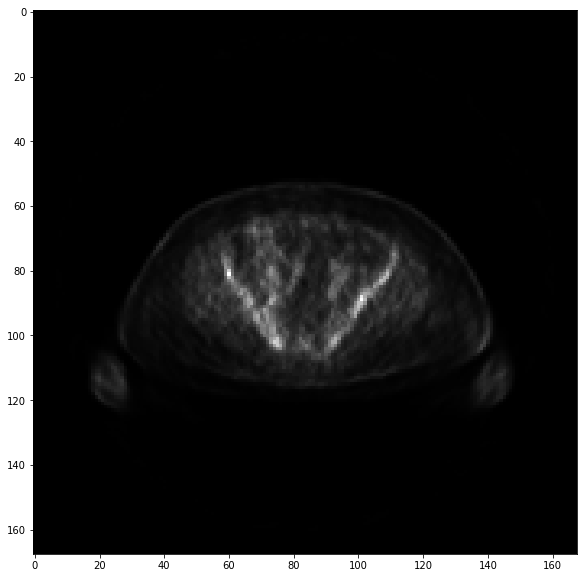

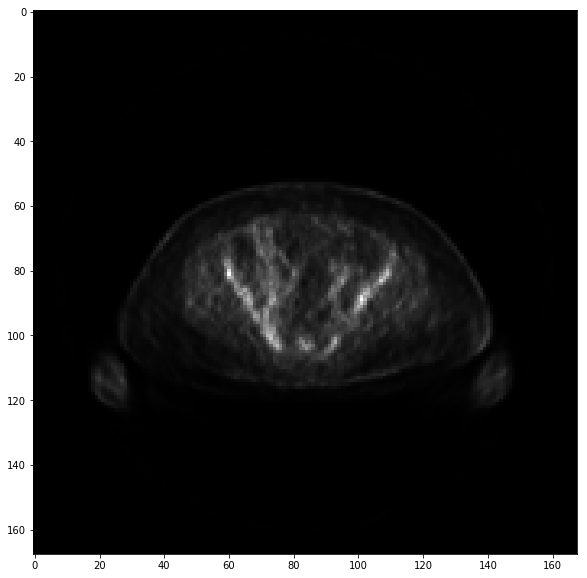

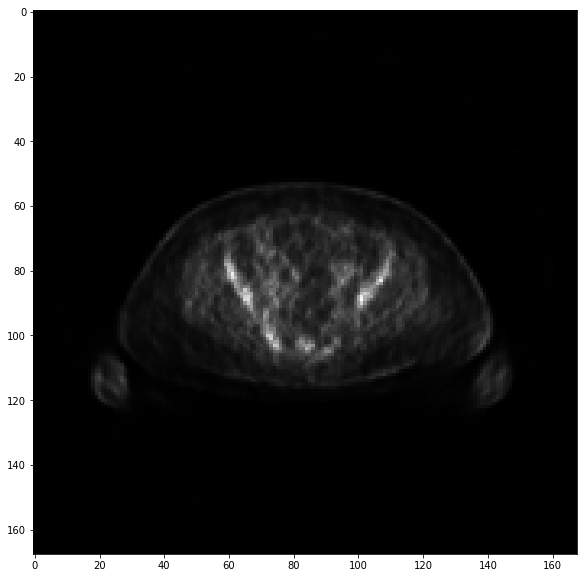

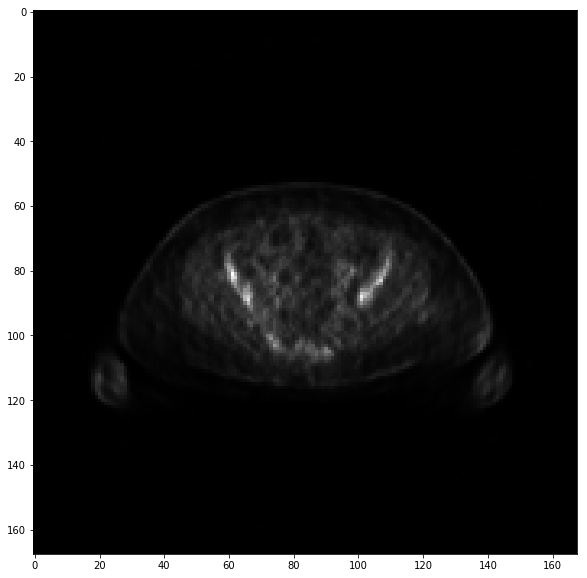

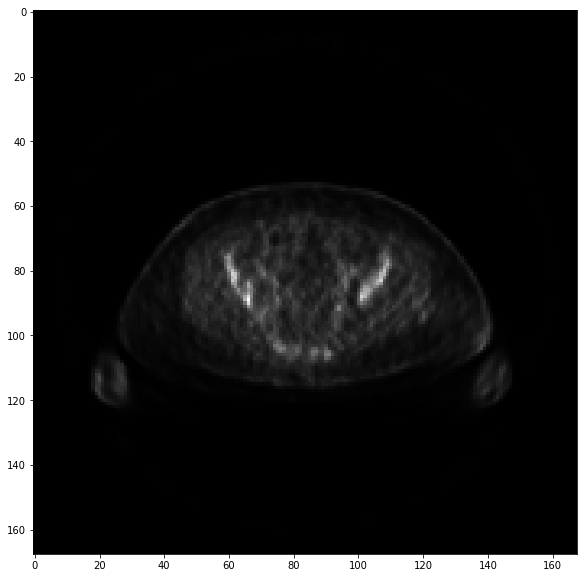

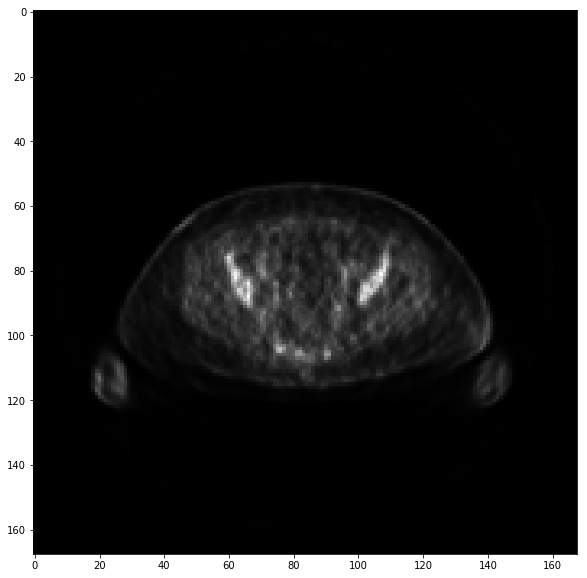

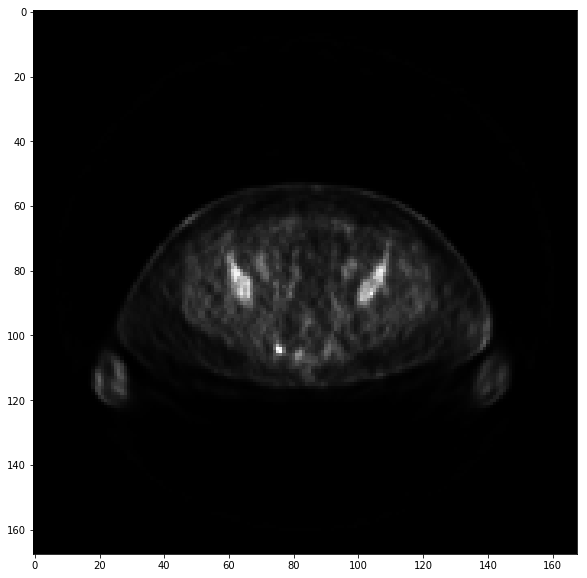

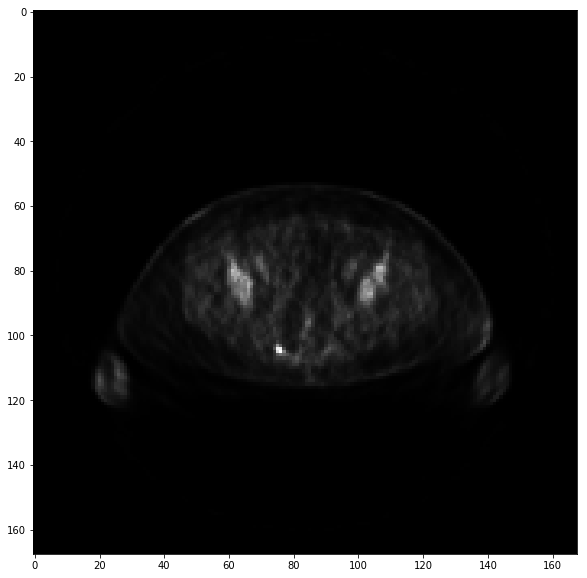

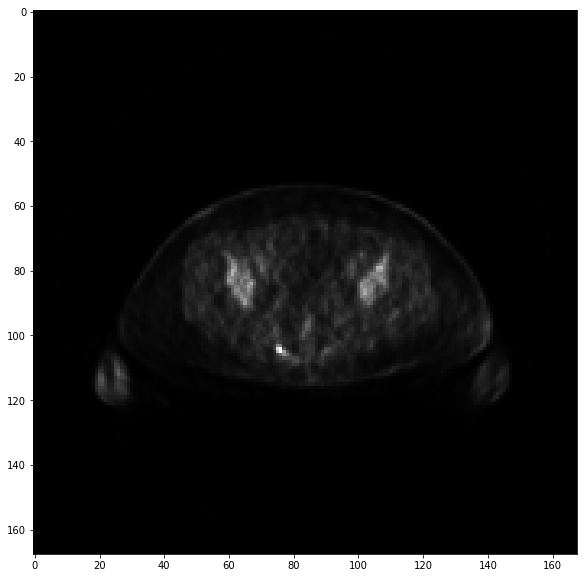

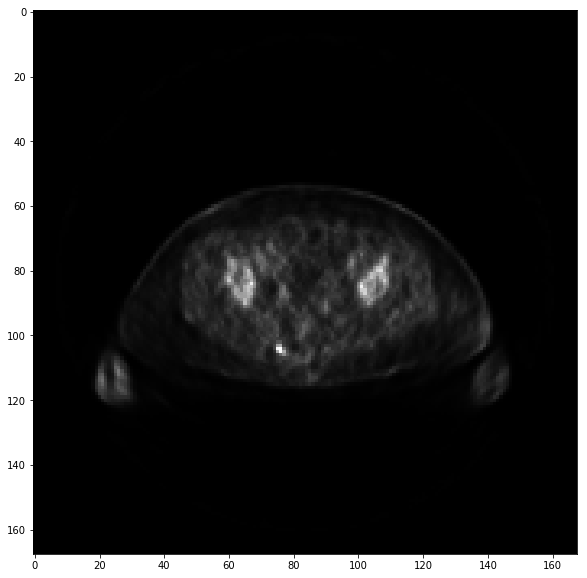

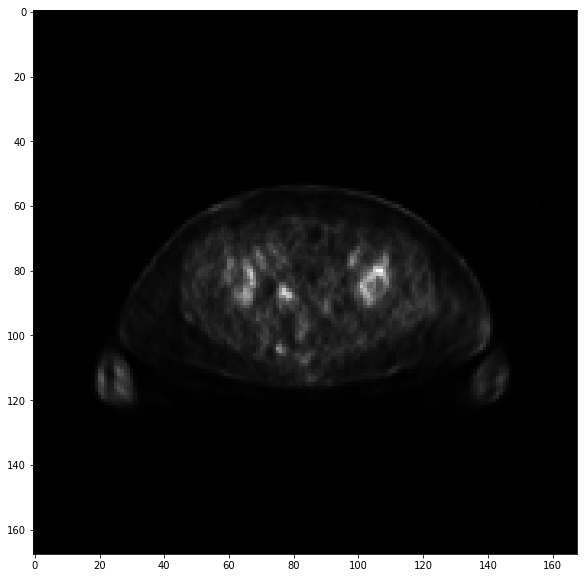

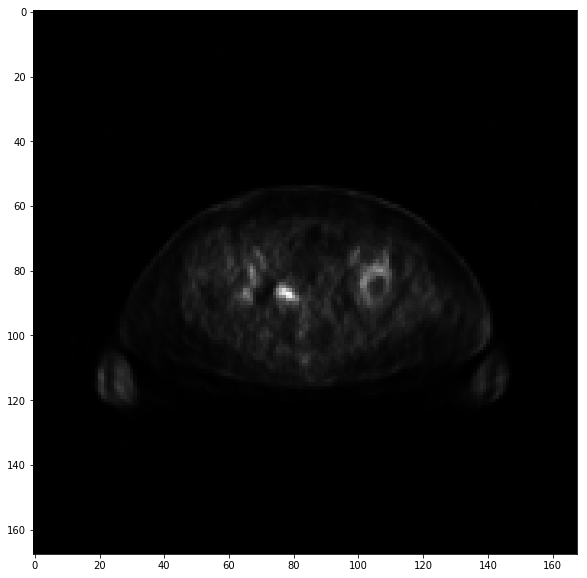

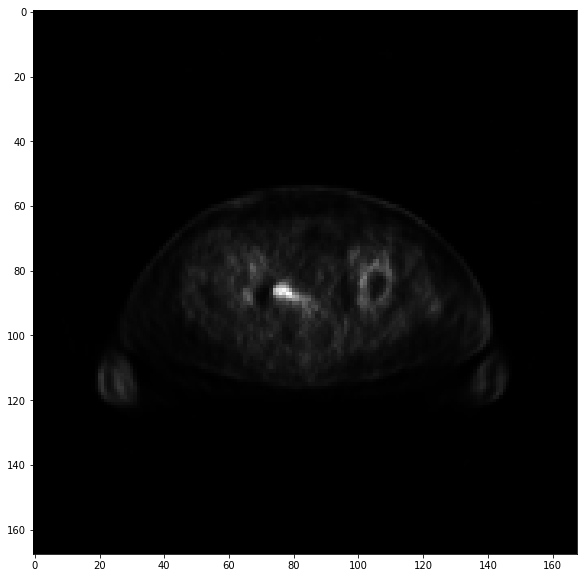

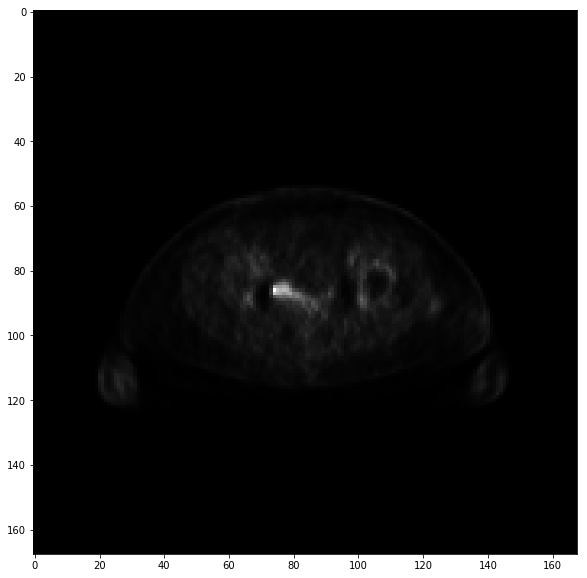

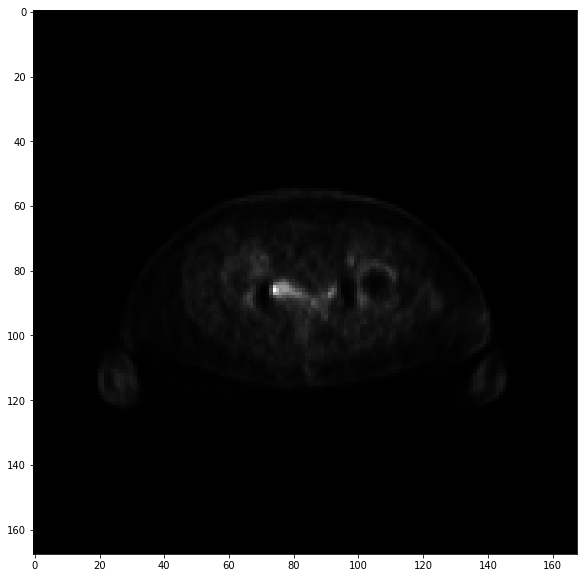

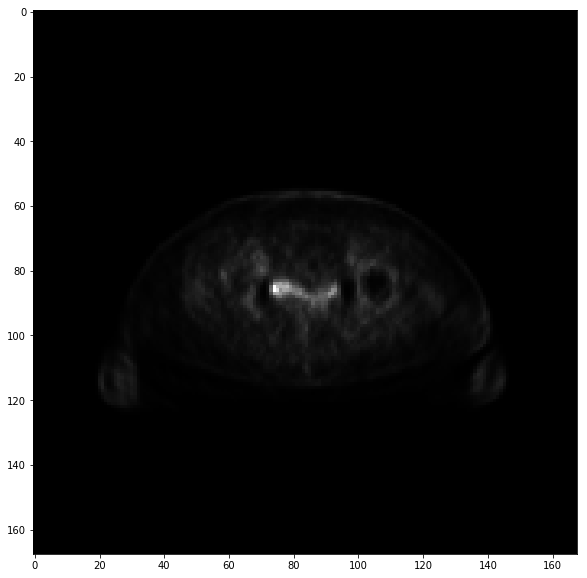

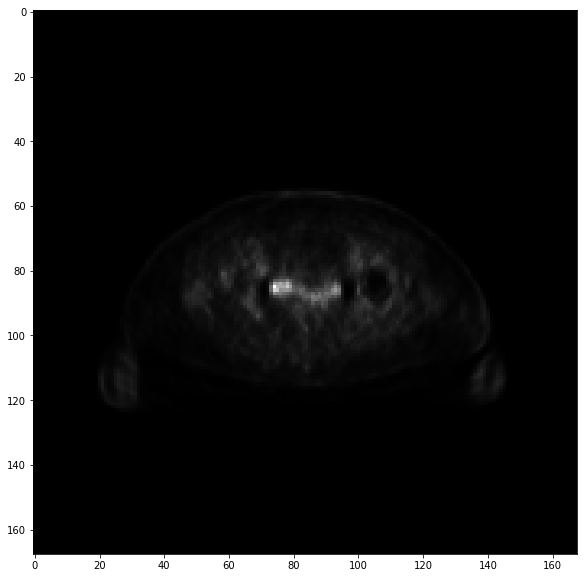

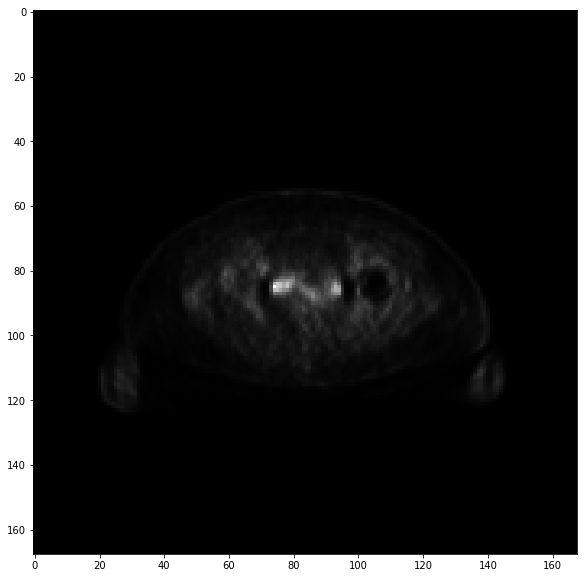

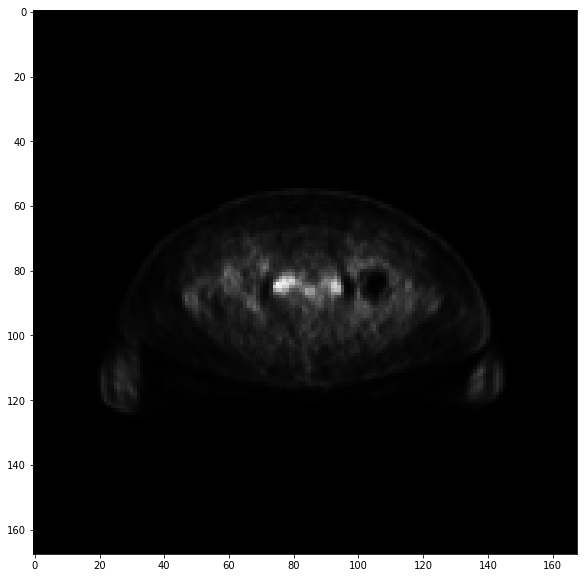

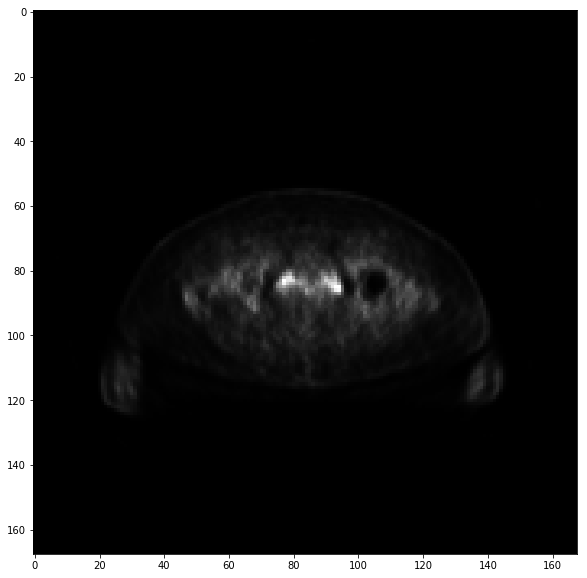

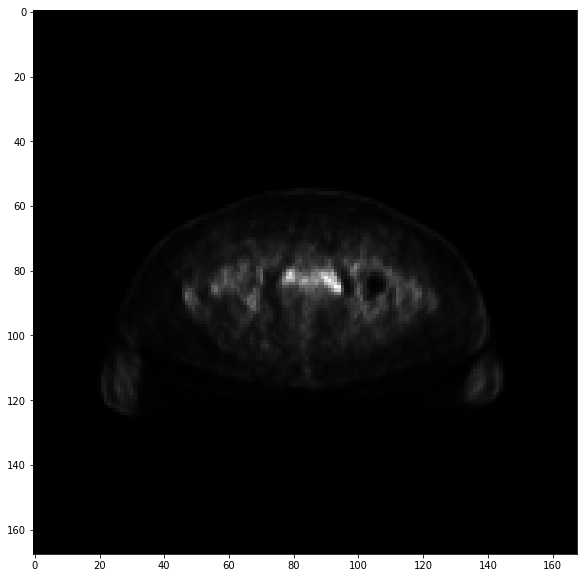

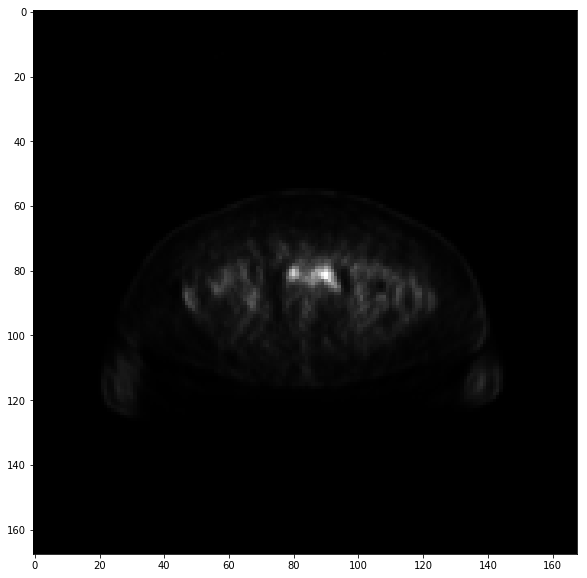

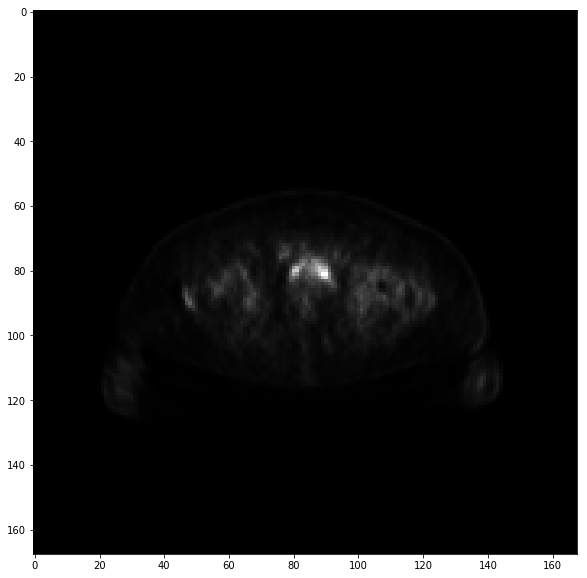

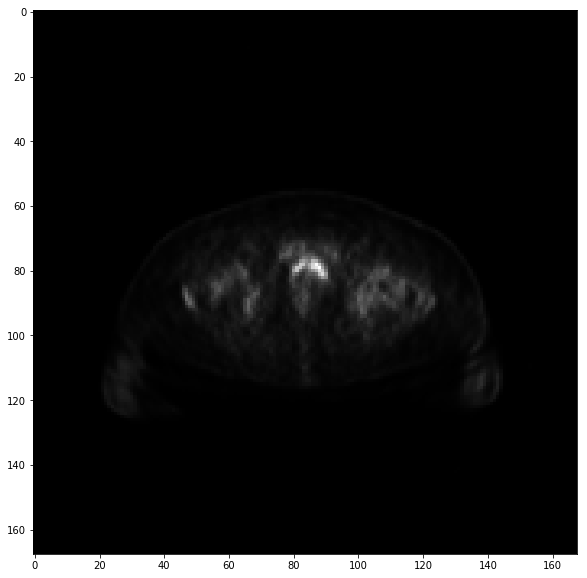

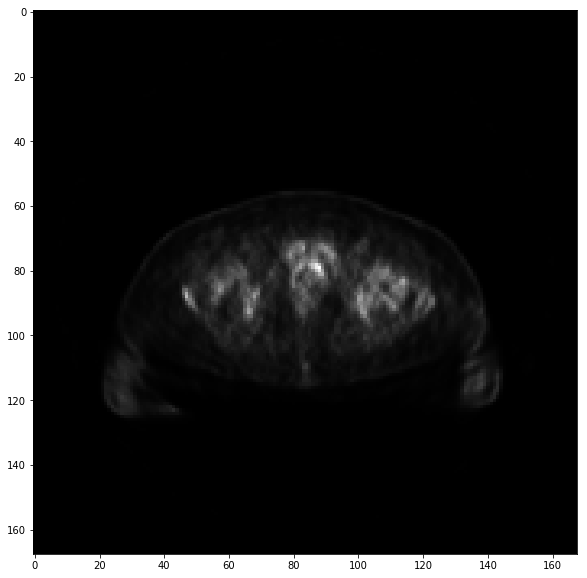

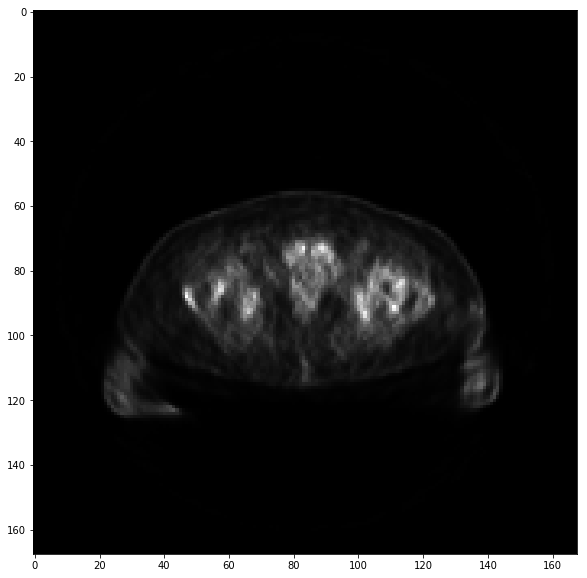

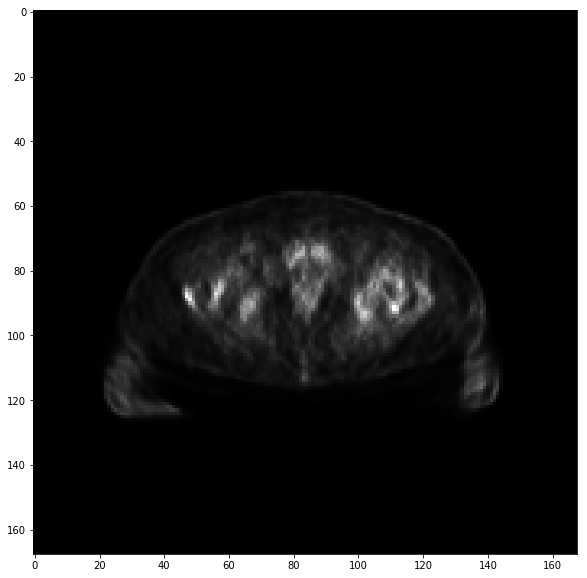

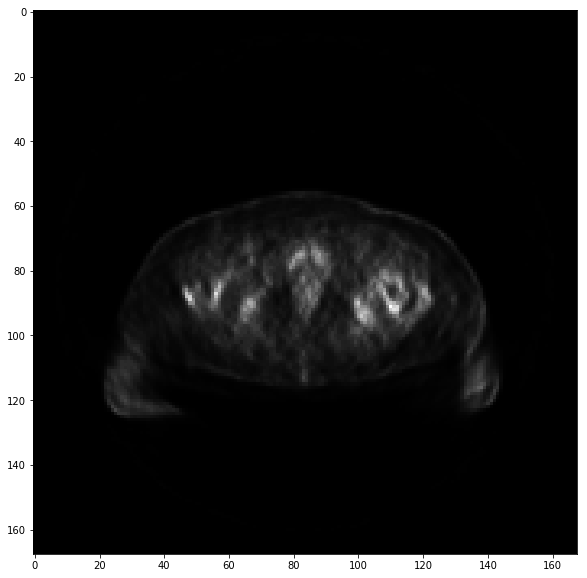

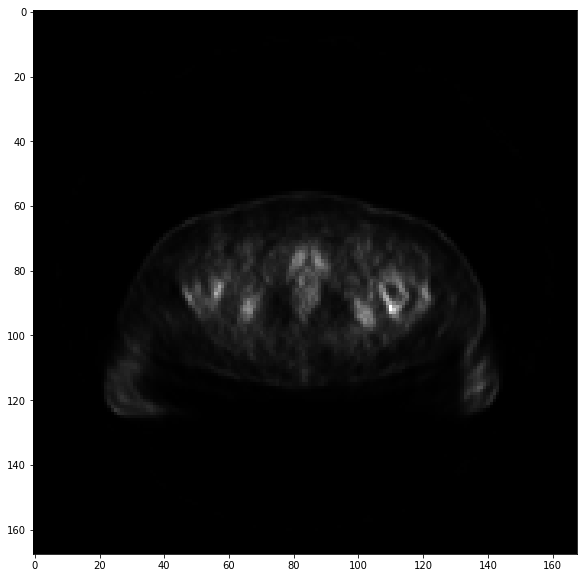

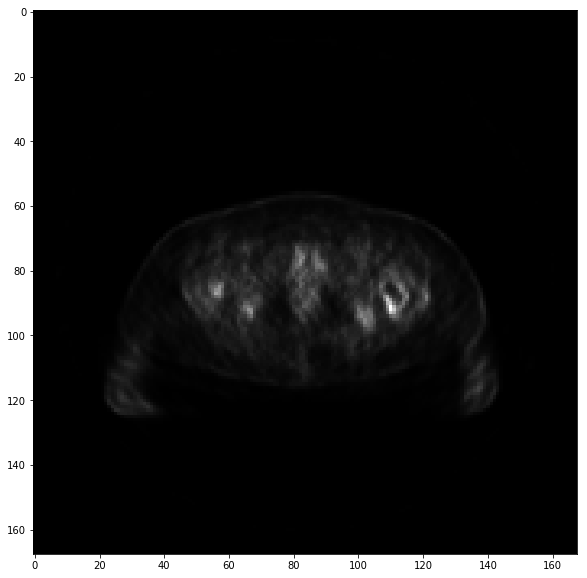

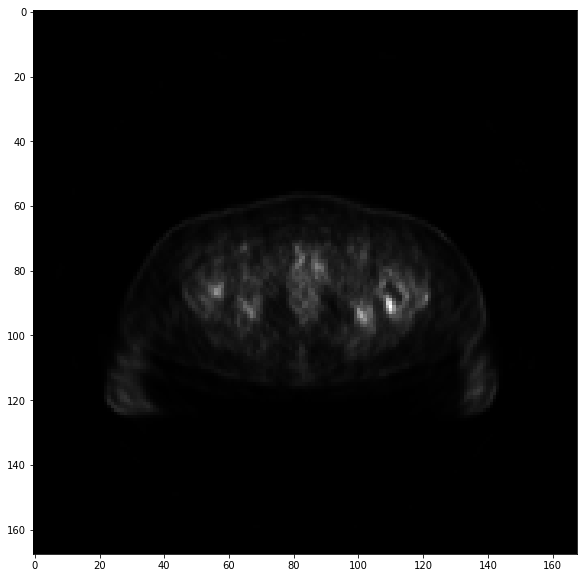

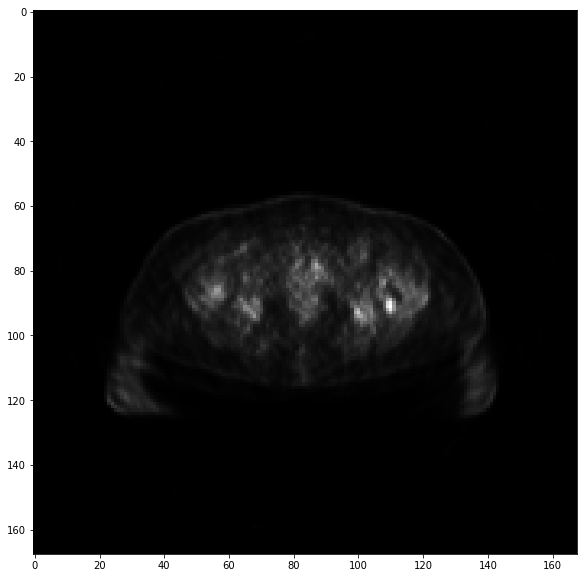

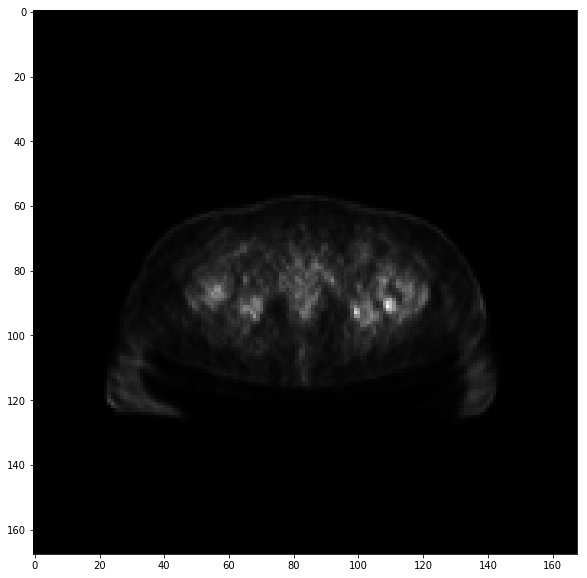

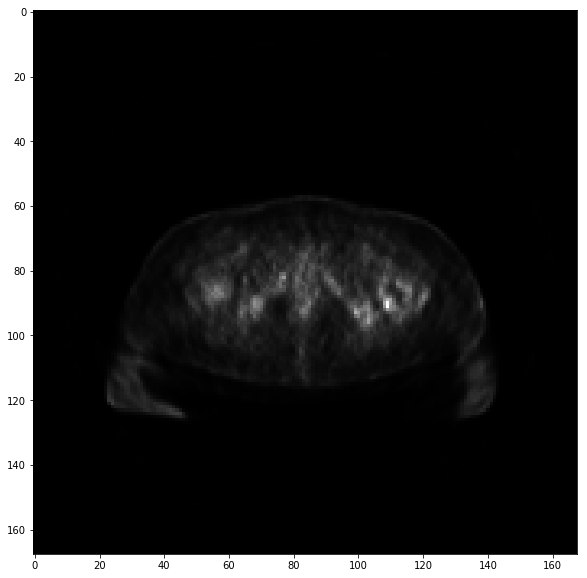

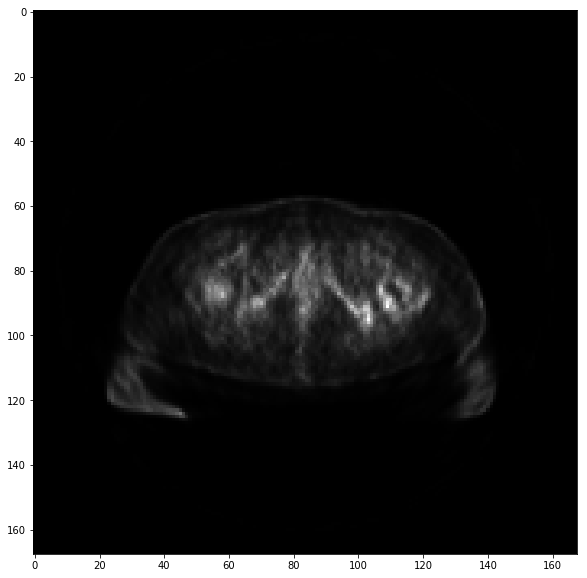

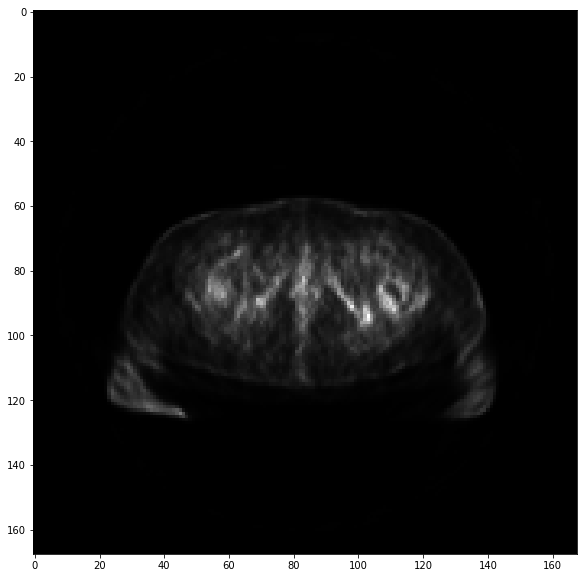

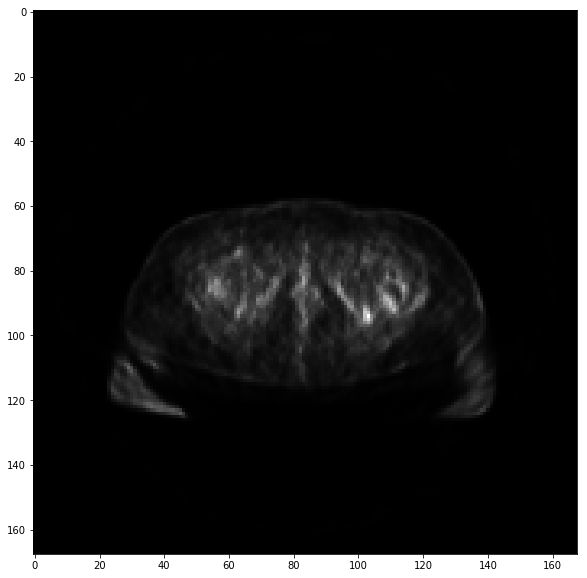

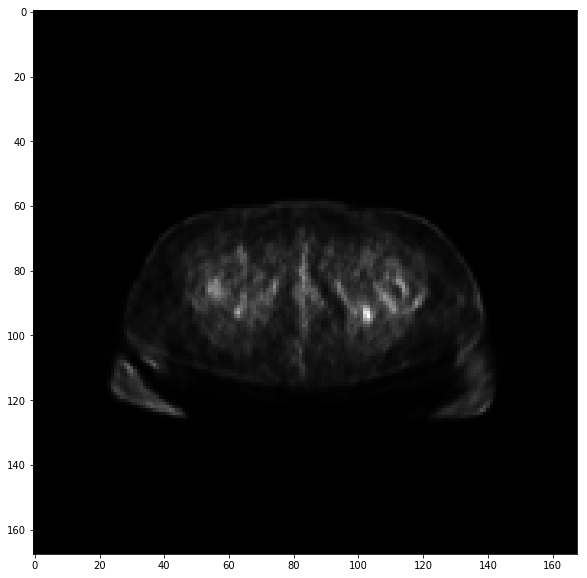

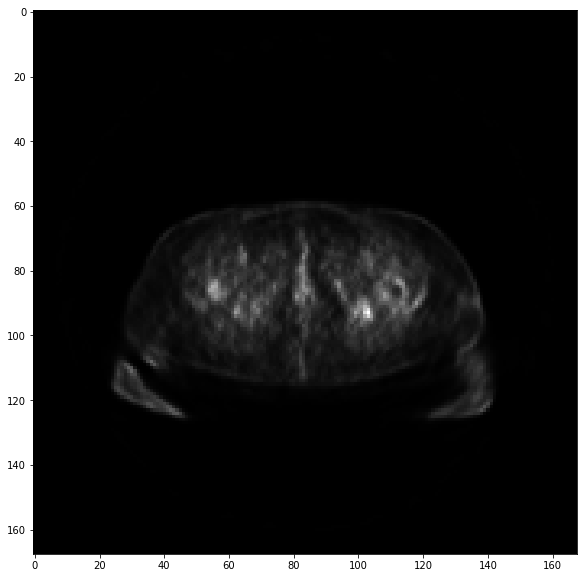

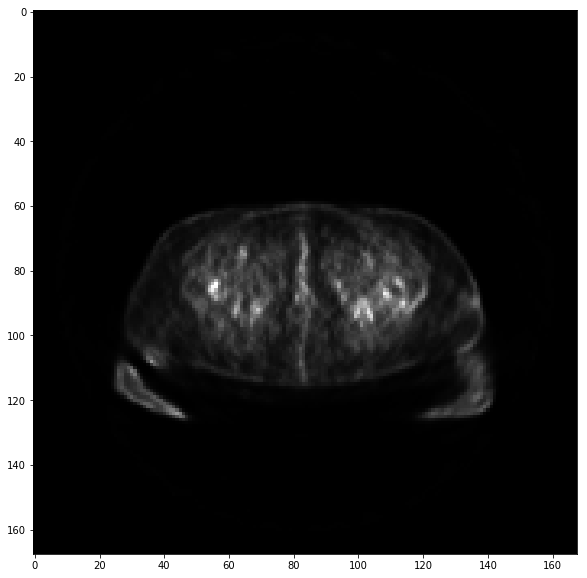

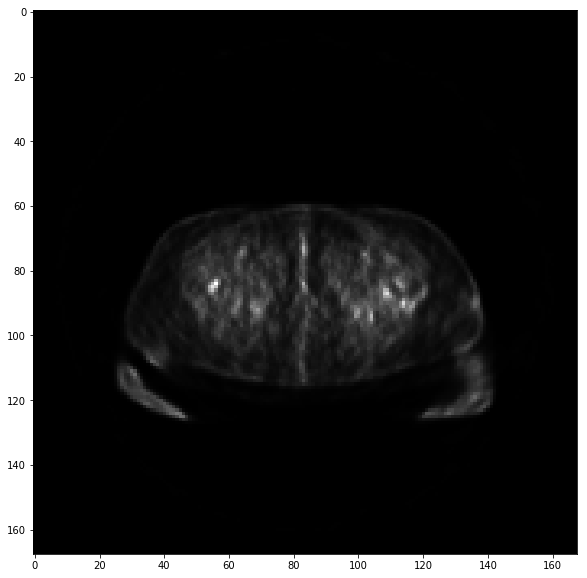

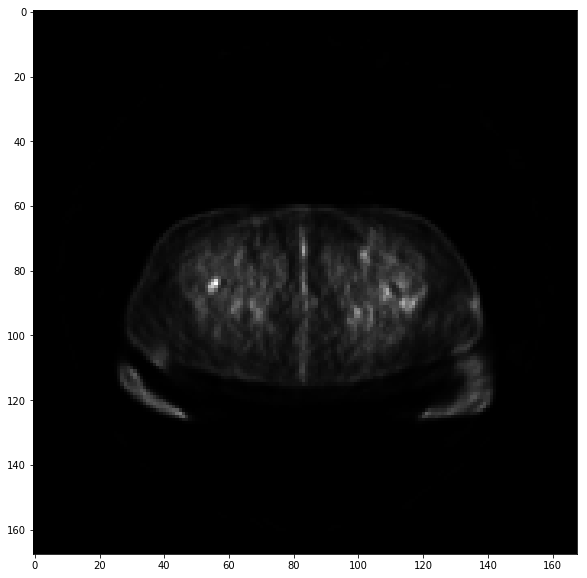

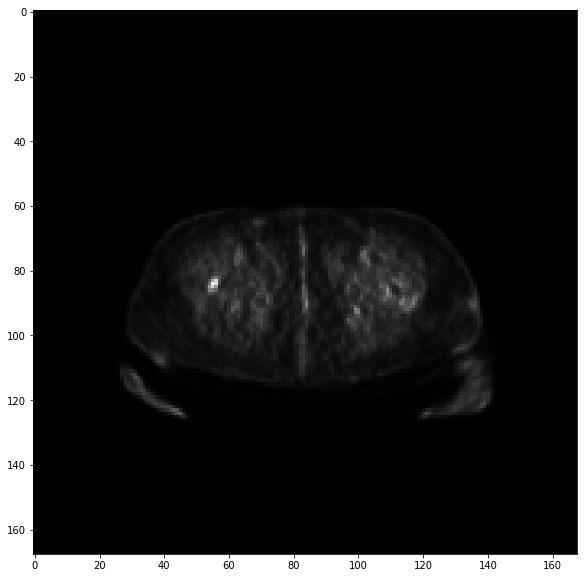

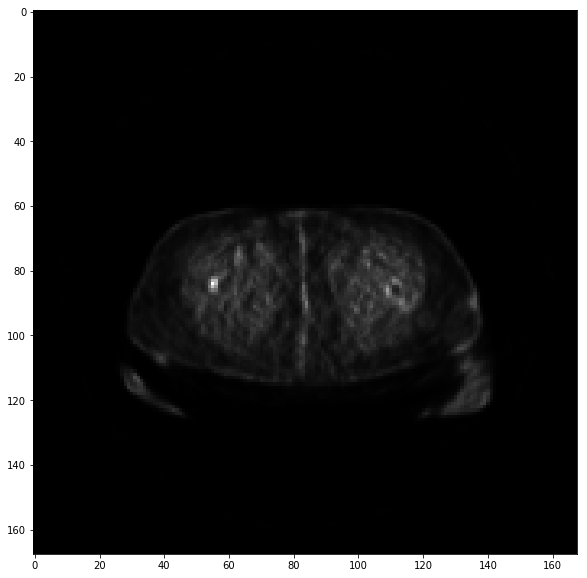

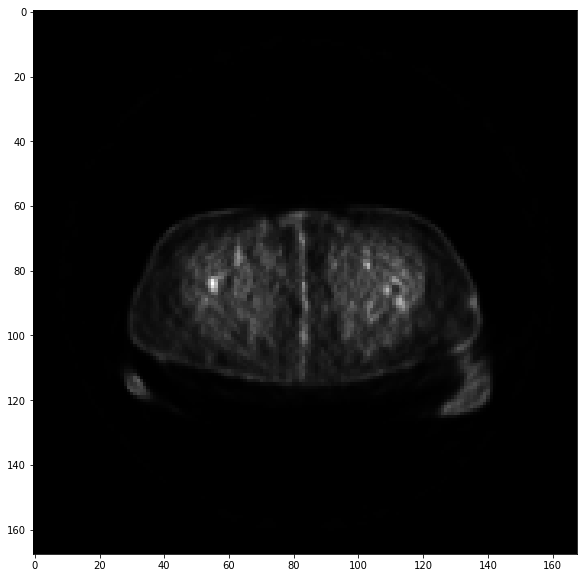

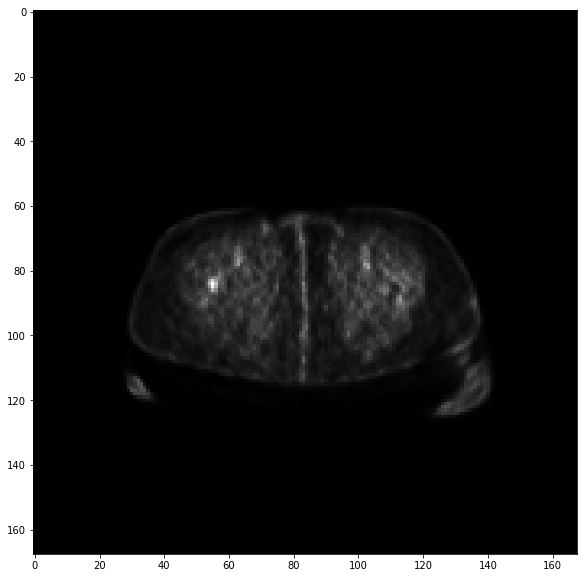

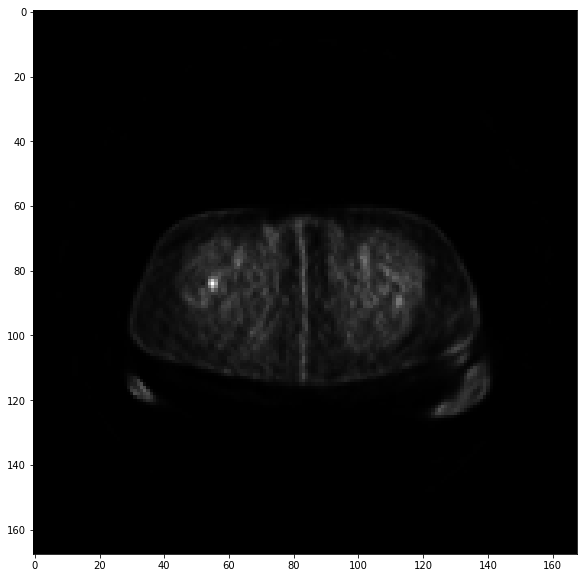

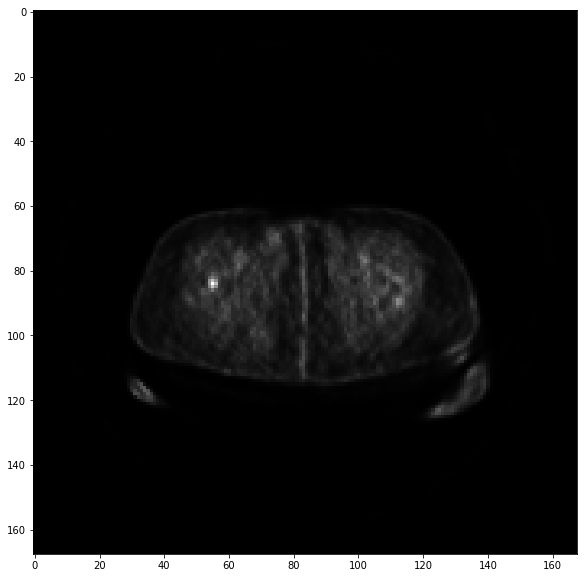

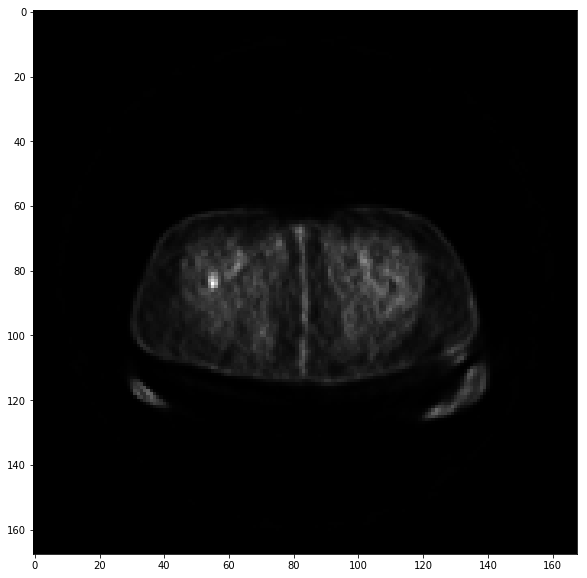

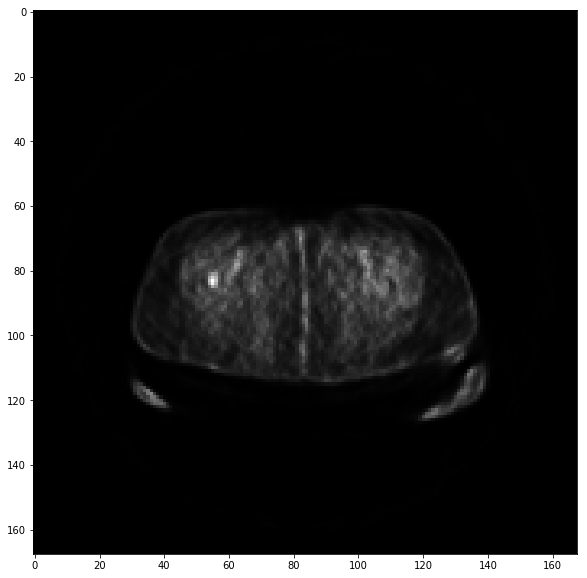

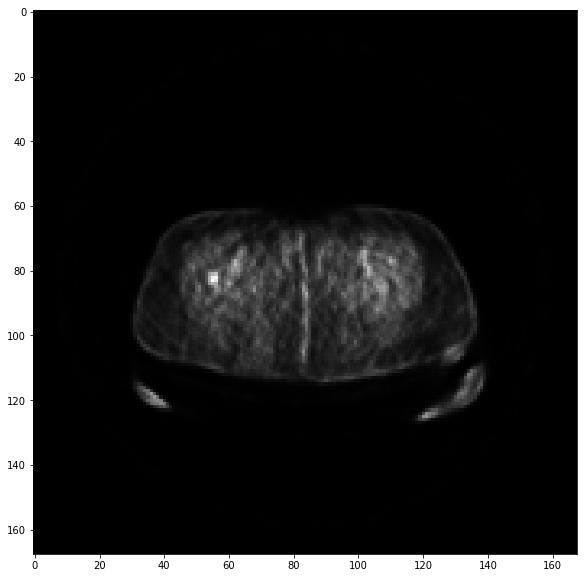

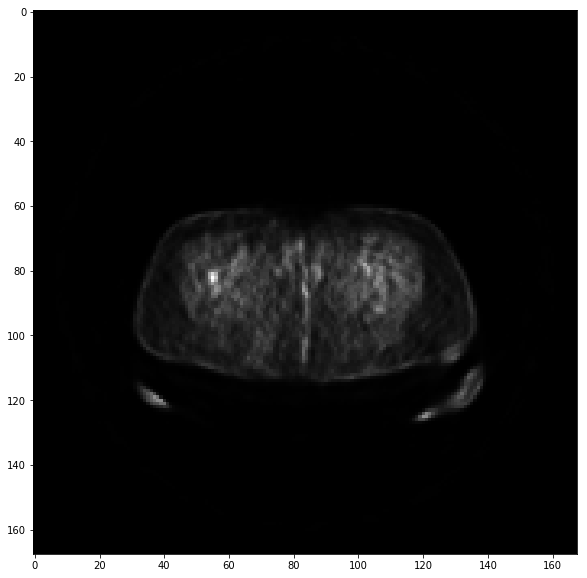

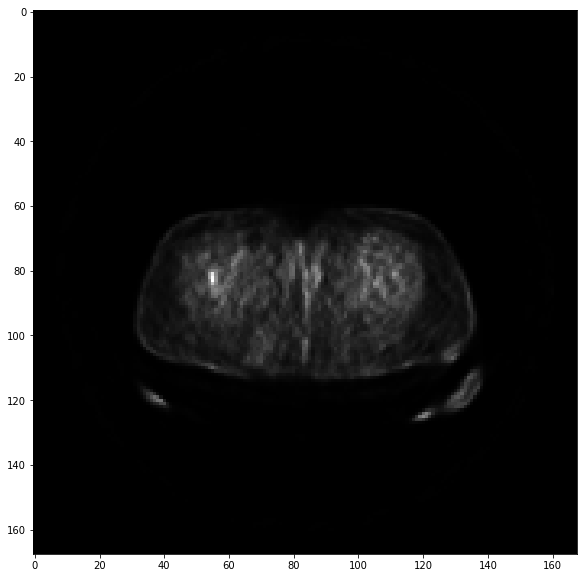

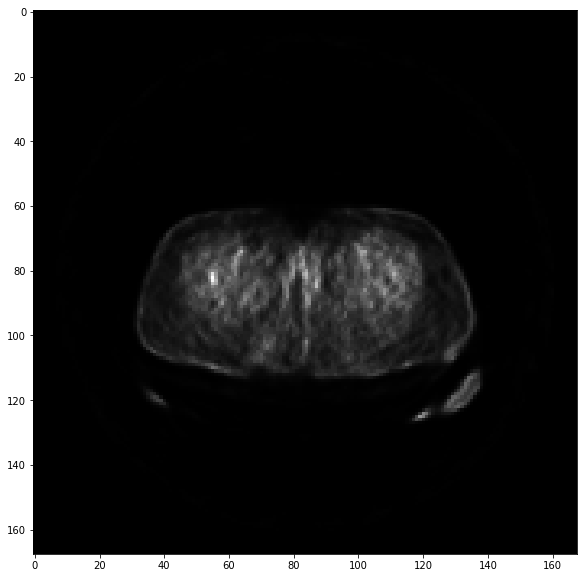

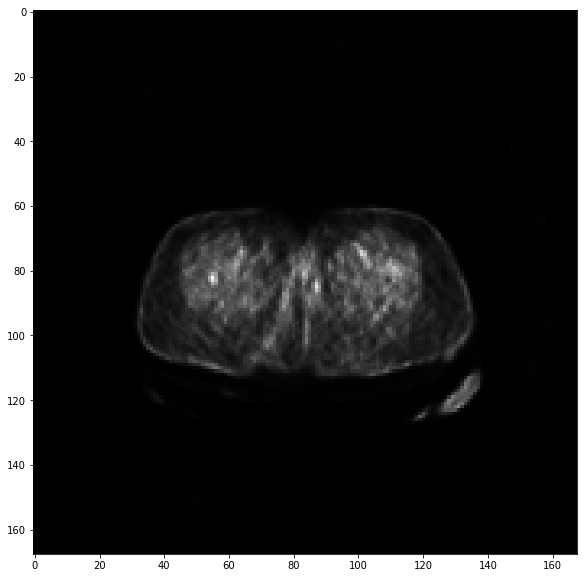

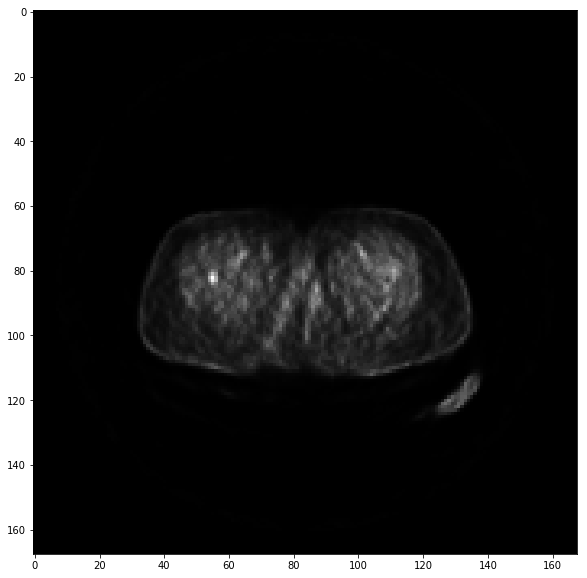

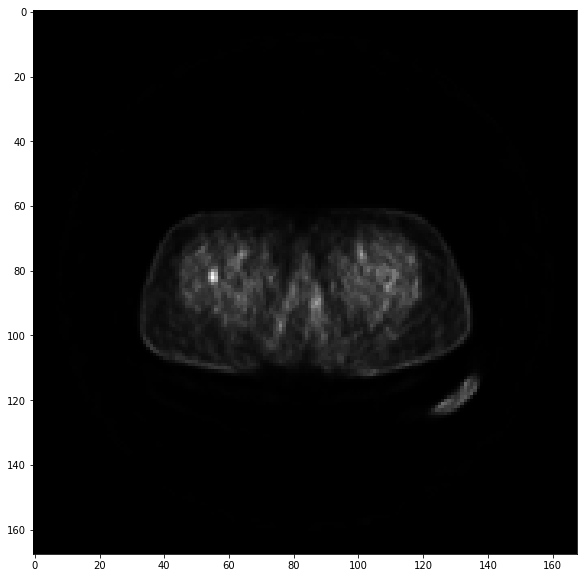

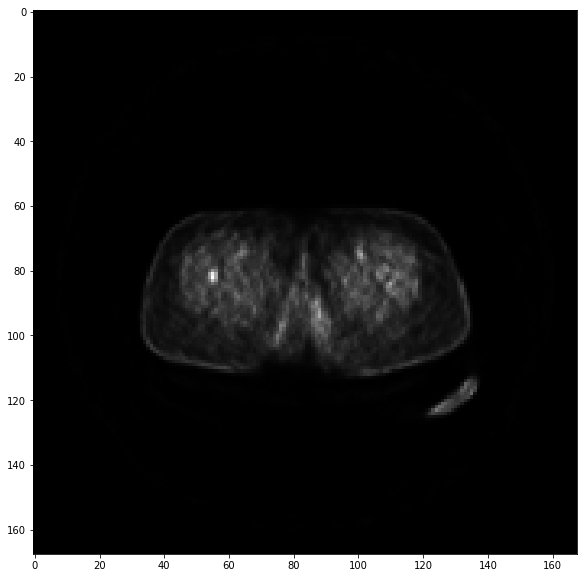

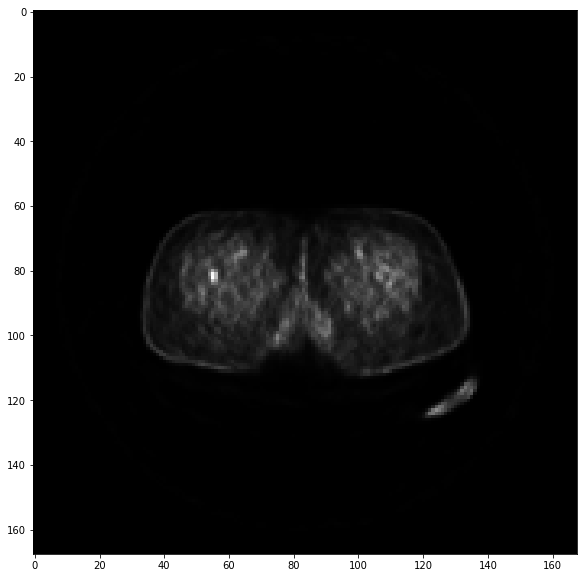

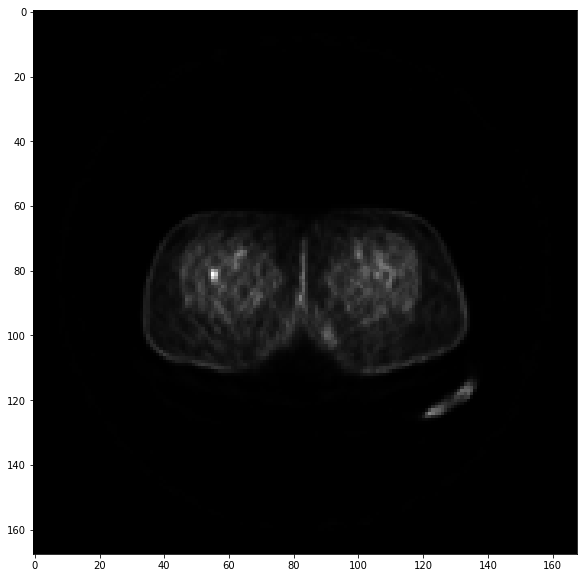

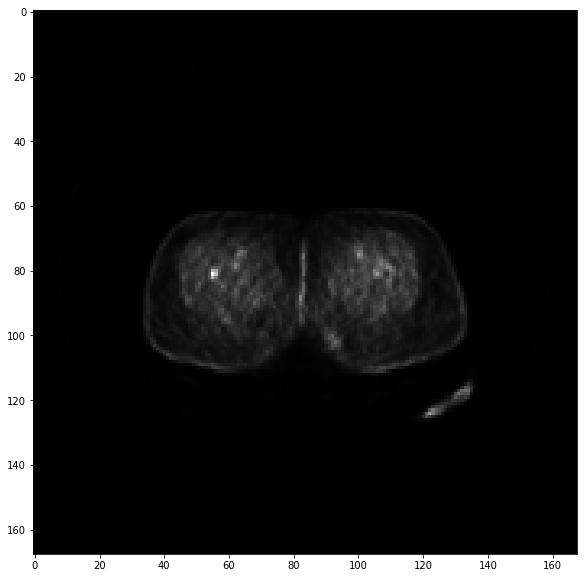

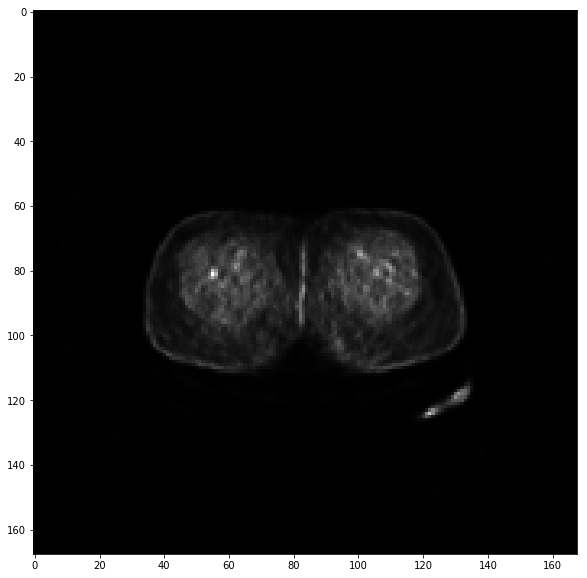

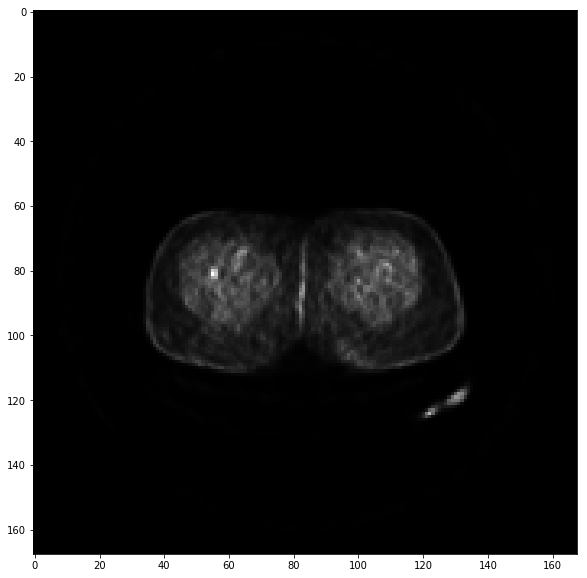

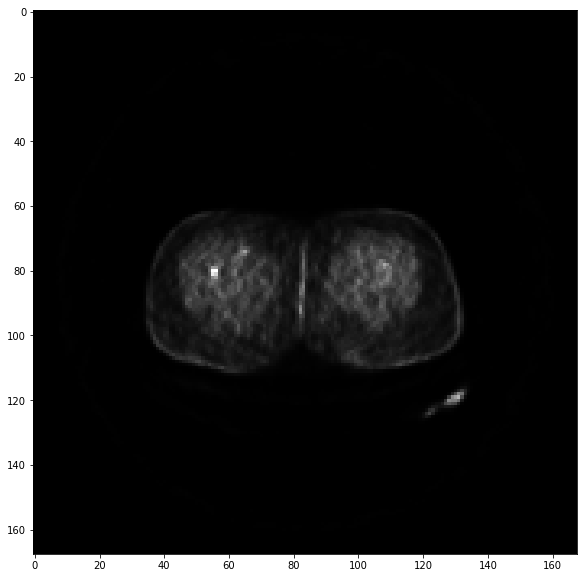

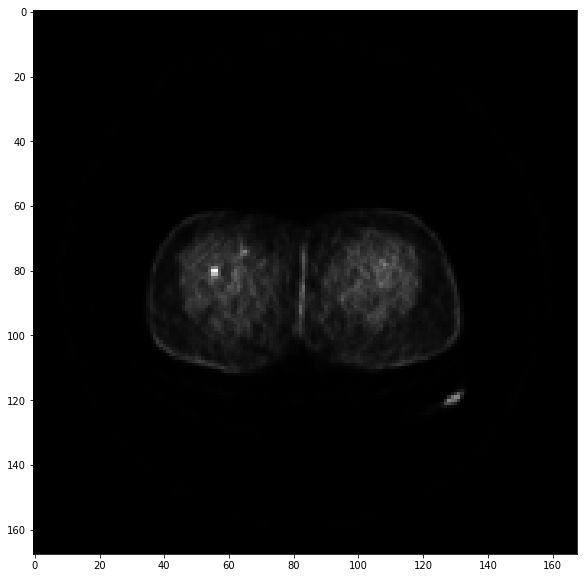

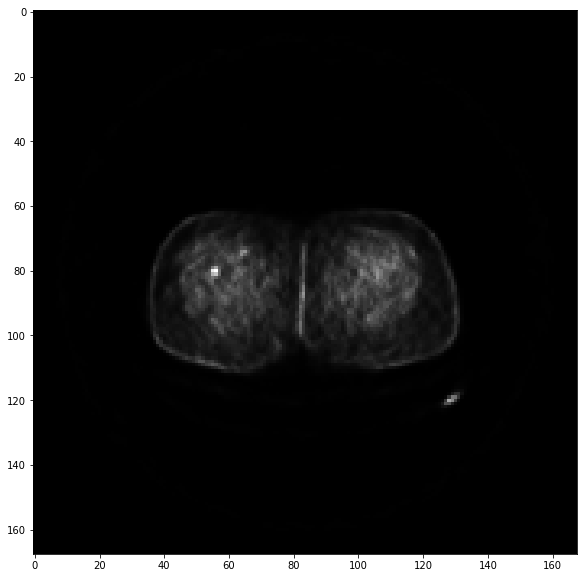

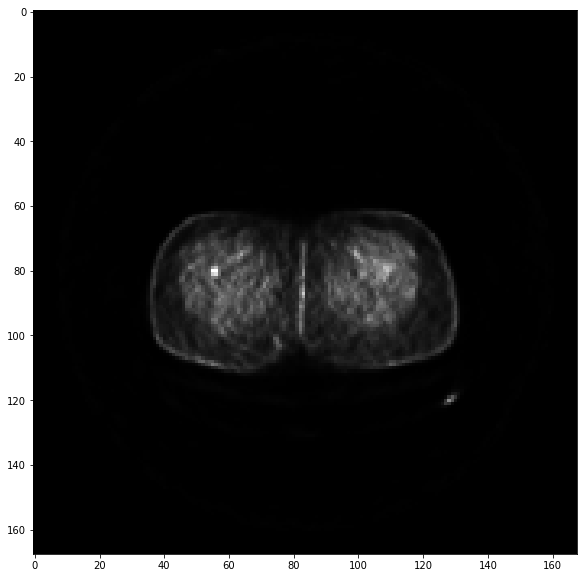

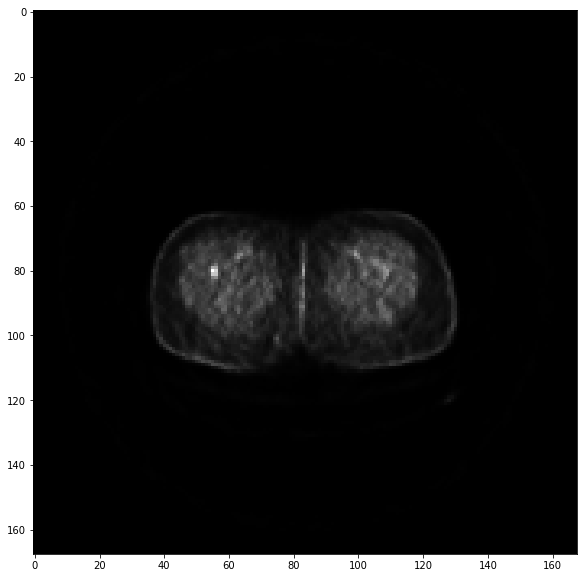

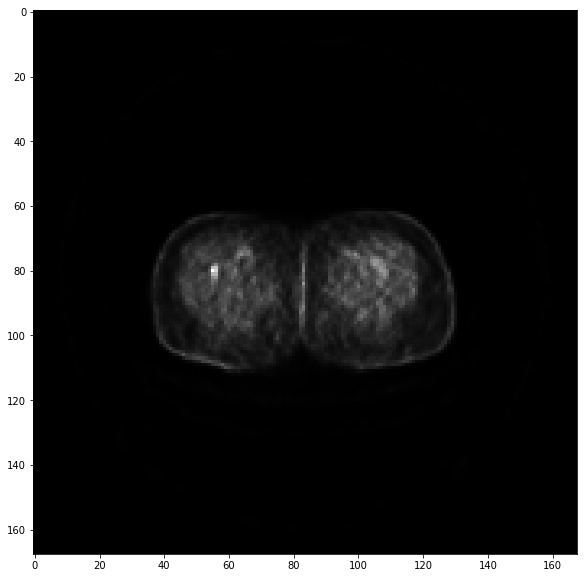

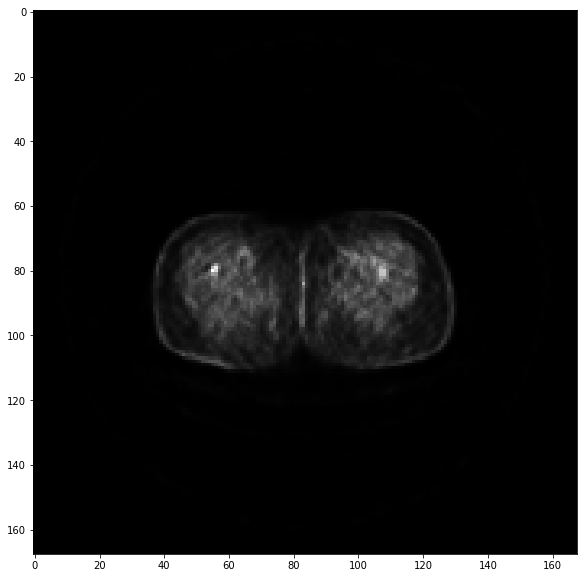

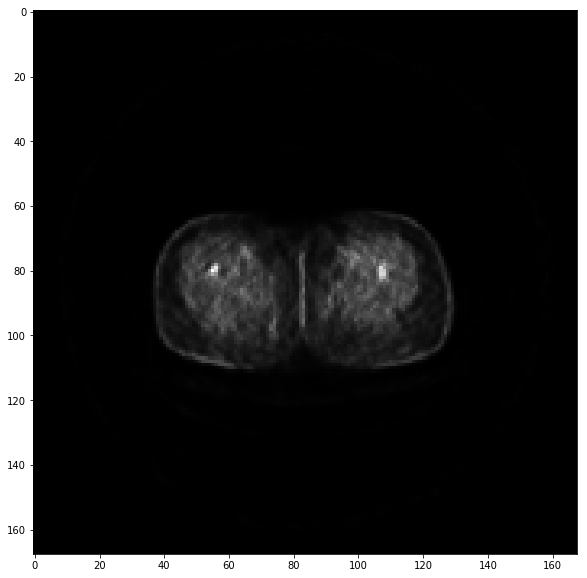

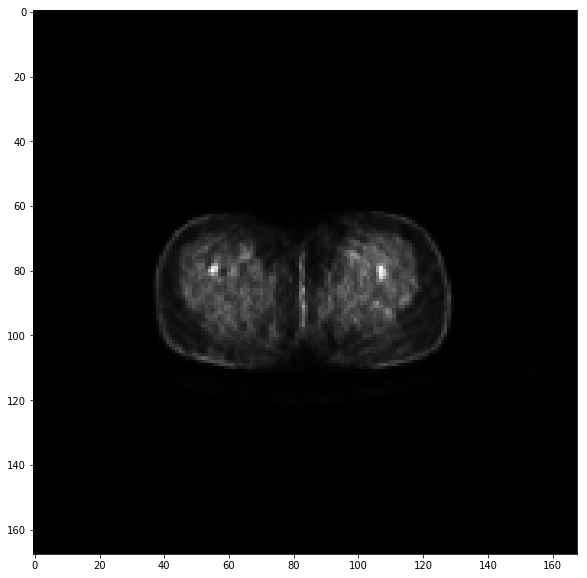

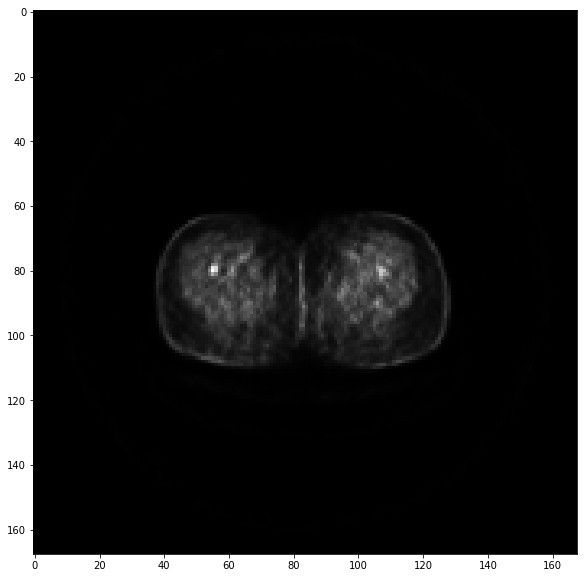

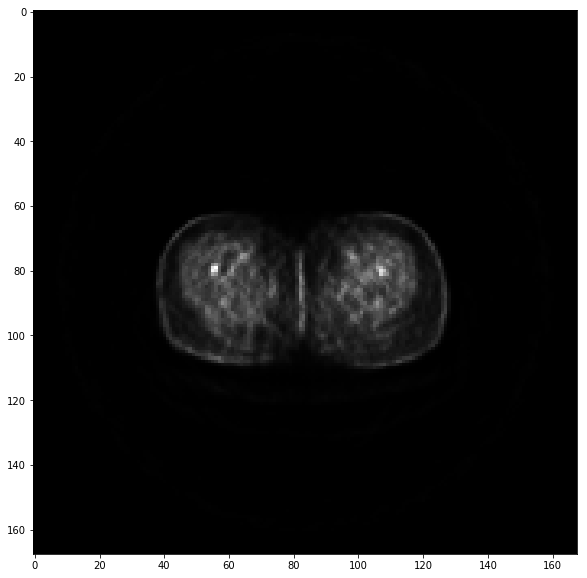

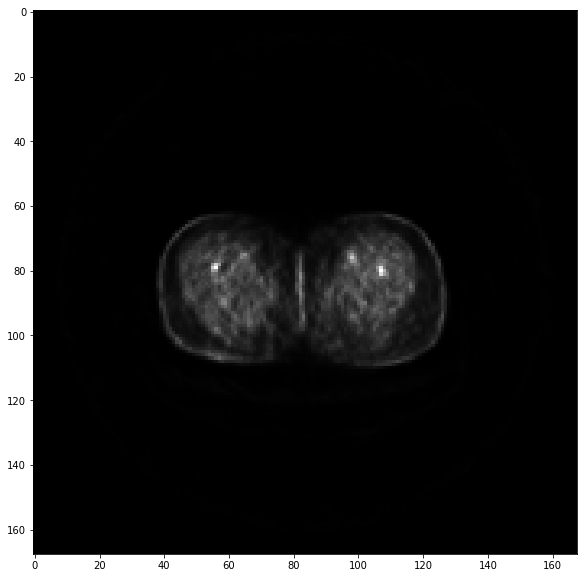

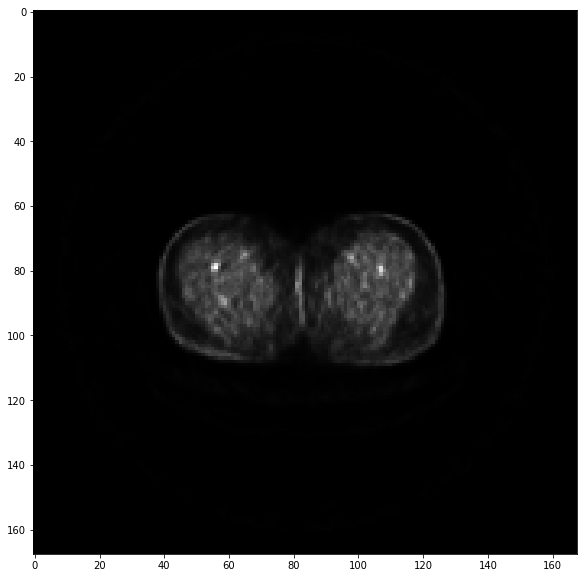

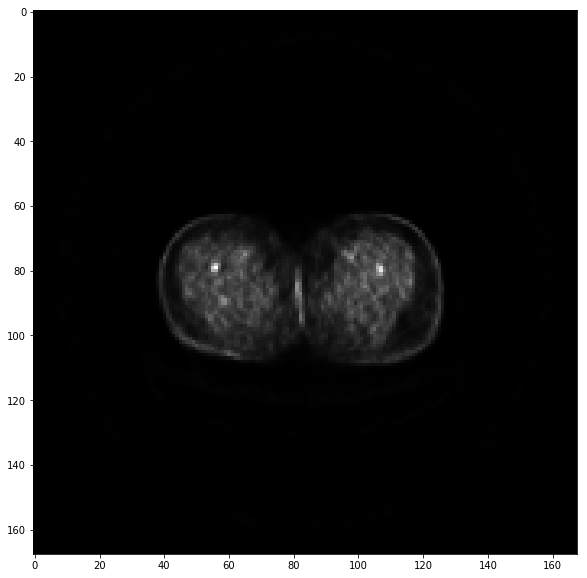

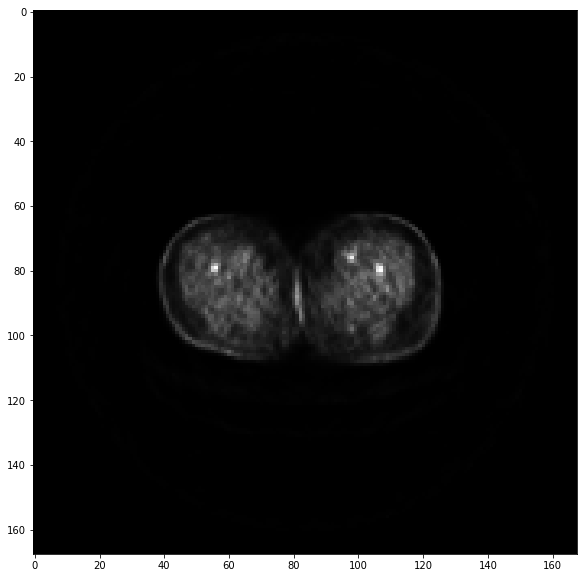

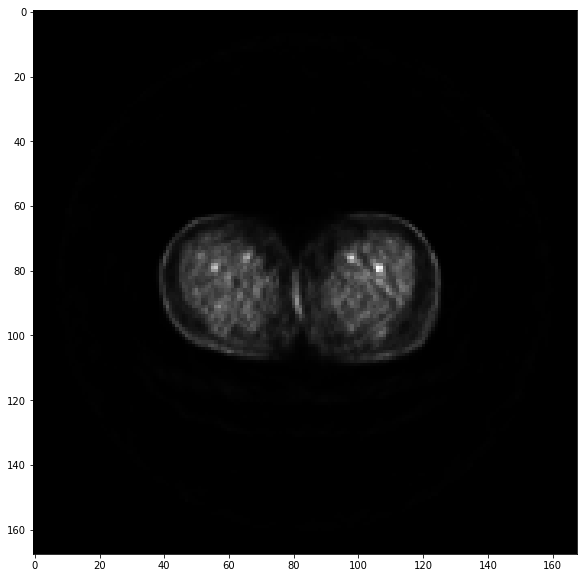

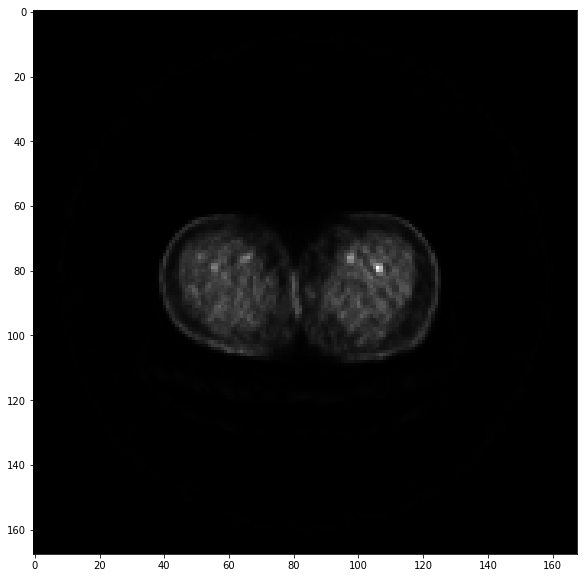

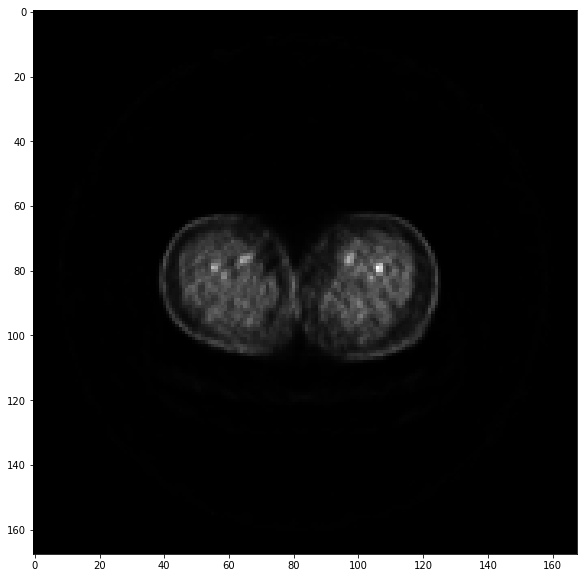

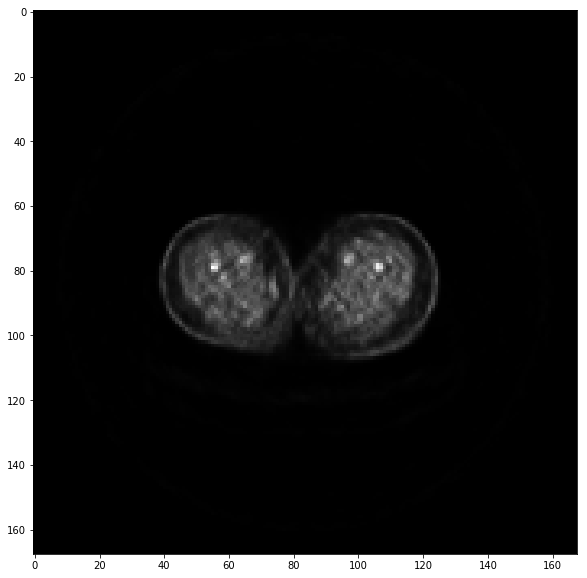

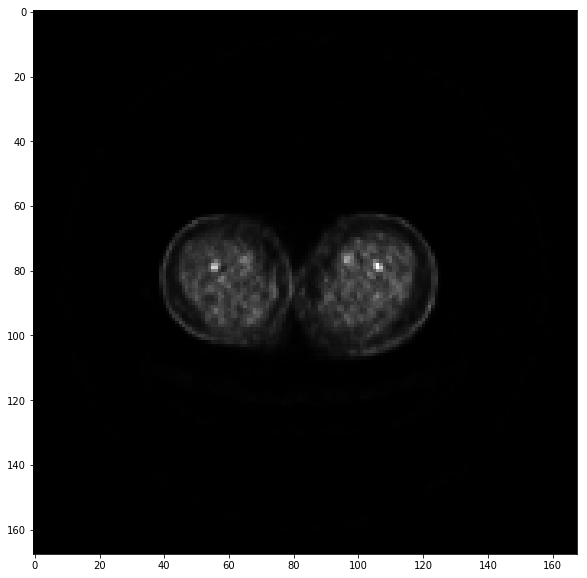

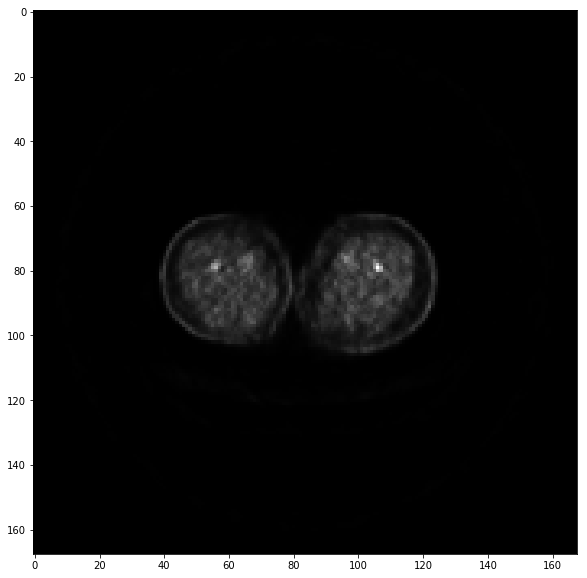

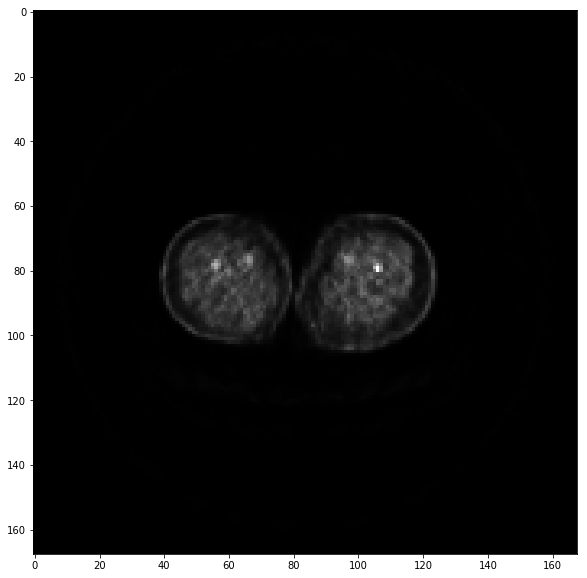

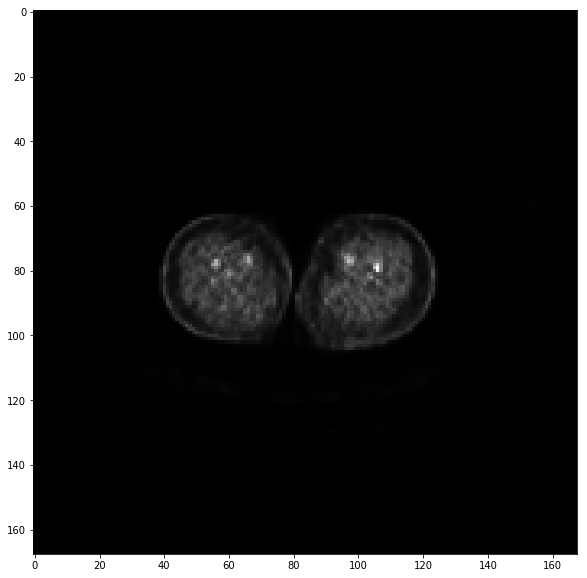

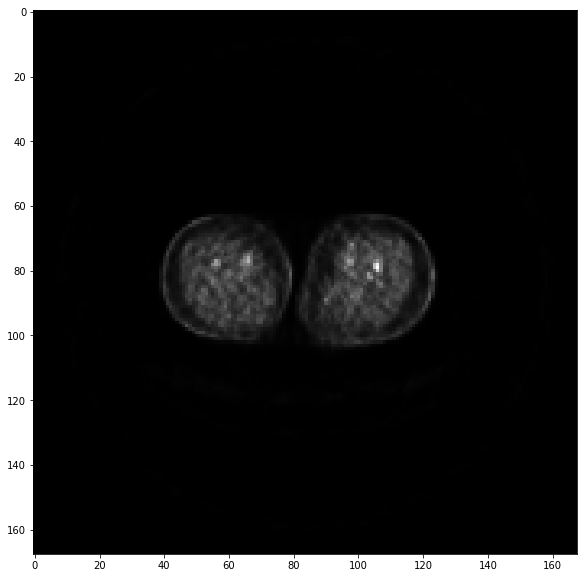

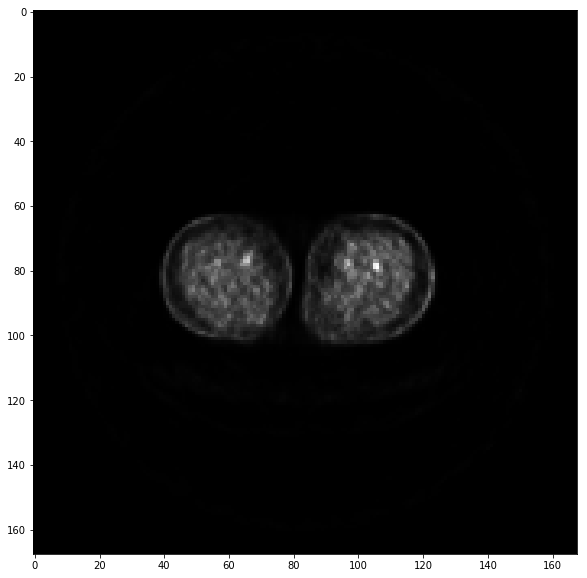

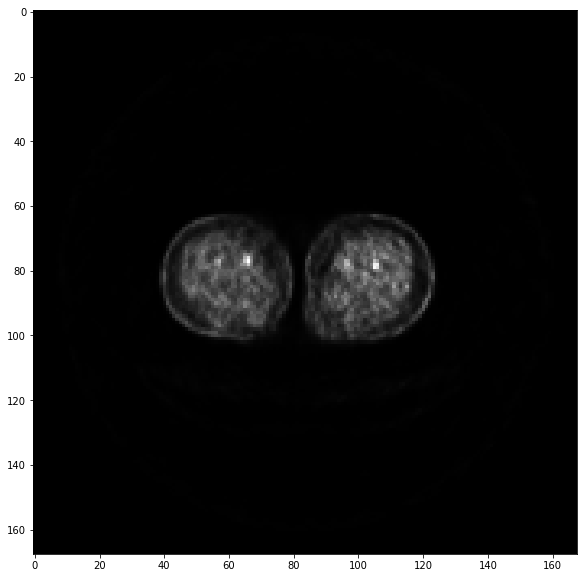

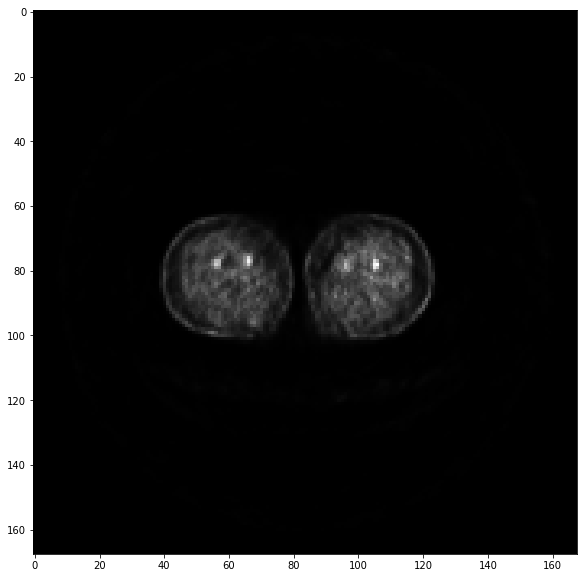

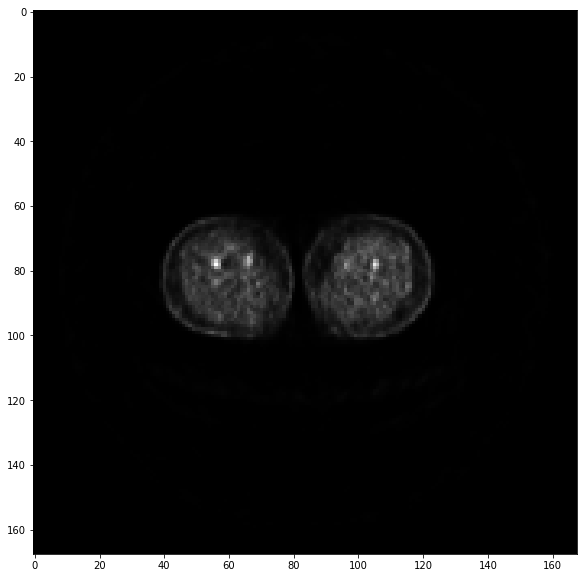

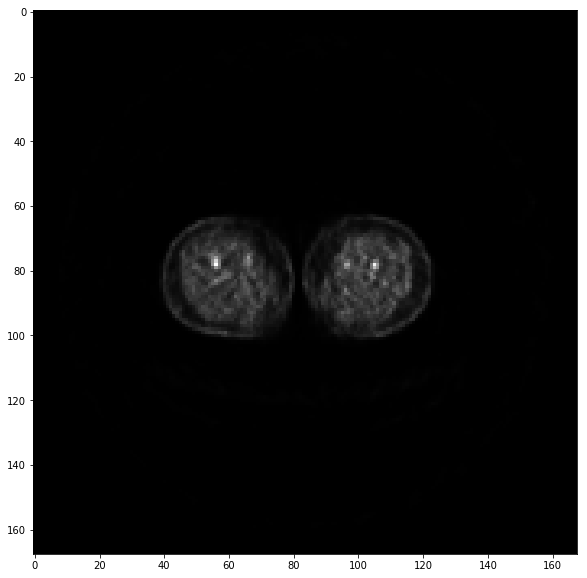

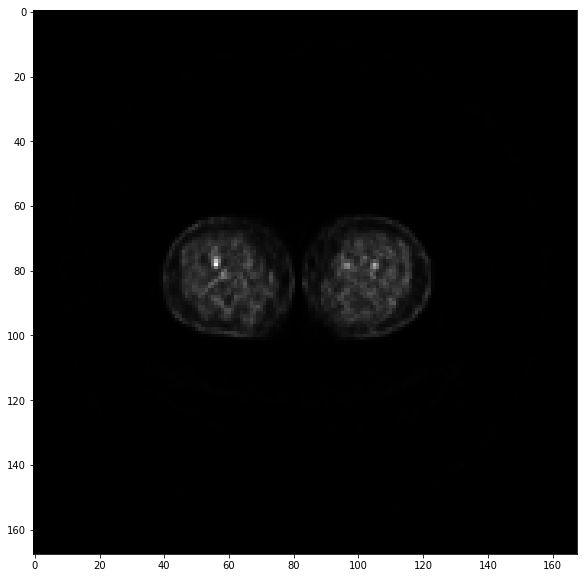

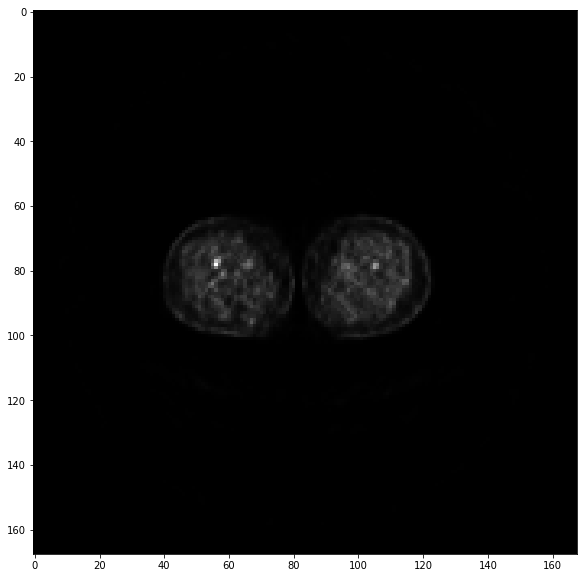

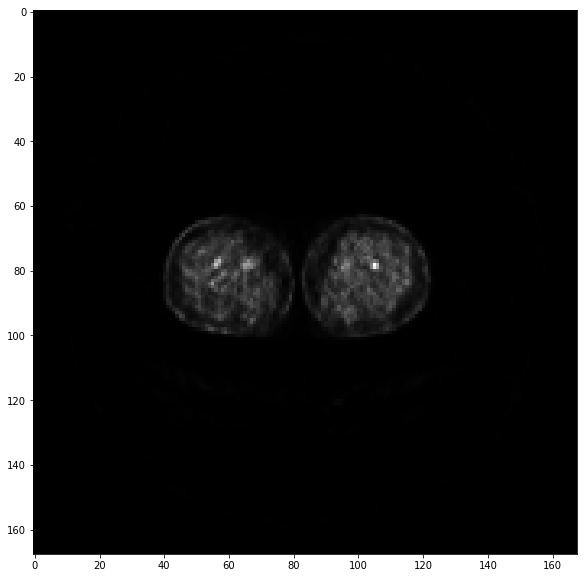

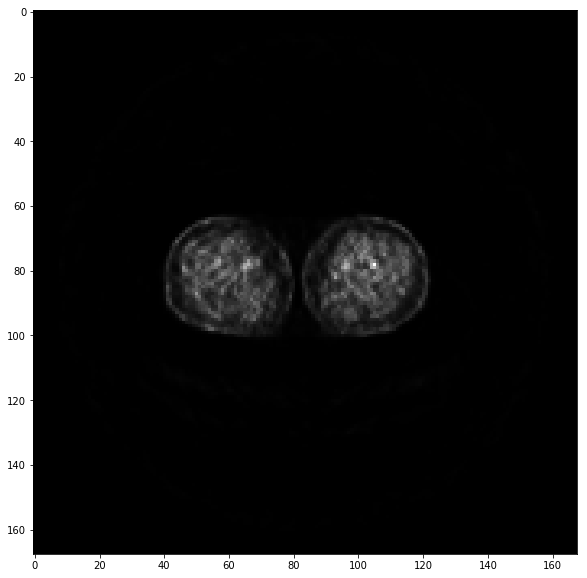

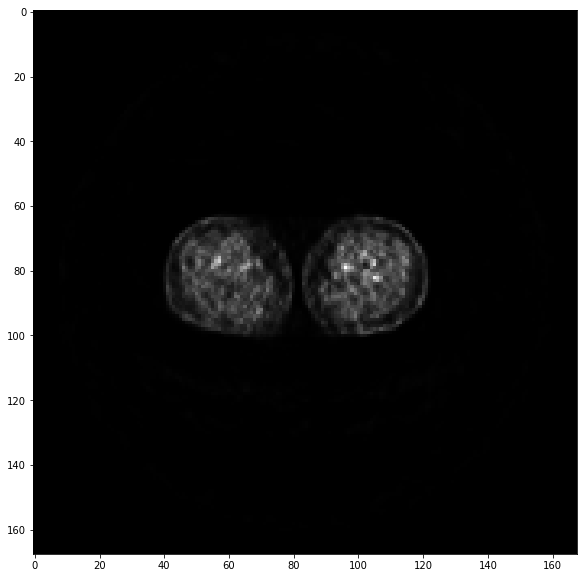

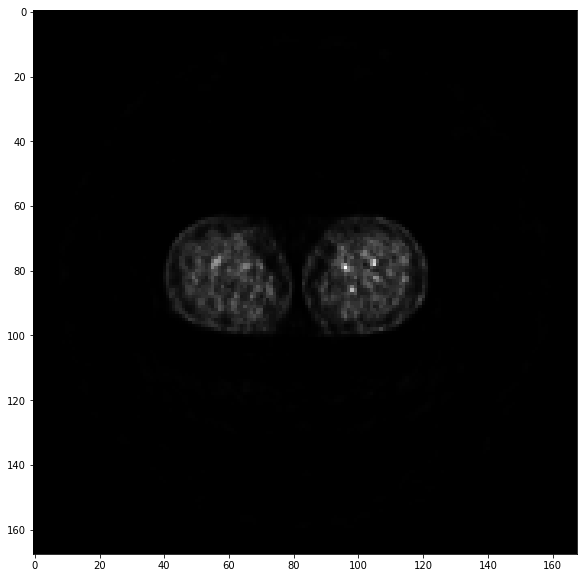

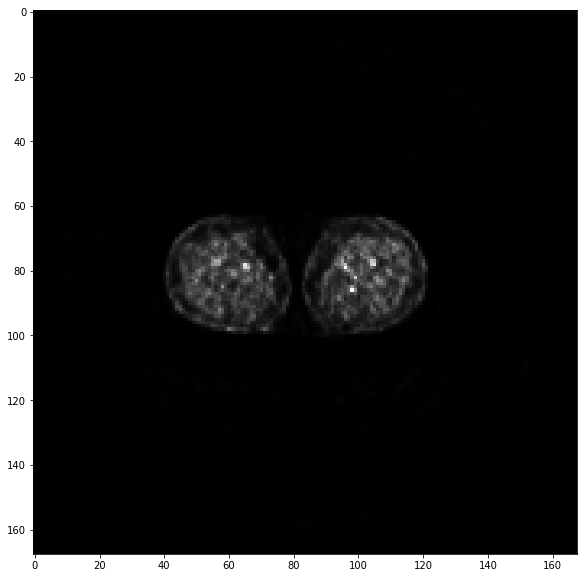

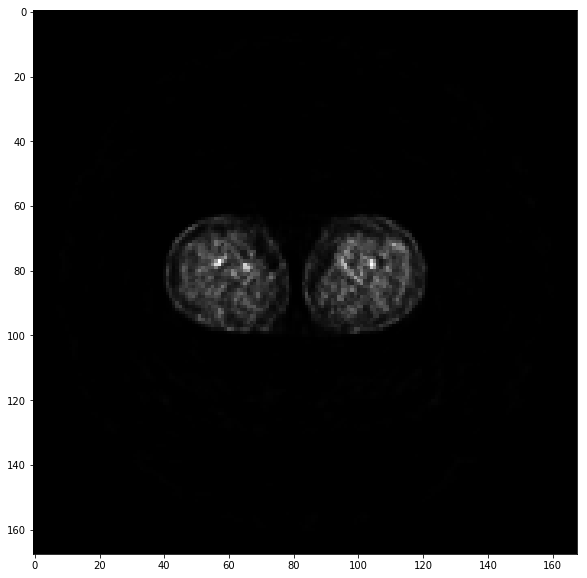

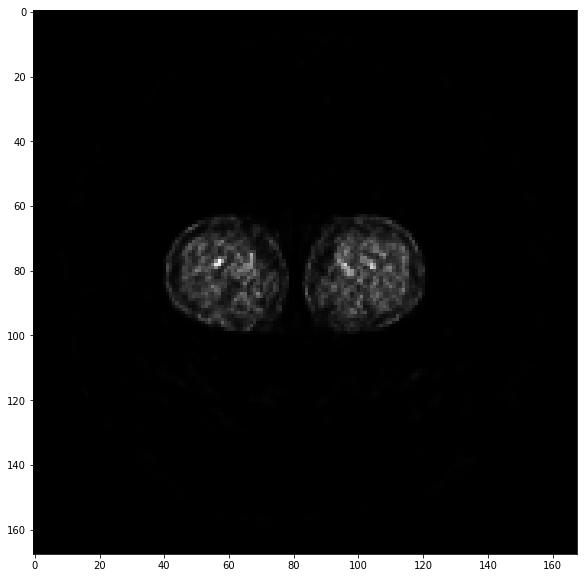

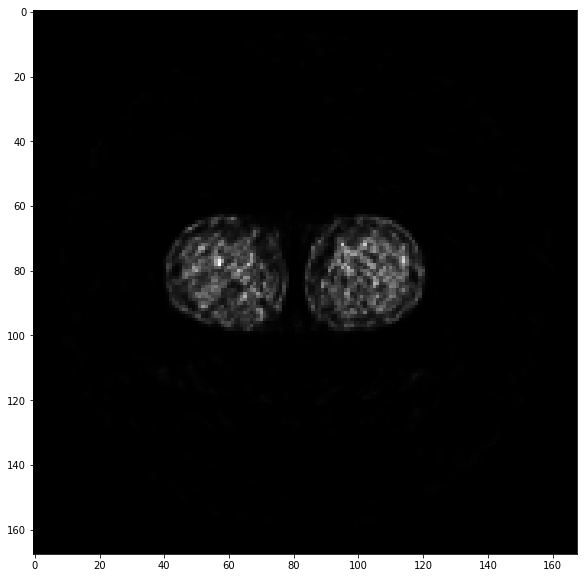

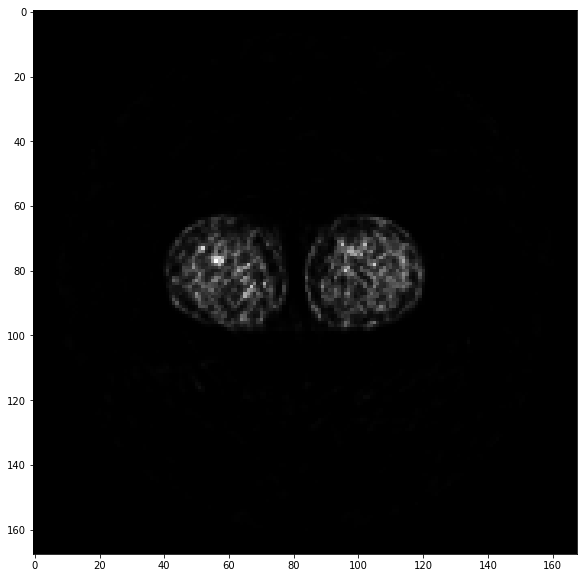

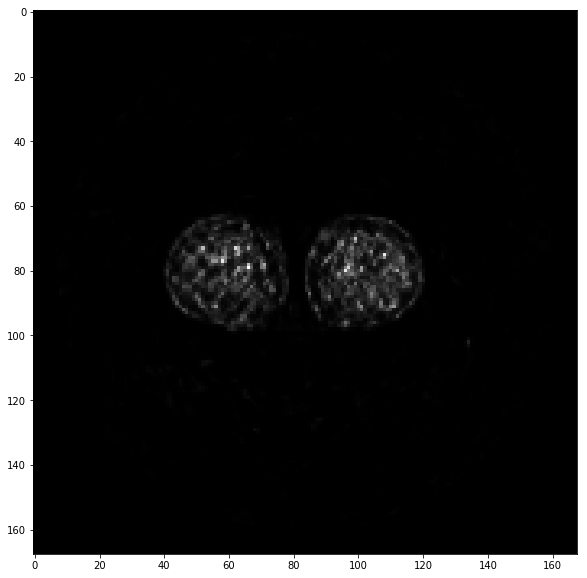

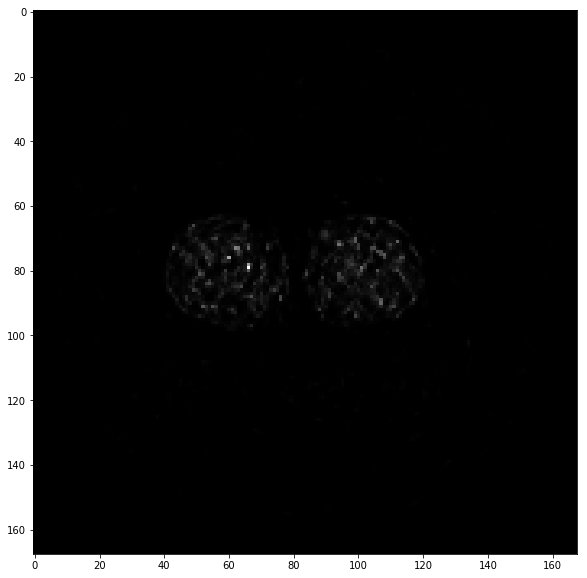

In [18]:
DOSSIER = []
for dirpath,dirnames,filenames in os.walk(path+"001-026/dcm"):
    for file in filenames:
        DOSSIER.append(os.path.join(dirpath,file))

for d in DOSSIER:
    f = dicom.read_file(d)
    I=f.pixel_array
    plt.figure(figsize=(10,10))
    plt.imshow(I,cmap='gray')
    plt.show()

Construction d'une image 3D grâce à dicom_numpy

In [20]:
DOSSIER = []
for dirpath,dirnames,filenames in os.walk(path+"001-026/dcm"):
    for file in filenames:
        DOSSIER.append(os.path.join(dirpath,file))

datasets = [dicom.read_file(d) for d in DOSSIER]

voxel_ndarray, ijk_to_xyz = dicom_numpy.combine_slices(datasets)

print(np.shape(voxel_ndarray))
print(ijk_to_xyz)


(168, 168, 324)
[[   4.0728302     0.            0.         -337.5123291 ]
 [   0.            4.0728302     0.         -480.49365234]
 [   0.            0.            3.          740.5       ]
 [   0.            0.            0.            1.        ]]


Création du masque (on prend le premier masque du premier patient)

In [19]:
m = io.imread(path+"001-026/l2/kmean.tif")
print(m.shape)
print(m.T.shape)
m = m.T

# # Visualisation du masque
# for z in range(0,324):
#     plt.imshow(m[:,:,z],cmap='gray')
#     plt.show()


(324, 168, 168)
(168, 168, 324)


In [11]:
R = radiomics.featureextractor.RadiomicsFeaturesExtractor()
print(R)
R.enableAllFeatures()
print(R.getFeatureClassNames())
R.getFeatureNames('glcm')

# Conversion array ==> simpleITK
image = sitk.GetImageFromArray(voxel_ndarray)
mask = sitk.GetImageFromArray(m)

dict_keys(['firstorder', 'glcm', 'gldm', 'glrlm', 'glszm', 'ngtdm', 'shape'])


In [13]:
F = radiomics.glcm.RadiomicsGLCM(image, mask)
F.getContrastFeatureValue()

284.60074721759133